# Library

In [162]:
import numpy as np
import xgboost as xgb
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler, RobustScaler # 데이터 표준화

# lightgbm 모델
from lightgbm import LGBMClassifier, plot_importance

# normalization
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Data Load

In [163]:
# 엑셀 파일 불러오기
Train_set = pd.read_csv('./data/train.csv', header = 0, index_col =0)
Test_set = pd.read_csv('./data/test.csv', header = 0, index_col =0)
Submission_set = pd.read_csv('./data/sample_submission.csv', header = 0, index_col = 0)
Train_set

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.263956,20.336773,19.009500,17.672439,16.939607,-0.000081,23.12426,20.25779,18.95512,17.63211,16.90894,18,18,1.189764,1.190681,1.188979,1.189355,1.190206,0
1,15.052147,14.061969,13.452418,13.268450,13.168941,0.004506,14.96642,14.00452,13.41139,13.23625,13.13468,1,1,1.253254,1.257836,1.248762,1.250997,1.255533,1
2,16.786385,15.825426,15.536318,15.393535,15.350032,0.000472,16.60765,15.68659,15.44004,15.32173,15.29608,2,2,1.022499,1.024105,1.020983,1.021730,1.023291,0
3,25.660638,21.188727,20.221158,19.894949,19.634649,0.000006,25.35365,20.99465,20.08727,19.79465,19.55518,4,3,1.205399,1.206058,1.204874,1.205120,1.205712,0
4,24.453429,20.699170,19.042368,18.324152,17.982649,-0.000033,23.77140,20.43384,18.86299,18.19028,17.87592,13,12,1.193946,1.194285,1.193738,1.193826,1.194099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,18.365648,17.240883,16.773898,16.484970,16.340403,0.051988,18.13280,17.04065,16.63744,16.38606,16.28741,2,2,1.093010,1.088828,1.097310,1.095145,1.090905,2
319996,18.685639,17.665802,17.190434,16.816858,16.636688,0.087261,18.52074,17.51310,17.08711,16.74363,16.60173,2,2,1.051689,1.050838,1.052640,1.052152,1.051252,1
319997,21.188972,18.423357,17.295610,16.901072,16.684127,-0.000010,20.98896,18.30760,17.21518,16.84030,16.63555,31,30,1.193259,1.194140,1.192509,1.192868,1.193683,0


# Data Preview

In [164]:
Train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 0 to 319999
Data columns (total 19 columns):
u            320000 non-null float64
g            320000 non-null float64
r            320000 non-null float64
i            320000 non-null float64
z            320000 non-null float64
redshift     320000 non-null float64
dered_u      320000 non-null float64
dered_g      320000 non-null float64
dered_r      320000 non-null float64
dered_i      320000 non-null float64
dered_z      320000 non-null float64
nObserve     320000 non-null int64
nDetect      320000 non-null int64
airmass_u    320000 non-null float64
airmass_g    320000 non-null float64
airmass_r    320000 non-null float64
airmass_i    320000 non-null float64
airmass_z    320000 non-null float64
class        320000 non-null int64
dtypes: float64(16), int64(3)
memory usage: 48.8 MB


In [165]:
Train_set.describe()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000
mean,19.852429,18.376837,17.735761,17.174226,16.875187,0.058308,19.628874,18.227087,17.615434,17.152347,16.869277,6.332700,6.138816,1.175763,1.176528,1.175131,1.175430,1.176128,1.116322
std,1.945548,31.110759,1.466242,52.561464,57.146264,0.575457,1.923586,17.786568,1.473020,25.075760,35.436549,8.881129,8.551634,0.116297,0.118065,0.114723,0.115485,0.117156,0.923455
min,-17.687512,-17555.365606,7.731354,-23955.817764,-23955.817764,-166.048260,-42.837530,-9999.000000,-16.380230,-9999.000000,-9999.000000,1.000000,1.000000,1.000059,1.000012,1.000157,1.000105,1.000027,0.000000
25%,18.724150,17.474851,16.877190,16.523876,16.288890,0.000036,18.563598,17.348370,16.787138,16.453048,16.234063,1.000000,1.000000,1.088220,1.088448,1.087763,1.088021,1.088299,0.000000
50%,19.419439,18.140528,17.525850,17.149736,16.917610,0.047129,19.264635,18.022410,17.443415,17.087370,16.869390,2.000000,2.000000,1.179350,1.179235,1.179375,1.179377,1.179303,1.000000
75%,20.432092,19.073172,18.428089,18.007435,17.728924,0.094597,20.197603,18.888443,18.291078,17.906960,17.655653,5.000000,5.000000,1.227540,1.225990,1.229236,1.228599,1.226757,2.000000
max,58.623328,46.338272,72.009662,50.164052,52.612664,62.323343,30.777850,30.613170,31.957200,32.016220,30.781270,44.000000,42.000000,2.050775,2.080287,2.022134,2.036329,2.065390,2.000000


In [166]:
# 데이터 공분산
Train_set.corr()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
u,1.000000,0.048621,0.818125,0.017466,0.014199,-0.009243,0.935217,0.081037,0.782799,0.034951,0.021438,0.227273,0.221087,0.076302,0.076066,0.076441,0.076385,0.076197,-0.379313
g,0.048621,1.000000,0.049739,0.591288,0.543726,-0.000360,0.046967,0.998955,0.048157,0.707392,0.500364,0.011722,0.011415,0.001999,0.001934,0.002064,0.002032,0.001967,-0.019501
r,0.818125,0.049739,1.000000,0.022797,0.019127,-0.006304,0.805675,0.085505,0.969504,0.047424,0.030600,0.205900,0.195569,0.076337,0.075987,0.076592,0.076478,0.076175,-0.374905
i,0.017466,0.591288,0.022797,1.000000,0.919717,-0.000152,0.017510,0.590351,0.022486,0.987939,0.699012,0.005619,0.005580,-0.000755,-0.000829,-0.000679,-0.000718,-0.000792,-0.010138
z,0.014199,0.543726,0.019127,0.919717,1.000000,-0.000164,0.014029,0.542776,0.018913,0.908595,0.918965,0.005214,0.005192,-0.001465,-0.001521,-0.001406,-0.001436,-0.001493,-0.009960
redshift,-0.009243,-0.000360,-0.006304,-0.000152,-0.000164,1.000000,-0.007582,-0.000194,-0.002980,-0.000109,-0.000199,-0.007774,-0.007607,0.001382,0.001393,0.001370,0.001376,0.001387,0.073773
dered_u,0.935217,0.046967,0.805675,0.017510,0.014029,-0.007582,1.000000,0.086856,0.840528,0.037958,0.023229,0.222395,0.216898,0.088256,0.087821,0.088580,0.088433,0.088053,-0.337930
dered_g,0.081037,0.998955,0.085505,0.590351,0.542776,-0.000194,0.086856,1.000000,0.088660,0.707221,0.500081,0.019654,0.019033,0.005871,0.005777,0.005959,0.005916,0.005825,-0.030445
dered_r,0.782799,0.048157,0.969504,0.022486,0.018913,-0.002980,0.840528,0.088660,1.000000,0.049042,0.031533,0.199952,0.189958,0.083917,0.083433,0.084297,0.084121,0.083689,-0.341305
dered_i,0.034951,0.707392,0.047424,0.987939,0.908595,-0.000109,0.037958,0.707221,0.049042,1.000000,0.707473,0.011156,0.010817,0.001782,0.001696,0.001867,0.001825,0.001739,-0.018306


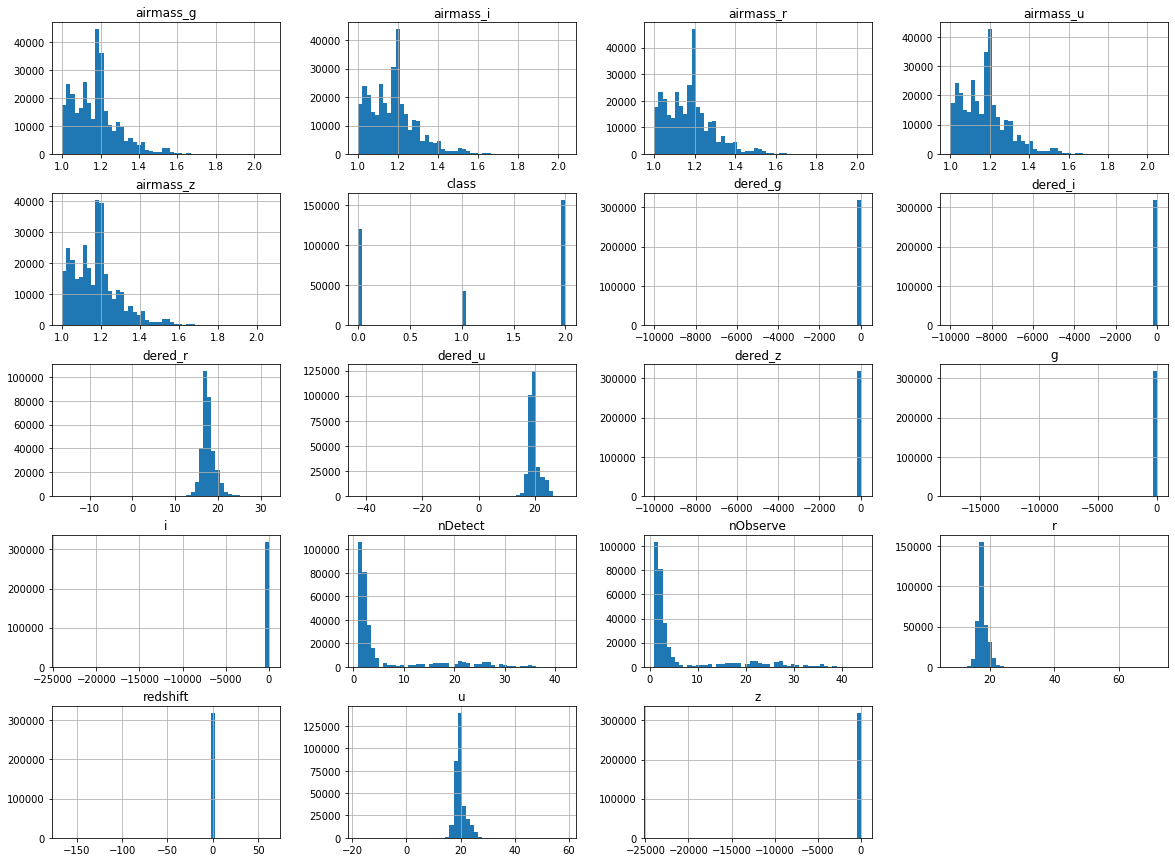

In [167]:
# 데이터 히스토그램
Train_set.hist(bins = 50, figsize=(20,15))
plt.show()

## Test_set

In [168]:
Test_set.describe()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,19.859840,18.437104,17.739743,17.306491,17.148951,0.060083,19.634952,18.263779,17.619340,17.217804,16.870231,6.349950,6.15775,1.175956,1.176733,1.175311,1.175616,1.176326
std,1.954254,1.702973,1.478590,1.320742,24.643062,0.346845,1.921030,1.665741,1.476002,1.332361,35.436707,8.872794,8.55086,0.116424,0.118197,0.114845,0.115609,0.117285
min,-0.338524,-51.175280,-5.438650,5.326743,-39.527151,-30.148965,-30.633700,-18.655990,-8.756023,-3.697258,-9999.000000,1.000000,1.00000,1.000143,1.000086,1.000177,1.000150,1.000148
25%,18.727258,17.477982,16.881969,16.525463,16.288210,0.000034,18.570860,17.352245,16.790630,16.456230,16.230968,1.000000,1.00000,1.088091,1.088294,1.087693,1.087911,1.088175
50%,19.426062,18.145087,17.529944,17.155994,16.921198,0.047115,19.267415,18.024665,17.448660,17.091210,16.873305,2.000000,2.00000,1.179353,1.179252,1.179373,1.179390,1.179326
75%,20.434422,19.079345,18.434472,18.007966,17.733311,0.094769,20.199885,18.894768,18.295210,17.910950,17.657802,5.000000,5.00000,1.227833,1.226165,1.229388,1.228922,1.226935
max,56.847135,94.359125,46.691343,33.025919,6976.392220,46.390495,30.889910,30.952920,31.653620,30.947770,28.644080,44.000000,42.00000,2.050215,2.079697,2.021604,2.035784,2.064815


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000224DB986248>,
      dtype=object)

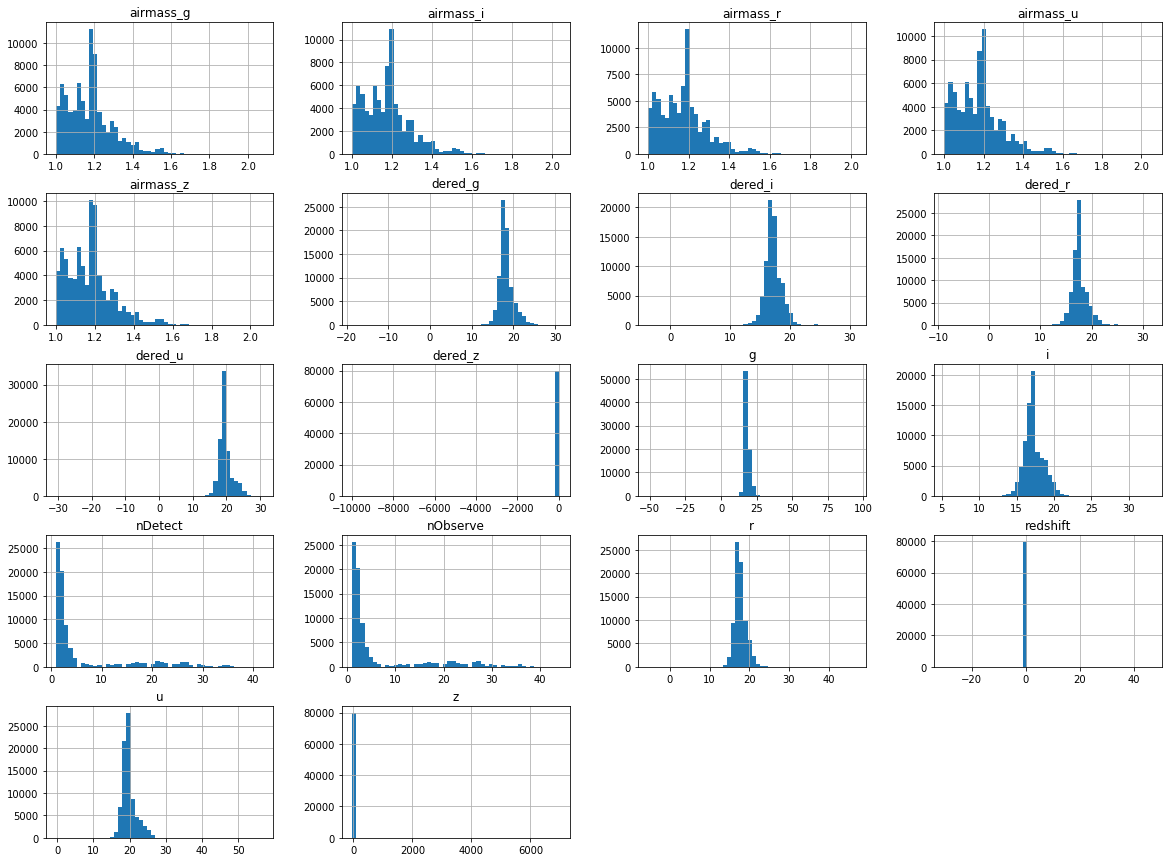

In [169]:
Test_set.hist(bins = 50, figsize=(20,15))

# Data Preprocessing

In [170]:
Data = pd.concat([Train_set, Test_set], sort=False)
Data

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.263956,20.336773,19.009500,17.672439,16.939607,-0.000081,23.12426,20.25779,18.95512,17.63211,16.90894,18,18,1.189764,1.190681,1.188979,1.189355,1.190206,0.0
1,15.052147,14.061969,13.452418,13.268450,13.168941,0.004506,14.96642,14.00452,13.41139,13.23625,13.13468,1,1,1.253254,1.257836,1.248762,1.250997,1.255533,1.0
2,16.786385,15.825426,15.536318,15.393535,15.350032,0.000472,16.60765,15.68659,15.44004,15.32173,15.29608,2,2,1.022499,1.024105,1.020983,1.021730,1.023291,0.0
3,25.660638,21.188727,20.221158,19.894949,19.634649,0.000006,25.35365,20.99465,20.08727,19.79465,19.55518,4,3,1.205399,1.206058,1.204874,1.205120,1.205712,0.0
4,24.453429,20.699170,19.042368,18.324152,17.982649,-0.000033,23.77140,20.43384,18.86299,18.19028,17.87592,13,12,1.193946,1.194285,1.193738,1.193826,1.194099,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,19.673388,18.661662,18.270788,18.122501,18.062672,-0.000317,19.33614,18.39331,18.08600,17.98610,17.96699,17,17,1.185843,1.186322,1.185493,1.185652,1.186067,NaN
399996,21.522869,20.728282,20.608695,21.004875,20.845799,0.065455,21.39935,20.63992,20.54506,20.95069,20.78268,8,4,1.284956,1.290772,1.279329,1.282120,1.287838,NaN
399997,19.399065,18.241076,18.160492,18.197753,18.201831,-0.000842,18.91359,17.87533,17.90469,18.00426,18.04000,1,1,1.188475,1.188563,1.188518,1.188480,1.188503,NaN


In [171]:
Data.drop(['airmass_i', 'airmass_z', 'airmass_u', 'nObserve', 'nDetect'], axis =1, inplace=True)
#Data.drop(['airmass_g', 'airmass_i', 'airmass_u', 'airmass_z', 'dered_g', 'dered_i', 'dered_u', 'dered_z',
#          'g', 'i', 'u', 'z'], axis =1, inplace=True)

## 표준화

In [172]:
# 지수 및 로그 변환
Data['airmass_r'] = np.sqrt(np.log(Data['airmass_r']))
Data['airmass_g'] = np.sqrt(np.log(Data['airmass_g']))
#Data['airmass_i'] = np.sqrt(np.log(Data['airmass_i']))
#Data['airmass_u'] = np.sqrt(np.log(Data['airmass_u']))
#Data['airmass_z'] = np.sqrt(np.log(Data['airmass_z']))

Data['r'] = np.log(Data['r'])
Data['u'] = np.log(Data['u'])
Data['g'] = np.log(Data['g'])
Data['i'] = np.log(Data['i'])
Data['z'] = np.log(Data['z'])

Data['dered_r'] = np.sqrt(np.log(Data['dered_r']))
Data['dered_i'] = np.sqrt(np.log(Data['dered_i']))
Data['dered_u'] = np.sqrt(np.log(Data['dered_u']))
Data['dered_g'] = np.sqrt(np.log(Data['dered_g']))
Data['dered_z'] = np.sqrt(np.log(Data['dered_z']))

#Data['nDetect'] = np.log1p(Data['nDetect'])
#Data['nObserve'] = np.log1p(Data['nObserve'])
Data['redshift'] = np.log1p(-min(Data['redshift'])+Data['redshift'])

Data

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,airmass_g,airmass_r,class
id,,,,,,,,,,,,,,
0,3.146905,3.012431,2.944939,2.872006,2.829654,5.118282,1.772253,1.734514,1.715248,1.694025,1.681619,0.417762,0.416047,0.0
1,2.711521,2.643474,2.599159,2.585389,2.577861,5.118310,1.644934,1.624617,1.611243,1.607159,1.604760,0.478950,0.471331,1.0
2,2.820568,2.761618,2.743180,2.733948,2.731118,5.118286,1.676265,1.659158,1.654377,1.652051,1.651544,0.154334,0.144104,0.0
3,3.244958,3.053469,3.006730,2.990466,2.977296,5.118283,1.798033,1.744783,1.732076,1.727834,1.724309,0.432848,0.431712,0.0
4,3.196770,3.030094,2.946666,2.908220,2.889407,5.118283,1.780023,1.737007,1.713827,1.703199,1.698074,0.421364,0.420820,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,2.979267,2.926471,2.905304,2.897154,2.893847,5.118281,1.721039,1.706455,1.701511,1.699882,1.699569,0.413349,0.412503,NaN
399996,3.069116,3.031499,3.025713,3.044755,3.037152,5.118675,1.750246,1.739893,1.738569,1.744182,1.741873,0.505213,0.496322,NaN
399997,2.965225,2.903676,2.899248,2.901298,2.901522,5.118278,1.714608,1.698064,1.698547,1.700179,1.700762,0.415626,0.415581,NaN


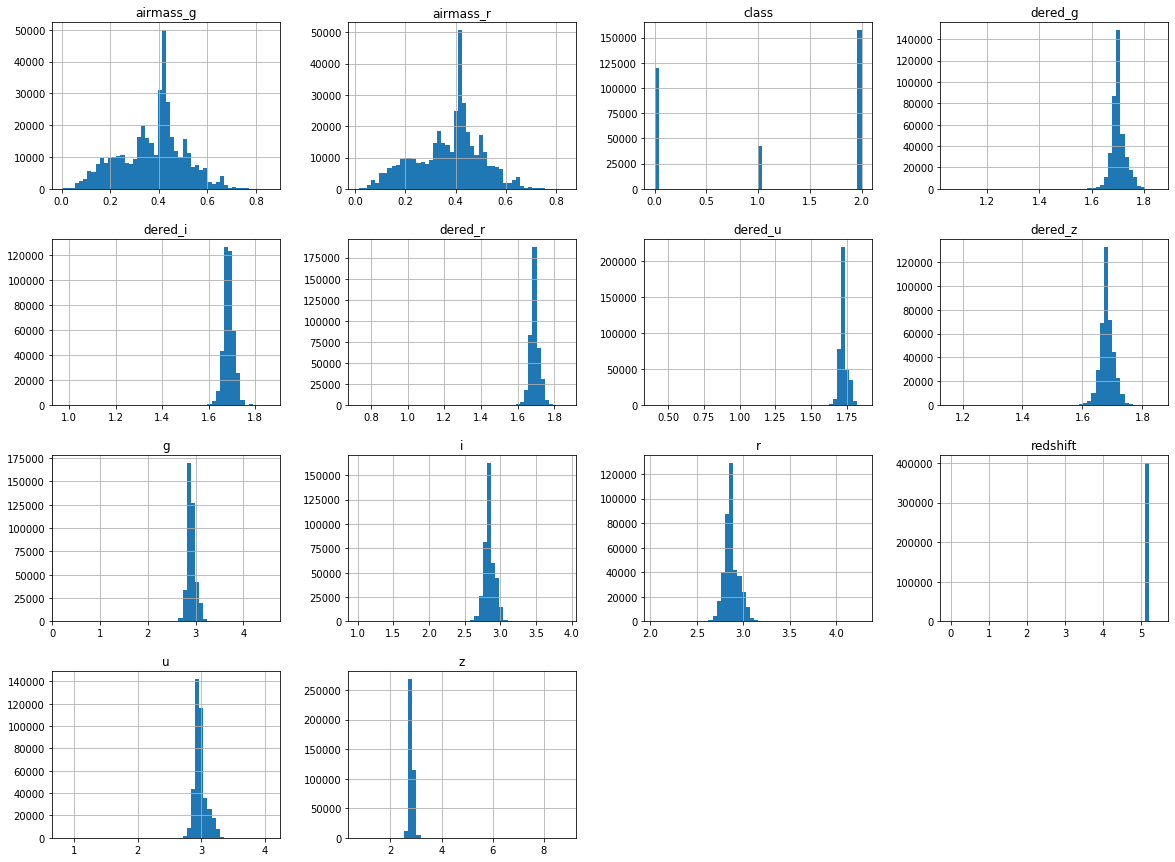

In [173]:
# 데이터 히스토그램
Data.hist(bins = 50, figsize=(20,15))
plt.show()

In [174]:
Y = Data['class']
X = Data.drop(['class'], axis = 1)
X

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,airmass_g,airmass_r
id,,,,,,,,,,,,,
0,3.146905,3.012431,2.944939,2.872006,2.829654,5.118282,1.772253,1.734514,1.715248,1.694025,1.681619,0.417762,0.416047
1,2.711521,2.643474,2.599159,2.585389,2.577861,5.118310,1.644934,1.624617,1.611243,1.607159,1.604760,0.478950,0.471331
2,2.820568,2.761618,2.743180,2.733948,2.731118,5.118286,1.676265,1.659158,1.654377,1.652051,1.651544,0.154334,0.144104
3,3.244958,3.053469,3.006730,2.990466,2.977296,5.118283,1.798033,1.744783,1.732076,1.727834,1.724309,0.432848,0.431712
4,3.196770,3.030094,2.946666,2.908220,2.889407,5.118283,1.780023,1.737007,1.713827,1.703199,1.698074,0.421364,0.420820
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,2.979267,2.926471,2.905304,2.897154,2.893847,5.118281,1.721039,1.706455,1.701511,1.699882,1.699569,0.413349,0.412503
399996,3.069116,3.031499,3.025713,3.044755,3.037152,5.118675,1.750246,1.739893,1.738569,1.744182,1.741873,0.505213,0.496322
399997,2.965225,2.903676,2.899248,2.901298,2.901522,5.118278,1.714608,1.698064,1.698547,1.700179,1.700762,0.415626,0.415581


In [175]:
# 표준화 : RobustScaler() :
# 이상치, 특이값에 덜 민감한" 중앙값(median)과 IQR(Inter-Quartile Range)을 이용해서 척도를 표준화하는 방법
#  (x-median)/IQR )

x_RobustScaler = RobustScaler().fit_transform(X)
x_RobustScaler

array([[ 2.06862958e+00,  1.30470626e+00,  9.23947023e-01, ...,
         2.73884557e-02,  7.30875412e-02,  6.00275330e-02],
       [-2.91950447e+00, -2.90923905e+00, -3.01001272e+00, ...,
        -3.05060014e+00,  4.54717576e-01,  3.96465191e-01],
       [-1.67016443e+00, -1.55988804e+00, -1.37147138e+00, ...,
        -1.17705047e+00, -1.56993515e+00, -1.59491843e+00],
       ...,
       [-1.28543771e-02,  6.25917302e-02,  4.04124288e-01, ...,
         7.94017932e-01,  5.97630384e-02,  5.71896923e-02],
       [-3.11606885e-01, -3.45463353e-01, -2.58579706e-01, ...,
        -2.22450699e-01,  1.35442154e-02,  1.77132971e-03],
       [ 7.63241516e-01,  1.35428590e+00,  1.80281809e+00, ...,
         2.50973858e+00, -1.11894480e-02,  5.95415259e-02]])

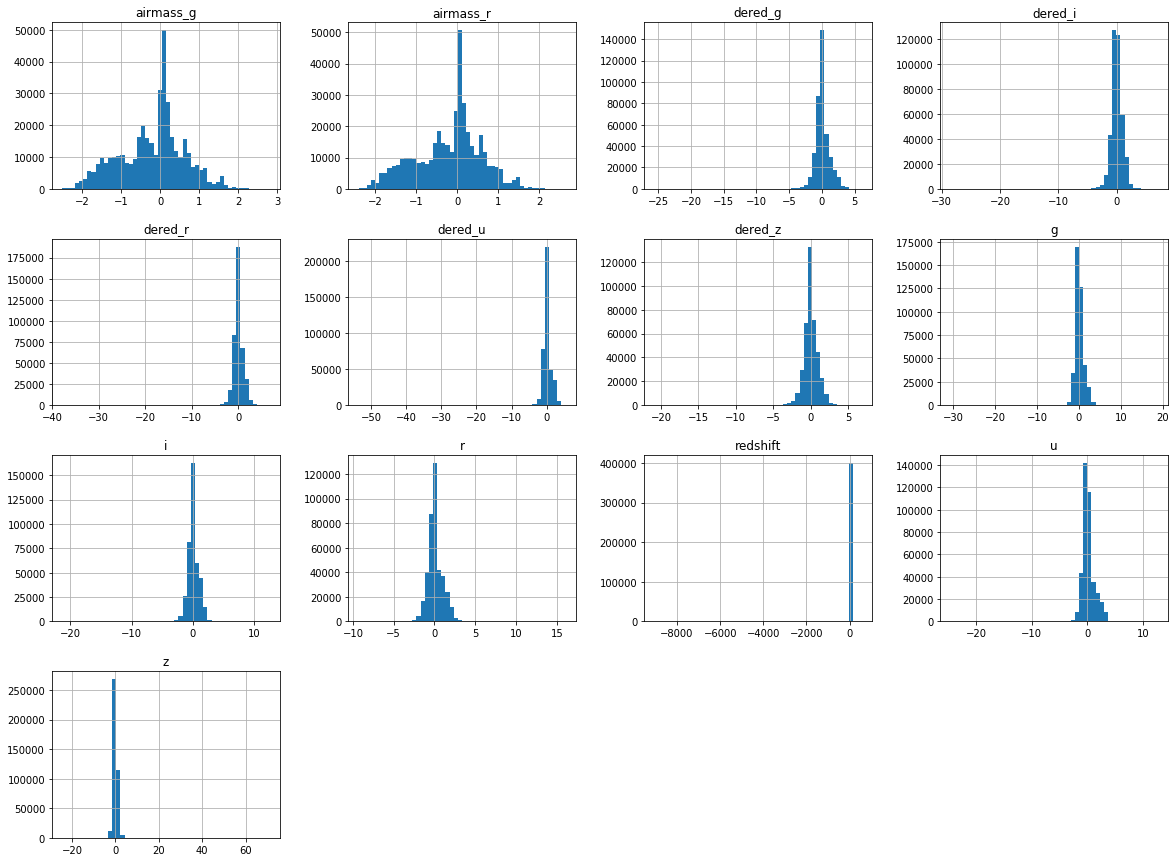

In [176]:
X = pd.DataFrame(x_RobustScaler, columns = X.columns)
X.hist(bins = 50,  figsize=(20,15))
plt.show()

## 정규화

In [177]:
# 정규화
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,airmass_g,airmass_r
0,0.715930,0.645846,0.403159,0.640739,0.256319,0.941667,0.944739,0.850718,0.870724,0.811737,0.754547,0.486037,0.488160
1,0.582110,0.560703,0.248206,0.542042,0.225217,0.941672,0.856668,0.711895,0.778659,0.714253,0.643295,0.557819,0.555040
2,0.615627,0.587967,0.312745,0.593198,0.244147,0.941667,0.878340,0.755528,0.816842,0.764632,0.711013,0.176994,0.159174
3,0.746067,0.655317,0.430849,0.681531,0.274556,0.941667,0.962571,0.863689,0.885620,0.849678,0.816340,0.503734,0.507111
4,0.731256,0.649922,0.403933,0.653210,0.263699,0.941667,0.950113,0.853866,0.869466,0.822032,0.778365,0.490262,0.493934
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0.664405,0.626010,0.385397,0.649399,0.264248,0.941667,0.909312,0.815273,0.858564,0.818310,0.780530,0.480860,0.483873
399996,0.692021,0.650247,0.439356,0.700226,0.281949,0.941739,0.929515,0.857512,0.891368,0.868024,0.841763,0.588630,0.585274
399997,0.660089,0.620749,0.382683,0.650826,0.265196,0.941666,0.904864,0.804674,0.855941,0.818643,0.782256,0.483530,0.487596
399998,0.652074,0.612505,0.356581,0.623763,0.253777,0.941714,0.903342,0.796510,0.843228,0.794978,0.745516,0.474837,0.476579


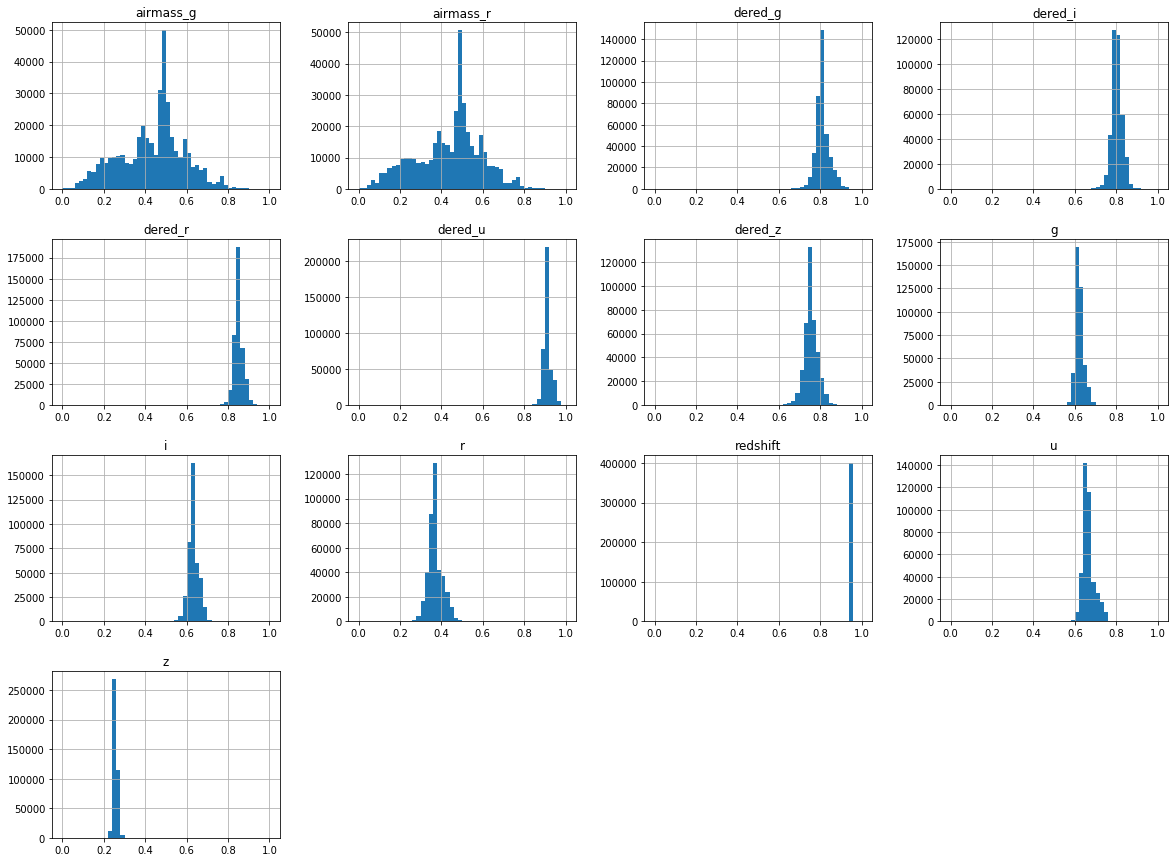

In [178]:
X.hist(bins = 50,  figsize=(20,15))
plt.show()

In [179]:
Data = pd.concat([X, Y], axis =1)
Data

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,airmass_g,airmass_r,class
0,0.715930,0.645846,0.403159,0.640739,0.256319,0.941667,0.944739,0.850718,0.870724,0.811737,0.754547,0.486037,0.488160,0.0
1,0.582110,0.560703,0.248206,0.542042,0.225217,0.941672,0.856668,0.711895,0.778659,0.714253,0.643295,0.557819,0.555040,1.0
2,0.615627,0.587967,0.312745,0.593198,0.244147,0.941667,0.878340,0.755528,0.816842,0.764632,0.711013,0.176994,0.159174,0.0
3,0.746067,0.655317,0.430849,0.681531,0.274556,0.941667,0.962571,0.863689,0.885620,0.849678,0.816340,0.503734,0.507111,0.0
4,0.731256,0.649922,0.403933,0.653210,0.263699,0.941667,0.950113,0.853866,0.869466,0.822032,0.778365,0.490262,0.493934,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0.664405,0.626010,0.385397,0.649399,0.264248,0.941667,0.909312,0.815273,0.858564,0.818310,0.780530,0.480860,0.483873,NaN
399996,0.692021,0.650247,0.439356,0.700226,0.281949,0.941739,0.929515,0.857512,0.891368,0.868024,0.841763,0.588630,0.585274,NaN
399997,0.660089,0.620749,0.382683,0.650826,0.265196,0.941666,0.904864,0.804674,0.855941,0.818643,0.782256,0.483530,0.487596,NaN
399998,0.652074,0.612505,0.356581,0.623763,0.253777,0.941714,0.903342,0.796510,0.843228,0.794978,0.745516,0.474837,0.476579,NaN


In [180]:
Train_Data = Data[:320000]
Train_Data

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,airmass_g,airmass_r,class
0,0.715930,0.645846,0.403159,0.640739,0.256319,0.941667,0.944739,0.850718,0.870724,0.811737,0.754547,0.486037,0.488160,0.0
1,0.582110,0.560703,0.248206,0.542042,0.225217,0.941672,0.856668,0.711895,0.778659,0.714253,0.643295,0.557819,0.555040,1.0
2,0.615627,0.587967,0.312745,0.593198,0.244147,0.941667,0.878340,0.755528,0.816842,0.764632,0.711013,0.176994,0.159174,0.0
3,0.746067,0.655317,0.430849,0.681531,0.274556,0.941667,0.962571,0.863689,0.885620,0.849678,0.816340,0.503734,0.507111,0.0
4,0.731256,0.649922,0.403933,0.653210,0.263699,0.941667,0.950113,0.853866,0.869466,0.822032,0.778365,0.490262,0.493934,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,0.643263,0.607736,0.347091,0.616787,0.251870,0.941724,0.896329,0.786813,0.836690,0.787304,0.738375,0.338172,0.353496,2.0
319996,0.648572,0.613354,0.358083,0.623651,0.254090,0.941763,0.900622,0.797046,0.843712,0.794533,0.746642,0.257179,0.258851,1.0
319997,0.687215,0.623044,0.360817,0.625371,0.254442,0.941667,0.925683,0.813543,0.845673,0.796457,0.747521,0.490093,0.492452,0.0
319998,0.651218,0.608774,0.339869,0.610369,0.248586,0.941667,0.875615,0.748640,0.812331,0.761852,0.707653,0.464010,0.467418,0.0


In [181]:
Test_Data = Data[320000:].drop('class', axis =1 )
Test_Data

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,airmass_g,airmass_r
320000,0.656005,0.617900,0.365396,0.629691,0.256222,0.941800,0.906576,0.806326,0.848936,0.801244,0.754541,0.436540,0.452690
320001,0.649480,0.606791,0.336144,0.606213,0.247173,0.941667,0.858122,0.720261,0.797878,0.746193,0.691638,0.096553,0.092663
320002,0.658484,0.616140,0.358909,0.623501,0.254079,0.941788,0.906844,0.802530,0.844616,0.794654,0.745787,0.669512,0.664796
320003,0.638402,0.606609,0.350557,0.623547,0.255264,0.941667,0.894528,0.787536,0.839989,0.795058,0.750910,0.421740,0.424071
320004,0.634208,0.601271,0.331865,0.603743,0.246633,0.941742,0.892037,0.778761,0.828923,0.775715,0.720831,0.371067,0.383175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0.664405,0.626010,0.385397,0.649399,0.264248,0.941667,0.909312,0.815273,0.858564,0.818310,0.780530,0.480860,0.483873
399996,0.692021,0.650247,0.439356,0.700226,0.281949,0.941739,0.929515,0.857512,0.891368,0.868024,0.841763,0.588630,0.585274
399997,0.660089,0.620749,0.382683,0.650826,0.265196,0.941666,0.904864,0.804674,0.855941,0.818643,0.782256,0.483530,0.487596
399998,0.652074,0.612505,0.356581,0.623763,0.253777,0.941714,0.903342,0.796510,0.843228,0.794978,0.745516,0.474837,0.476579


## 결측치 제거

In [182]:
# 전체 데이터가 아닌 각 클래스별(0,1,2)로 이상치 처리
# Train_copy1 = Train_set.copy()

def remove_outlier(data, column):
    
    print(column)
    # 클래스 0처리
    column_data_0 = data[data['class']==0][column]
    quan_25_0 = np.percentile(column_data_0.values, 10) # 1분위수
    quan_75_0 = np.percentile(column_data_0.values, 90) # 3분위수
    iqr_0 = quan_75_0 - quan_25_0 # IQR 계산
    iqr_0 *= 1.5
    lowest_0 = quan_25_0 - iqr_0 # 최솟값 설정
    highest_0 = quan_75_0 + iqr_0 # 최댓값 설정
    outlier_index_0 = column_data_0[(column_data_0 < lowest_0) | (column_data_0 > highest_0)].index # 최솟값 ~ 최댓값 사이의 값만 출력
    print(len(outlier_index_0))
    
    # 클래스 1처리
    column_data_1 = data[data['class']==1][column]
    quan_25_1 = np.percentile(column_data_1.values, 10) # 1분위수
    quan_75_1 = np.percentile(column_data_1.values, 90) # 3분위수
    iqr_1 = quan_75_1 - quan_25_1 # IQR 계산
    iqr_1 *= 1.5
    lowest_1 = quan_25_1 - iqr_1 # 최솟값 설정
    highest_1 = quan_75_1 + iqr_1 # 최댓값 설정
    outlier_index_1 = column_data_1[(column_data_1 < lowest_1 )| (column_data_1 > highest_1)].index # 최솟값 ~ 최댓값 사이의 값만 출력
    print(len(outlier_index_1))
    
    # 클래스 2 처리
    column_data_2 = data[data['class']==2][column]
    quan_25_2 = np.percentile(column_data_2.values, 10) # 1분위수
    quan_75_2 = np.percentile(column_data_2.values, 90) # 3분위수
    iqr_2 = quan_75_2 - quan_25_2 # IQR 계산
    iqr_2 *= 1.5
    lowest_2 = quan_25_2 - iqr_2 # 최솟값 설정
    highest_2 = quan_75_2 + iqr_2 # 최댓값 설정
    outlier_index_2 = column_data_2[(column_data_2 < lowest_2 )| (column_data_2 > highest_2)].index # 최솟값 ~ 최댓값 사이의 값만 출력
    print(len(outlier_index_2))
    # outlier 행 제거
    data.drop(list(set(list(outlier_index_0) + list(outlier_index_1) + list(outlier_index_2))), axis = 0, inplace = True)
    print(data.shape)
    return data

In [183]:
Train_Data_c = list(Train_Data.columns[:-1])
#Train_set_copy1_c.remove('redshift')
Train_Data_c

['u',
 'g',
 'r',
 'i',
 'z',
 'redshift',
 'dered_u',
 'dered_g',
 'dered_r',
 'dered_i',
 'dered_z',
 'airmass_g',
 'airmass_r']

In [186]:
Train_Data1 = Train_Data.copy()
for col in ['u', 'g', 'r', 'i', 'z', 'dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z', 'airmass_g', 'airmass_r']:
    
    ROT = remove_outlier(Train_Data1, col)
    
    Train_Data1 = ROT

Train_Data1

u
0
0
644
(319356, 14)
g
0
0
0
(319356, 14)
r
25
73
693
(318565, 14)
i
30
0
0
(318535, 14)
z
0
0
0
(318535, 14)
dered_u
0
0
167
(318368, 14)
dered_g
0
0
95
(318273, 14)
dered_r
0
33
106
(318134, 14)
dered_i
0
0
0
(318134, 14)
dered_z
0
0
0
(318134, 14)
airmass_g
0
0
0
(318134, 14)
airmass_r
0
0
0
(318134, 14)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,airmass_g,airmass_r,class
0,0.715930,0.645846,0.403159,0.640739,0.256319,0.941667,0.944739,0.850718,0.870724,0.811737,0.754547,0.486037,0.488160,0.0
1,0.582110,0.560703,0.248206,0.542042,0.225217,0.941672,0.856668,0.711895,0.778659,0.714253,0.643295,0.557819,0.555040,1.0
2,0.615627,0.587967,0.312745,0.593198,0.244147,0.941667,0.878340,0.755528,0.816842,0.764632,0.711013,0.176994,0.159174,0.0
3,0.746067,0.655317,0.430849,0.681531,0.274556,0.941667,0.962571,0.863689,0.885620,0.849678,0.816340,0.503734,0.507111,0.0
4,0.731256,0.649922,0.403933,0.653210,0.263699,0.941667,0.950113,0.853866,0.869466,0.822032,0.778365,0.490262,0.493934,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,0.643263,0.607736,0.347091,0.616787,0.251870,0.941724,0.896329,0.786813,0.836690,0.787304,0.738375,0.338172,0.353496,2.0
319996,0.648572,0.613354,0.358083,0.623651,0.254090,0.941763,0.900622,0.797046,0.843712,0.794533,0.746642,0.257179,0.258851,1.0
319997,0.687215,0.623044,0.360817,0.625371,0.254442,0.941667,0.925683,0.813543,0.845673,0.796457,0.747521,0.490093,0.492452,0.0
319998,0.651218,0.608774,0.339869,0.610369,0.248586,0.941667,0.875615,0.748640,0.812331,0.761852,0.707653,0.464010,0.467418,0.0


In [187]:
#Train_copy1.drop(Train_copy1[(Train_copy1['redshift']<-10) | (Train_copy1['redshift'] > 10)].index, axis = 0, inplace = True)
Train_Data1

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,airmass_g,airmass_r,class
0,0.715930,0.645846,0.403159,0.640739,0.256319,0.941667,0.944739,0.850718,0.870724,0.811737,0.754547,0.486037,0.488160,0.0
1,0.582110,0.560703,0.248206,0.542042,0.225217,0.941672,0.856668,0.711895,0.778659,0.714253,0.643295,0.557819,0.555040,1.0
2,0.615627,0.587967,0.312745,0.593198,0.244147,0.941667,0.878340,0.755528,0.816842,0.764632,0.711013,0.176994,0.159174,0.0
3,0.746067,0.655317,0.430849,0.681531,0.274556,0.941667,0.962571,0.863689,0.885620,0.849678,0.816340,0.503734,0.507111,0.0
4,0.731256,0.649922,0.403933,0.653210,0.263699,0.941667,0.950113,0.853866,0.869466,0.822032,0.778365,0.490262,0.493934,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,0.643263,0.607736,0.347091,0.616787,0.251870,0.941724,0.896329,0.786813,0.836690,0.787304,0.738375,0.338172,0.353496,2.0
319996,0.648572,0.613354,0.358083,0.623651,0.254090,0.941763,0.900622,0.797046,0.843712,0.794533,0.746642,0.257179,0.258851,1.0
319997,0.687215,0.623044,0.360817,0.625371,0.254442,0.941667,0.925683,0.813543,0.845673,0.796457,0.747521,0.490093,0.492452,0.0
319998,0.651218,0.608774,0.339869,0.610369,0.248586,0.941667,0.875615,0.748640,0.812331,0.761852,0.707653,0.464010,0.467418,0.0


In [188]:
Train_Data1.describe()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,airmass_g,airmass_r,class
count,318131.000000,318131.000000,318134.000000,318130.000000,318127.000000,318134.000000,318126.000000,318126.000000,318128.000000,318126.000000,318125.000000,318134.000000,318134.000000,318134.000000
mean,0.665732,0.622219,0.370518,0.632453,0.256822,0.941727,0.911232,0.810769,0.850615,0.802604,0.755174,0.436049,0.437398,1.111818
std,0.028283,0.019691,0.035106,0.025085,0.009202,0.001802,0.018714,0.032282,0.020935,0.024748,0.032372,0.153177,0.157167,0.923767
min,0.000000,0.000000,0.184364,0.426946,0.000000,0.000000,0.000000,0.000000,0.409652,0.437076,0.000000,0.000000,0.000000,0.000000
25%,0.649229,0.610869,0.349889,0.617633,0.251492,0.941667,0.901106,0.793547,0.839086,0.788705,0.736997,0.337390,0.335628,0.000000
50%,0.660374,0.619453,0.366710,0.630377,0.256148,0.941719,0.908540,0.807688,0.849103,0.801287,0.753499,0.472292,0.476235,1.000000
75%,0.675795,0.630840,0.388883,0.646984,0.261869,0.941771,0.917887,0.824755,0.861273,0.816608,0.772820,0.525484,0.534443,2.000000
max,1.000000,0.826277,0.600827,0.974415,0.384551,1.000000,0.993393,0.996234,0.977394,0.978286,1.000000,1.000000,1.000000,2.000000


In [189]:
for i in list(Train_Data1.columns)[:-1]:
    print(i,'왜도 : ',Train_Data1[i].skew())
    print(i,'첨도 : ',Train_Data1[i].kurt())

u 왜도 :  0.8843087794387664
u 첨도 :  2.686640676598187
g 왜도 :  0.6952365750531879
g 첨도 :  4.626091486704413
r 왜도 :  0.5209956418512209
r 첨도 :  1.0205478249889905
i 왜도 :  0.2958551991972141
i 첨도 :  1.0506657731980718
z 왜도 :  0.35258746088918574
z 첨도 :  4.337742860497672
redshift 왜도 :  -457.0924437386428
redshift 첨도 :  235304.81221281554
dered_u 왜도 :  0.053849791011224
dered_u 첨도 :  20.03586075282564
dered_g 왜도 :  0.27345401013111204
dered_g 첨도 :  4.038996923798691
dered_r 왜도 :  0.185889536372496
dered_r 첨도 :  2.364288522023713
dered_i 왜도 :  0.04066655397131227
dered_i 첨도 :  1.5115761949091304
dered_z 왜도 :  0.11317499973196089
dered_z 첨도 :  2.353803227349051
airmass_g 왜도 :  -0.22571395007654554
airmass_g 첨도 :  -0.27192650412179065
airmass_r 왜도 :  -0.2991392231732287
airmass_r 첨도 :  -0.29549104472563537


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022489FA5988>,
      dtype=object)

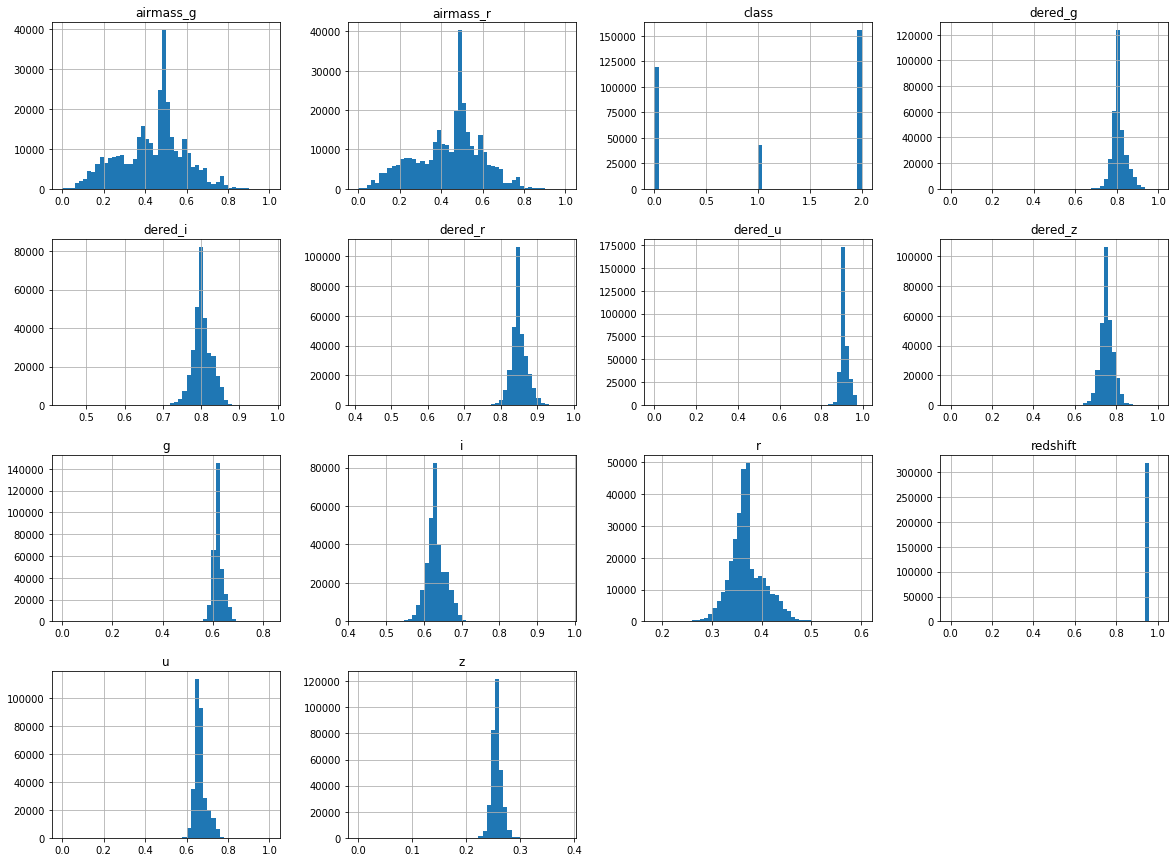

In [190]:
Train_Data1.hist(bins = 50, figsize=(20,15))

# Spilting X, Y

In [191]:
# 모델 평가를 위한 훈련데이터 Split
seed = 0
size = 0.05 # Testing size
X = Train_Data1.drop('class', axis = 1)
#X = updating_Train.drop('class', axis = 1)
Y = Train_Data1['class']
X_Train, X_Test, y_train, y_test = train_test_split(X, Y, test_size = size, random_state = seed)  

# modeling

In [192]:
LGBM_model = LGBMClassifier(max_depth = 27, learning_rate = 0.005, n_estimators = 30000,boosting_type='gbdt')
LGBM_model.fit(X_Train, y_train, early_stopping_rounds = 5000, eval_metric ='logloss', eval_set =[(X_Test, y_test)])

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's multi_logloss: 0.977639
Training until validation scores don't improve for 5000 rounds
[2]	valid_0's multi_logloss: 0.970822
[3]	valid_0's multi_logloss: 0.964102
[4]	valid_0's multi_logloss: 0.95746
[5]	valid_0's multi_logloss: 0.950921
[6]	valid_0's multi_logloss: 0.944454
[7]	valid_0's multi_logloss: 0.938072
[8]	valid_0's multi_logloss: 0.931766
[9]	valid_0's multi_logloss: 0.925541
[10]	valid_0's multi_logloss: 0.919382
[11]	valid_0's multi_logloss: 0.913308
[12]	valid_0's multi_logloss: 0.907297
[13]	valid_0's multi_logloss: 0.901363
[14]	valid_0's multi_logloss: 0.895497
[15]	valid_0's multi_logloss: 0.889715
[16]	valid_0's multi_logloss: 0.883985
[17]	valid_0's multi_logloss: 0.878327
[18]	valid_0's multi_logloss: 0.872721
[19]	valid_0's multi_logloss: 0.867176
[20]	valid_0's multi_logloss: 0.8617
[21]	valid_0's multi_logloss: 0.85629
[22]	valid_0's multi_logloss:

[205]	valid_0's multi_logloss: 0.381995
[206]	valid_0's multi_logloss: 0.38087
[207]	valid_0's multi_logloss: 0.379759
[208]	valid_0's multi_logloss: 0.378654
[209]	valid_0's multi_logloss: 0.377557
[210]	valid_0's multi_logloss: 0.376465
[211]	valid_0's multi_logloss: 0.375377
[212]	valid_0's multi_logloss: 0.374303
[213]	valid_0's multi_logloss: 0.373228
[214]	valid_0's multi_logloss: 0.372161
[215]	valid_0's multi_logloss: 0.371099
[216]	valid_0's multi_logloss: 0.370044
[217]	valid_0's multi_logloss: 0.369006
[218]	valid_0's multi_logloss: 0.367958
[219]	valid_0's multi_logloss: 0.366928
[220]	valid_0's multi_logloss: 0.36591
[221]	valid_0's multi_logloss: 0.364891
[222]	valid_0's multi_logloss: 0.363881
[223]	valid_0's multi_logloss: 0.362882
[224]	valid_0's multi_logloss: 0.36189
[225]	valid_0's multi_logloss: 0.360894
[226]	valid_0's multi_logloss: 0.359917
[227]	valid_0's multi_logloss: 0.358938
[228]	valid_0's multi_logloss: 0.357971
[229]	valid_0's multi_logloss: 0.357004
[23

[415]	valid_0's multi_logloss: 0.253765
[416]	valid_0's multi_logloss: 0.253461
[417]	valid_0's multi_logloss: 0.253163
[418]	valid_0's multi_logloss: 0.252865
[419]	valid_0's multi_logloss: 0.252573
[420]	valid_0's multi_logloss: 0.252281
[421]	valid_0's multi_logloss: 0.251984
[422]	valid_0's multi_logloss: 0.251691
[423]	valid_0's multi_logloss: 0.251401
[424]	valid_0's multi_logloss: 0.251112
[425]	valid_0's multi_logloss: 0.250827
[426]	valid_0's multi_logloss: 0.250546
[427]	valid_0's multi_logloss: 0.250255
[428]	valid_0's multi_logloss: 0.249974
[429]	valid_0's multi_logloss: 0.249693
[430]	valid_0's multi_logloss: 0.249416
[431]	valid_0's multi_logloss: 0.249139
[432]	valid_0's multi_logloss: 0.248859
[433]	valid_0's multi_logloss: 0.24859
[434]	valid_0's multi_logloss: 0.248321
[435]	valid_0's multi_logloss: 0.248051
[436]	valid_0's multi_logloss: 0.247783
[437]	valid_0's multi_logloss: 0.24751
[438]	valid_0's multi_logloss: 0.247246
[439]	valid_0's multi_logloss: 0.246978
[4

[620]	valid_0's multi_logloss: 0.216289
[621]	valid_0's multi_logloss: 0.216188
[622]	valid_0's multi_logloss: 0.216086
[623]	valid_0's multi_logloss: 0.21598
[624]	valid_0's multi_logloss: 0.215878
[625]	valid_0's multi_logloss: 0.21578
[626]	valid_0's multi_logloss: 0.215682
[627]	valid_0's multi_logloss: 0.215586
[628]	valid_0's multi_logloss: 0.215488
[629]	valid_0's multi_logloss: 0.215389
[630]	valid_0's multi_logloss: 0.215285
[631]	valid_0's multi_logloss: 0.215192
[632]	valid_0's multi_logloss: 0.2151
[633]	valid_0's multi_logloss: 0.214992
[634]	valid_0's multi_logloss: 0.214893
[635]	valid_0's multi_logloss: 0.214792
[636]	valid_0's multi_logloss: 0.214698
[637]	valid_0's multi_logloss: 0.214601
[638]	valid_0's multi_logloss: 0.21451
[639]	valid_0's multi_logloss: 0.214407
[640]	valid_0's multi_logloss: 0.214319
[641]	valid_0's multi_logloss: 0.214219
[642]	valid_0's multi_logloss: 0.214125
[643]	valid_0's multi_logloss: 0.214025
[644]	valid_0's multi_logloss: 0.21394
[645]	

[828]	valid_0's multi_logloss: 0.20219
[829]	valid_0's multi_logloss: 0.202156
[830]	valid_0's multi_logloss: 0.202112
[831]	valid_0's multi_logloss: 0.202067
[832]	valid_0's multi_logloss: 0.202022
[833]	valid_0's multi_logloss: 0.201982
[834]	valid_0's multi_logloss: 0.201936
[835]	valid_0's multi_logloss: 0.201887
[836]	valid_0's multi_logloss: 0.201852
[837]	valid_0's multi_logloss: 0.201809
[838]	valid_0's multi_logloss: 0.201768
[839]	valid_0's multi_logloss: 0.20173
[840]	valid_0's multi_logloss: 0.201689
[841]	valid_0's multi_logloss: 0.201651
[842]	valid_0's multi_logloss: 0.201615
[843]	valid_0's multi_logloss: 0.201577
[844]	valid_0's multi_logloss: 0.201537
[845]	valid_0's multi_logloss: 0.201493
[846]	valid_0's multi_logloss: 0.20145
[847]	valid_0's multi_logloss: 0.201408
[848]	valid_0's multi_logloss: 0.201375
[849]	valid_0's multi_logloss: 0.201338
[850]	valid_0's multi_logloss: 0.201301
[851]	valid_0's multi_logloss: 0.201264
[852]	valid_0's multi_logloss: 0.201228
[85

[1034]	valid_0's multi_logloss: 0.195866
[1035]	valid_0's multi_logloss: 0.195844
[1036]	valid_0's multi_logloss: 0.19582
[1037]	valid_0's multi_logloss: 0.1958
[1038]	valid_0's multi_logloss: 0.195781
[1039]	valid_0's multi_logloss: 0.195757
[1040]	valid_0's multi_logloss: 0.195729
[1041]	valid_0's multi_logloss: 0.195706
[1042]	valid_0's multi_logloss: 0.19569
[1043]	valid_0's multi_logloss: 0.195671
[1044]	valid_0's multi_logloss: 0.195648
[1045]	valid_0's multi_logloss: 0.19563
[1046]	valid_0's multi_logloss: 0.19561
[1047]	valid_0's multi_logloss: 0.195589
[1048]	valid_0's multi_logloss: 0.195569
[1049]	valid_0's multi_logloss: 0.195546
[1050]	valid_0's multi_logloss: 0.195526
[1051]	valid_0's multi_logloss: 0.195504
[1052]	valid_0's multi_logloss: 0.195487
[1053]	valid_0's multi_logloss: 0.195464
[1054]	valid_0's multi_logloss: 0.195447
[1055]	valid_0's multi_logloss: 0.19542
[1056]	valid_0's multi_logloss: 0.195396
[1057]	valid_0's multi_logloss: 0.19537
[1058]	valid_0's multi_l

[1237]	valid_0's multi_logloss: 0.192119
[1238]	valid_0's multi_logloss: 0.192106
[1239]	valid_0's multi_logloss: 0.192092
[1240]	valid_0's multi_logloss: 0.192075
[1241]	valid_0's multi_logloss: 0.192063
[1242]	valid_0's multi_logloss: 0.192049
[1243]	valid_0's multi_logloss: 0.192038
[1244]	valid_0's multi_logloss: 0.192027
[1245]	valid_0's multi_logloss: 0.19201
[1246]	valid_0's multi_logloss: 0.191999
[1247]	valid_0's multi_logloss: 0.191986
[1248]	valid_0's multi_logloss: 0.191974
[1249]	valid_0's multi_logloss: 0.191963
[1250]	valid_0's multi_logloss: 0.191951
[1251]	valid_0's multi_logloss: 0.191944
[1252]	valid_0's multi_logloss: 0.191932
[1253]	valid_0's multi_logloss: 0.191916
[1254]	valid_0's multi_logloss: 0.191903
[1255]	valid_0's multi_logloss: 0.191882
[1256]	valid_0's multi_logloss: 0.191867
[1257]	valid_0's multi_logloss: 0.191857
[1258]	valid_0's multi_logloss: 0.191848
[1259]	valid_0's multi_logloss: 0.191837
[1260]	valid_0's multi_logloss: 0.191821
[1261]	valid_0's 

[1438]	valid_0's multi_logloss: 0.189801
[1439]	valid_0's multi_logloss: 0.189793
[1440]	valid_0's multi_logloss: 0.189784
[1441]	valid_0's multi_logloss: 0.189774
[1442]	valid_0's multi_logloss: 0.189764
[1443]	valid_0's multi_logloss: 0.189755
[1444]	valid_0's multi_logloss: 0.189743
[1445]	valid_0's multi_logloss: 0.189736
[1446]	valid_0's multi_logloss: 0.189727
[1447]	valid_0's multi_logloss: 0.189717
[1448]	valid_0's multi_logloss: 0.189707
[1449]	valid_0's multi_logloss: 0.189699
[1450]	valid_0's multi_logloss: 0.18969
[1451]	valid_0's multi_logloss: 0.189683
[1452]	valid_0's multi_logloss: 0.189674
[1453]	valid_0's multi_logloss: 0.189665
[1454]	valid_0's multi_logloss: 0.189655
[1455]	valid_0's multi_logloss: 0.189645
[1456]	valid_0's multi_logloss: 0.189636
[1457]	valid_0's multi_logloss: 0.189627
[1458]	valid_0's multi_logloss: 0.189617
[1459]	valid_0's multi_logloss: 0.189607
[1460]	valid_0's multi_logloss: 0.189598
[1461]	valid_0's multi_logloss: 0.18959
[1462]	valid_0's m

[1641]	valid_0's multi_logloss: 0.188045
[1642]	valid_0's multi_logloss: 0.188037
[1643]	valid_0's multi_logloss: 0.18803
[1644]	valid_0's multi_logloss: 0.188022
[1645]	valid_0's multi_logloss: 0.188007
[1646]	valid_0's multi_logloss: 0.187998
[1647]	valid_0's multi_logloss: 0.187994
[1648]	valid_0's multi_logloss: 0.187984
[1649]	valid_0's multi_logloss: 0.187974
[1650]	valid_0's multi_logloss: 0.187972
[1651]	valid_0's multi_logloss: 0.187964
[1652]	valid_0's multi_logloss: 0.187956
[1653]	valid_0's multi_logloss: 0.187952
[1654]	valid_0's multi_logloss: 0.18794
[1655]	valid_0's multi_logloss: 0.187933
[1656]	valid_0's multi_logloss: 0.187926
[1657]	valid_0's multi_logloss: 0.187913
[1658]	valid_0's multi_logloss: 0.187905
[1659]	valid_0's multi_logloss: 0.187901
[1660]	valid_0's multi_logloss: 0.187897
[1661]	valid_0's multi_logloss: 0.187892
[1662]	valid_0's multi_logloss: 0.187885
[1663]	valid_0's multi_logloss: 0.187876
[1664]	valid_0's multi_logloss: 0.187869
[1665]	valid_0's m

[1844]	valid_0's multi_logloss: 0.186632
[1845]	valid_0's multi_logloss: 0.186624
[1846]	valid_0's multi_logloss: 0.186613
[1847]	valid_0's multi_logloss: 0.18661
[1848]	valid_0's multi_logloss: 0.186605
[1849]	valid_0's multi_logloss: 0.186595
[1850]	valid_0's multi_logloss: 0.186589
[1851]	valid_0's multi_logloss: 0.186581
[1852]	valid_0's multi_logloss: 0.186579
[1853]	valid_0's multi_logloss: 0.186568
[1854]	valid_0's multi_logloss: 0.186565
[1855]	valid_0's multi_logloss: 0.186563
[1856]	valid_0's multi_logloss: 0.186549
[1857]	valid_0's multi_logloss: 0.186546
[1858]	valid_0's multi_logloss: 0.186542
[1859]	valid_0's multi_logloss: 0.186538
[1860]	valid_0's multi_logloss: 0.186534
[1861]	valid_0's multi_logloss: 0.18652
[1862]	valid_0's multi_logloss: 0.186516
[1863]	valid_0's multi_logloss: 0.186509
[1864]	valid_0's multi_logloss: 0.186503
[1865]	valid_0's multi_logloss: 0.186496
[1866]	valid_0's multi_logloss: 0.186491
[1867]	valid_0's multi_logloss: 0.186488
[1868]	valid_0's m

[2045]	valid_0's multi_logloss: 0.185535
[2046]	valid_0's multi_logloss: 0.18553
[2047]	valid_0's multi_logloss: 0.185528
[2048]	valid_0's multi_logloss: 0.185524
[2049]	valid_0's multi_logloss: 0.185515
[2050]	valid_0's multi_logloss: 0.185508
[2051]	valid_0's multi_logloss: 0.185506
[2052]	valid_0's multi_logloss: 0.185502
[2053]	valid_0's multi_logloss: 0.185496
[2054]	valid_0's multi_logloss: 0.185494
[2055]	valid_0's multi_logloss: 0.18548
[2056]	valid_0's multi_logloss: 0.185475
[2057]	valid_0's multi_logloss: 0.185467
[2058]	valid_0's multi_logloss: 0.18546
[2059]	valid_0's multi_logloss: 0.185448
[2060]	valid_0's multi_logloss: 0.185445
[2061]	valid_0's multi_logloss: 0.18544
[2062]	valid_0's multi_logloss: 0.185432
[2063]	valid_0's multi_logloss: 0.185425
[2064]	valid_0's multi_logloss: 0.185423
[2065]	valid_0's multi_logloss: 0.185416
[2066]	valid_0's multi_logloss: 0.185407
[2067]	valid_0's multi_logloss: 0.1854
[2068]	valid_0's multi_logloss: 0.185398
[2069]	valid_0's multi

[2250]	valid_0's multi_logloss: 0.184341
[2251]	valid_0's multi_logloss: 0.184339
[2252]	valid_0's multi_logloss: 0.184335
[2253]	valid_0's multi_logloss: 0.184328
[2254]	valid_0's multi_logloss: 0.184323
[2255]	valid_0's multi_logloss: 0.184318
[2256]	valid_0's multi_logloss: 0.184308
[2257]	valid_0's multi_logloss: 0.184302
[2258]	valid_0's multi_logloss: 0.184298
[2259]	valid_0's multi_logloss: 0.184294
[2260]	valid_0's multi_logloss: 0.184291
[2261]	valid_0's multi_logloss: 0.184287
[2262]	valid_0's multi_logloss: 0.184274
[2263]	valid_0's multi_logloss: 0.184267
[2264]	valid_0's multi_logloss: 0.18426
[2265]	valid_0's multi_logloss: 0.184255
[2266]	valid_0's multi_logloss: 0.184247
[2267]	valid_0's multi_logloss: 0.184241
[2268]	valid_0's multi_logloss: 0.184234
[2269]	valid_0's multi_logloss: 0.184231
[2270]	valid_0's multi_logloss: 0.184225
[2271]	valid_0's multi_logloss: 0.184219
[2272]	valid_0's multi_logloss: 0.184217
[2273]	valid_0's multi_logloss: 0.184214
[2274]	valid_0's 

[2452]	valid_0's multi_logloss: 0.183224
[2453]	valid_0's multi_logloss: 0.183223
[2454]	valid_0's multi_logloss: 0.183221
[2455]	valid_0's multi_logloss: 0.183216
[2456]	valid_0's multi_logloss: 0.18321
[2457]	valid_0's multi_logloss: 0.183207
[2458]	valid_0's multi_logloss: 0.183205
[2459]	valid_0's multi_logloss: 0.183203
[2460]	valid_0's multi_logloss: 0.183199
[2461]	valid_0's multi_logloss: 0.183197
[2462]	valid_0's multi_logloss: 0.183192
[2463]	valid_0's multi_logloss: 0.183183
[2464]	valid_0's multi_logloss: 0.183177
[2465]	valid_0's multi_logloss: 0.183174
[2466]	valid_0's multi_logloss: 0.18317
[2467]	valid_0's multi_logloss: 0.183164
[2468]	valid_0's multi_logloss: 0.18316
[2469]	valid_0's multi_logloss: 0.183155
[2470]	valid_0's multi_logloss: 0.183153
[2471]	valid_0's multi_logloss: 0.183149
[2472]	valid_0's multi_logloss: 0.183144
[2473]	valid_0's multi_logloss: 0.183141
[2474]	valid_0's multi_logloss: 0.183138
[2475]	valid_0's multi_logloss: 0.183133
[2476]	valid_0's mu

[2653]	valid_0's multi_logloss: 0.182331
[2654]	valid_0's multi_logloss: 0.182329
[2655]	valid_0's multi_logloss: 0.182327
[2656]	valid_0's multi_logloss: 0.182326
[2657]	valid_0's multi_logloss: 0.182325
[2658]	valid_0's multi_logloss: 0.182321
[2659]	valid_0's multi_logloss: 0.182316
[2660]	valid_0's multi_logloss: 0.18231
[2661]	valid_0's multi_logloss: 0.182308
[2662]	valid_0's multi_logloss: 0.182304
[2663]	valid_0's multi_logloss: 0.182302
[2664]	valid_0's multi_logloss: 0.182299
[2665]	valid_0's multi_logloss: 0.182295
[2666]	valid_0's multi_logloss: 0.182284
[2667]	valid_0's multi_logloss: 0.182278
[2668]	valid_0's multi_logloss: 0.182274
[2669]	valid_0's multi_logloss: 0.182268
[2670]	valid_0's multi_logloss: 0.182263
[2671]	valid_0's multi_logloss: 0.182261
[2672]	valid_0's multi_logloss: 0.182258
[2673]	valid_0's multi_logloss: 0.182256
[2674]	valid_0's multi_logloss: 0.182249
[2675]	valid_0's multi_logloss: 0.182244
[2676]	valid_0's multi_logloss: 0.182238
[2677]	valid_0's 

[2859]	valid_0's multi_logloss: 0.181529
[2860]	valid_0's multi_logloss: 0.181525
[2861]	valid_0's multi_logloss: 0.181525
[2862]	valid_0's multi_logloss: 0.181525
[2863]	valid_0's multi_logloss: 0.181523
[2864]	valid_0's multi_logloss: 0.18152
[2865]	valid_0's multi_logloss: 0.181519
[2866]	valid_0's multi_logloss: 0.181517
[2867]	valid_0's multi_logloss: 0.181515
[2868]	valid_0's multi_logloss: 0.181514
[2869]	valid_0's multi_logloss: 0.18151
[2870]	valid_0's multi_logloss: 0.181508
[2871]	valid_0's multi_logloss: 0.181506
[2872]	valid_0's multi_logloss: 0.181505
[2873]	valid_0's multi_logloss: 0.181505
[2874]	valid_0's multi_logloss: 0.181503
[2875]	valid_0's multi_logloss: 0.181499
[2876]	valid_0's multi_logloss: 0.181496
[2877]	valid_0's multi_logloss: 0.181495
[2878]	valid_0's multi_logloss: 0.181492
[2879]	valid_0's multi_logloss: 0.181491
[2880]	valid_0's multi_logloss: 0.181484
[2881]	valid_0's multi_logloss: 0.18148
[2882]	valid_0's multi_logloss: 0.181476
[2883]	valid_0's mu

[3062]	valid_0's multi_logloss: 0.180846
[3063]	valid_0's multi_logloss: 0.180845
[3064]	valid_0's multi_logloss: 0.180844
[3065]	valid_0's multi_logloss: 0.180841
[3066]	valid_0's multi_logloss: 0.180837
[3067]	valid_0's multi_logloss: 0.180832
[3068]	valid_0's multi_logloss: 0.180832
[3069]	valid_0's multi_logloss: 0.18083
[3070]	valid_0's multi_logloss: 0.180823
[3071]	valid_0's multi_logloss: 0.180817
[3072]	valid_0's multi_logloss: 0.180813
[3073]	valid_0's multi_logloss: 0.18081
[3074]	valid_0's multi_logloss: 0.180807
[3075]	valid_0's multi_logloss: 0.180803
[3076]	valid_0's multi_logloss: 0.180803
[3077]	valid_0's multi_logloss: 0.180798
[3078]	valid_0's multi_logloss: 0.180794
[3079]	valid_0's multi_logloss: 0.18079
[3080]	valid_0's multi_logloss: 0.180788
[3081]	valid_0's multi_logloss: 0.180786
[3082]	valid_0's multi_logloss: 0.180783
[3083]	valid_0's multi_logloss: 0.180782
[3084]	valid_0's multi_logloss: 0.18078
[3085]	valid_0's multi_logloss: 0.180776
[3086]	valid_0's mul

[3264]	valid_0's multi_logloss: 0.180272
[3265]	valid_0's multi_logloss: 0.180272
[3266]	valid_0's multi_logloss: 0.180273
[3267]	valid_0's multi_logloss: 0.18027
[3268]	valid_0's multi_logloss: 0.180268
[3269]	valid_0's multi_logloss: 0.180267
[3270]	valid_0's multi_logloss: 0.180265
[3271]	valid_0's multi_logloss: 0.180259
[3272]	valid_0's multi_logloss: 0.180258
[3273]	valid_0's multi_logloss: 0.180252
[3274]	valid_0's multi_logloss: 0.180251
[3275]	valid_0's multi_logloss: 0.180247
[3276]	valid_0's multi_logloss: 0.180241
[3277]	valid_0's multi_logloss: 0.180235
[3278]	valid_0's multi_logloss: 0.180234
[3279]	valid_0's multi_logloss: 0.180232
[3280]	valid_0's multi_logloss: 0.180229
[3281]	valid_0's multi_logloss: 0.180228
[3282]	valid_0's multi_logloss: 0.180225
[3283]	valid_0's multi_logloss: 0.180222
[3284]	valid_0's multi_logloss: 0.180219
[3285]	valid_0's multi_logloss: 0.180218
[3286]	valid_0's multi_logloss: 0.180218
[3287]	valid_0's multi_logloss: 0.180214
[3288]	valid_0's 

[3468]	valid_0's multi_logloss: 0.179735
[3469]	valid_0's multi_logloss: 0.179733
[3470]	valid_0's multi_logloss: 0.179733
[3471]	valid_0's multi_logloss: 0.179729
[3472]	valid_0's multi_logloss: 0.179725
[3473]	valid_0's multi_logloss: 0.179724
[3474]	valid_0's multi_logloss: 0.179721
[3475]	valid_0's multi_logloss: 0.179718
[3476]	valid_0's multi_logloss: 0.179716
[3477]	valid_0's multi_logloss: 0.179712
[3478]	valid_0's multi_logloss: 0.17971
[3479]	valid_0's multi_logloss: 0.179709
[3480]	valid_0's multi_logloss: 0.179706
[3481]	valid_0's multi_logloss: 0.179704
[3482]	valid_0's multi_logloss: 0.179701
[3483]	valid_0's multi_logloss: 0.179698
[3484]	valid_0's multi_logloss: 0.179699
[3485]	valid_0's multi_logloss: 0.179697
[3486]	valid_0's multi_logloss: 0.179695
[3487]	valid_0's multi_logloss: 0.179692
[3488]	valid_0's multi_logloss: 0.179687
[3489]	valid_0's multi_logloss: 0.179682
[3490]	valid_0's multi_logloss: 0.179677
[3491]	valid_0's multi_logloss: 0.179675
[3492]	valid_0's 

[3671]	valid_0's multi_logloss: 0.179283
[3672]	valid_0's multi_logloss: 0.179283
[3673]	valid_0's multi_logloss: 0.17928
[3674]	valid_0's multi_logloss: 0.17928
[3675]	valid_0's multi_logloss: 0.179273
[3676]	valid_0's multi_logloss: 0.179272
[3677]	valid_0's multi_logloss: 0.17927
[3678]	valid_0's multi_logloss: 0.179267
[3679]	valid_0's multi_logloss: 0.179265
[3680]	valid_0's multi_logloss: 0.179265
[3681]	valid_0's multi_logloss: 0.179263
[3682]	valid_0's multi_logloss: 0.179261
[3683]	valid_0's multi_logloss: 0.17926
[3684]	valid_0's multi_logloss: 0.179257
[3685]	valid_0's multi_logloss: 0.179254
[3686]	valid_0's multi_logloss: 0.179253
[3687]	valid_0's multi_logloss: 0.179252
[3688]	valid_0's multi_logloss: 0.179253
[3689]	valid_0's multi_logloss: 0.17925
[3690]	valid_0's multi_logloss: 0.17925
[3691]	valid_0's multi_logloss: 0.179249
[3692]	valid_0's multi_logloss: 0.179249
[3693]	valid_0's multi_logloss: 0.179248
[3694]	valid_0's multi_logloss: 0.179244
[3695]	valid_0's multi

[3873]	valid_0's multi_logloss: 0.178847
[3874]	valid_0's multi_logloss: 0.178845
[3875]	valid_0's multi_logloss: 0.178842
[3876]	valid_0's multi_logloss: 0.17884
[3877]	valid_0's multi_logloss: 0.178839
[3878]	valid_0's multi_logloss: 0.178839
[3879]	valid_0's multi_logloss: 0.178836
[3880]	valid_0's multi_logloss: 0.178835
[3881]	valid_0's multi_logloss: 0.178833
[3882]	valid_0's multi_logloss: 0.17883
[3883]	valid_0's multi_logloss: 0.178829
[3884]	valid_0's multi_logloss: 0.178824
[3885]	valid_0's multi_logloss: 0.178824
[3886]	valid_0's multi_logloss: 0.178822
[3887]	valid_0's multi_logloss: 0.178821
[3888]	valid_0's multi_logloss: 0.17882
[3889]	valid_0's multi_logloss: 0.178816
[3890]	valid_0's multi_logloss: 0.178813
[3891]	valid_0's multi_logloss: 0.178814
[3892]	valid_0's multi_logloss: 0.178814
[3893]	valid_0's multi_logloss: 0.178815
[3894]	valid_0's multi_logloss: 0.178813
[3895]	valid_0's multi_logloss: 0.178812
[3896]	valid_0's multi_logloss: 0.17881
[3897]	valid_0's mul

[4075]	valid_0's multi_logloss: 0.178427
[4076]	valid_0's multi_logloss: 0.178425
[4077]	valid_0's multi_logloss: 0.178424
[4078]	valid_0's multi_logloss: 0.178424
[4079]	valid_0's multi_logloss: 0.178424
[4080]	valid_0's multi_logloss: 0.17842
[4081]	valid_0's multi_logloss: 0.178419
[4082]	valid_0's multi_logloss: 0.178417
[4083]	valid_0's multi_logloss: 0.178414
[4084]	valid_0's multi_logloss: 0.17841
[4085]	valid_0's multi_logloss: 0.178406
[4086]	valid_0's multi_logloss: 0.178405
[4087]	valid_0's multi_logloss: 0.1784
[4088]	valid_0's multi_logloss: 0.178398
[4089]	valid_0's multi_logloss: 0.178396
[4090]	valid_0's multi_logloss: 0.178394
[4091]	valid_0's multi_logloss: 0.178391
[4092]	valid_0's multi_logloss: 0.178389
[4093]	valid_0's multi_logloss: 0.178388
[4094]	valid_0's multi_logloss: 0.178382
[4095]	valid_0's multi_logloss: 0.178378
[4096]	valid_0's multi_logloss: 0.178376
[4097]	valid_0's multi_logloss: 0.178373
[4098]	valid_0's multi_logloss: 0.178366
[4099]	valid_0's mul

[4277]	valid_0's multi_logloss: 0.177924
[4278]	valid_0's multi_logloss: 0.177922
[4279]	valid_0's multi_logloss: 0.17792
[4280]	valid_0's multi_logloss: 0.177916
[4281]	valid_0's multi_logloss: 0.177915
[4282]	valid_0's multi_logloss: 0.177913
[4283]	valid_0's multi_logloss: 0.177912
[4284]	valid_0's multi_logloss: 0.177912
[4285]	valid_0's multi_logloss: 0.177908
[4286]	valid_0's multi_logloss: 0.177907
[4287]	valid_0's multi_logloss: 0.177905
[4288]	valid_0's multi_logloss: 0.177904
[4289]	valid_0's multi_logloss: 0.177901
[4290]	valid_0's multi_logloss: 0.177896
[4291]	valid_0's multi_logloss: 0.177894
[4292]	valid_0's multi_logloss: 0.177892
[4293]	valid_0's multi_logloss: 0.177889
[4294]	valid_0's multi_logloss: 0.177887
[4295]	valid_0's multi_logloss: 0.177884
[4296]	valid_0's multi_logloss: 0.177882
[4297]	valid_0's multi_logloss: 0.177879
[4298]	valid_0's multi_logloss: 0.177878
[4299]	valid_0's multi_logloss: 0.177875
[4300]	valid_0's multi_logloss: 0.177872
[4301]	valid_0's 

[4480]	valid_0's multi_logloss: 0.177485
[4481]	valid_0's multi_logloss: 0.177485
[4482]	valid_0's multi_logloss: 0.177483
[4483]	valid_0's multi_logloss: 0.177481
[4484]	valid_0's multi_logloss: 0.177481
[4485]	valid_0's multi_logloss: 0.177477
[4486]	valid_0's multi_logloss: 0.177474
[4487]	valid_0's multi_logloss: 0.177473
[4488]	valid_0's multi_logloss: 0.177472
[4489]	valid_0's multi_logloss: 0.177471
[4490]	valid_0's multi_logloss: 0.177469
[4491]	valid_0's multi_logloss: 0.177468
[4492]	valid_0's multi_logloss: 0.177467
[4493]	valid_0's multi_logloss: 0.177466
[4494]	valid_0's multi_logloss: 0.177467
[4495]	valid_0's multi_logloss: 0.177465
[4496]	valid_0's multi_logloss: 0.177463
[4497]	valid_0's multi_logloss: 0.177463
[4498]	valid_0's multi_logloss: 0.177461
[4499]	valid_0's multi_logloss: 0.177459
[4500]	valid_0's multi_logloss: 0.177459
[4501]	valid_0's multi_logloss: 0.177459
[4502]	valid_0's multi_logloss: 0.177455
[4503]	valid_0's multi_logloss: 0.177454
[4504]	valid_0's

[4683]	valid_0's multi_logloss: 0.177117
[4684]	valid_0's multi_logloss: 0.177113
[4685]	valid_0's multi_logloss: 0.177109
[4686]	valid_0's multi_logloss: 0.177106
[4687]	valid_0's multi_logloss: 0.177104
[4688]	valid_0's multi_logloss: 0.177104
[4689]	valid_0's multi_logloss: 0.177102
[4690]	valid_0's multi_logloss: 0.177102
[4691]	valid_0's multi_logloss: 0.177099
[4692]	valid_0's multi_logloss: 0.177099
[4693]	valid_0's multi_logloss: 0.177098
[4694]	valid_0's multi_logloss: 0.177094
[4695]	valid_0's multi_logloss: 0.177095
[4696]	valid_0's multi_logloss: 0.177094
[4697]	valid_0's multi_logloss: 0.177092
[4698]	valid_0's multi_logloss: 0.17709
[4699]	valid_0's multi_logloss: 0.177087
[4700]	valid_0's multi_logloss: 0.177087
[4701]	valid_0's multi_logloss: 0.177086
[4702]	valid_0's multi_logloss: 0.177083
[4703]	valid_0's multi_logloss: 0.177081
[4704]	valid_0's multi_logloss: 0.177079
[4705]	valid_0's multi_logloss: 0.177079
[4706]	valid_0's multi_logloss: 0.177078
[4707]	valid_0's 

[4886]	valid_0's multi_logloss: 0.176773
[4887]	valid_0's multi_logloss: 0.176769
[4888]	valid_0's multi_logloss: 0.17677
[4889]	valid_0's multi_logloss: 0.176769
[4890]	valid_0's multi_logloss: 0.176769
[4891]	valid_0's multi_logloss: 0.176769
[4892]	valid_0's multi_logloss: 0.176768
[4893]	valid_0's multi_logloss: 0.176764
[4894]	valid_0's multi_logloss: 0.176764
[4895]	valid_0's multi_logloss: 0.176763
[4896]	valid_0's multi_logloss: 0.176762
[4897]	valid_0's multi_logloss: 0.17676
[4898]	valid_0's multi_logloss: 0.176759
[4899]	valid_0's multi_logloss: 0.176758
[4900]	valid_0's multi_logloss: 0.176756
[4901]	valid_0's multi_logloss: 0.176754
[4902]	valid_0's multi_logloss: 0.176751
[4903]	valid_0's multi_logloss: 0.176752
[4904]	valid_0's multi_logloss: 0.176749
[4905]	valid_0's multi_logloss: 0.176745
[4906]	valid_0's multi_logloss: 0.176743
[4907]	valid_0's multi_logloss: 0.176742
[4908]	valid_0's multi_logloss: 0.17674
[4909]	valid_0's multi_logloss: 0.176738
[4910]	valid_0's mu

[5091]	valid_0's multi_logloss: 0.176443
[5092]	valid_0's multi_logloss: 0.176441
[5093]	valid_0's multi_logloss: 0.176438
[5094]	valid_0's multi_logloss: 0.176437
[5095]	valid_0's multi_logloss: 0.176436
[5096]	valid_0's multi_logloss: 0.176434
[5097]	valid_0's multi_logloss: 0.176434
[5098]	valid_0's multi_logloss: 0.176435
[5099]	valid_0's multi_logloss: 0.176434
[5100]	valid_0's multi_logloss: 0.176431
[5101]	valid_0's multi_logloss: 0.176431
[5102]	valid_0's multi_logloss: 0.176427
[5103]	valid_0's multi_logloss: 0.176427
[5104]	valid_0's multi_logloss: 0.176425
[5105]	valid_0's multi_logloss: 0.176425
[5106]	valid_0's multi_logloss: 0.176423
[5107]	valid_0's multi_logloss: 0.176422
[5108]	valid_0's multi_logloss: 0.17642
[5109]	valid_0's multi_logloss: 0.17642
[5110]	valid_0's multi_logloss: 0.176417
[5111]	valid_0's multi_logloss: 0.176413
[5112]	valid_0's multi_logloss: 0.17641
[5113]	valid_0's multi_logloss: 0.176407
[5114]	valid_0's multi_logloss: 0.176405
[5115]	valid_0's mu

[5295]	valid_0's multi_logloss: 0.176121
[5296]	valid_0's multi_logloss: 0.17612
[5297]	valid_0's multi_logloss: 0.176118
[5298]	valid_0's multi_logloss: 0.176117
[5299]	valid_0's multi_logloss: 0.176116
[5300]	valid_0's multi_logloss: 0.176115
[5301]	valid_0's multi_logloss: 0.176114
[5302]	valid_0's multi_logloss: 0.176115
[5303]	valid_0's multi_logloss: 0.176112
[5304]	valid_0's multi_logloss: 0.176112
[5305]	valid_0's multi_logloss: 0.176111
[5306]	valid_0's multi_logloss: 0.176109
[5307]	valid_0's multi_logloss: 0.176107
[5308]	valid_0's multi_logloss: 0.176107
[5309]	valid_0's multi_logloss: 0.176104
[5310]	valid_0's multi_logloss: 0.176104
[5311]	valid_0's multi_logloss: 0.176103
[5312]	valid_0's multi_logloss: 0.176099
[5313]	valid_0's multi_logloss: 0.176097
[5314]	valid_0's multi_logloss: 0.176097
[5315]	valid_0's multi_logloss: 0.176094
[5316]	valid_0's multi_logloss: 0.176092
[5317]	valid_0's multi_logloss: 0.17609
[5318]	valid_0's multi_logloss: 0.176087
[5319]	valid_0's m

[5496]	valid_0's multi_logloss: 0.175829
[5497]	valid_0's multi_logloss: 0.175828
[5498]	valid_0's multi_logloss: 0.175827
[5499]	valid_0's multi_logloss: 0.175826
[5500]	valid_0's multi_logloss: 0.175823
[5501]	valid_0's multi_logloss: 0.175824
[5502]	valid_0's multi_logloss: 0.175821
[5503]	valid_0's multi_logloss: 0.175819
[5504]	valid_0's multi_logloss: 0.175816
[5505]	valid_0's multi_logloss: 0.175815
[5506]	valid_0's multi_logloss: 0.175814
[5507]	valid_0's multi_logloss: 0.175812
[5508]	valid_0's multi_logloss: 0.175812
[5509]	valid_0's multi_logloss: 0.175811
[5510]	valid_0's multi_logloss: 0.175809
[5511]	valid_0's multi_logloss: 0.175807
[5512]	valid_0's multi_logloss: 0.175804
[5513]	valid_0's multi_logloss: 0.1758
[5514]	valid_0's multi_logloss: 0.175798
[5515]	valid_0's multi_logloss: 0.175798
[5516]	valid_0's multi_logloss: 0.175796
[5517]	valid_0's multi_logloss: 0.175792
[5518]	valid_0's multi_logloss: 0.175793
[5519]	valid_0's multi_logloss: 0.17579
[5520]	valid_0's mu

[5697]	valid_0's multi_logloss: 0.175541
[5698]	valid_0's multi_logloss: 0.175542
[5699]	valid_0's multi_logloss: 0.17554
[5700]	valid_0's multi_logloss: 0.175539
[5701]	valid_0's multi_logloss: 0.175538
[5702]	valid_0's multi_logloss: 0.175538
[5703]	valid_0's multi_logloss: 0.175537
[5704]	valid_0's multi_logloss: 0.175536
[5705]	valid_0's multi_logloss: 0.175532
[5706]	valid_0's multi_logloss: 0.17553
[5707]	valid_0's multi_logloss: 0.175528
[5708]	valid_0's multi_logloss: 0.175527
[5709]	valid_0's multi_logloss: 0.175526
[5710]	valid_0's multi_logloss: 0.175525
[5711]	valid_0's multi_logloss: 0.175525
[5712]	valid_0's multi_logloss: 0.175521
[5713]	valid_0's multi_logloss: 0.17552
[5714]	valid_0's multi_logloss: 0.175517
[5715]	valid_0's multi_logloss: 0.175517
[5716]	valid_0's multi_logloss: 0.175514
[5717]	valid_0's multi_logloss: 0.175514
[5718]	valid_0's multi_logloss: 0.175514
[5719]	valid_0's multi_logloss: 0.175514
[5720]	valid_0's multi_logloss: 0.175513
[5721]	valid_0's mu

[5899]	valid_0's multi_logloss: 0.175306
[5900]	valid_0's multi_logloss: 0.175308
[5901]	valid_0's multi_logloss: 0.175302
[5902]	valid_0's multi_logloss: 0.175302
[5903]	valid_0's multi_logloss: 0.175301
[5904]	valid_0's multi_logloss: 0.175302
[5905]	valid_0's multi_logloss: 0.175301
[5906]	valid_0's multi_logloss: 0.175301
[5907]	valid_0's multi_logloss: 0.175298
[5908]	valid_0's multi_logloss: 0.175299
[5909]	valid_0's multi_logloss: 0.175298
[5910]	valid_0's multi_logloss: 0.175299
[5911]	valid_0's multi_logloss: 0.175297
[5912]	valid_0's multi_logloss: 0.175296
[5913]	valid_0's multi_logloss: 0.175293
[5914]	valid_0's multi_logloss: 0.175292
[5915]	valid_0's multi_logloss: 0.17529
[5916]	valid_0's multi_logloss: 0.175291
[5917]	valid_0's multi_logloss: 0.175292
[5918]	valid_0's multi_logloss: 0.175291
[5919]	valid_0's multi_logloss: 0.175289
[5920]	valid_0's multi_logloss: 0.175285
[5921]	valid_0's multi_logloss: 0.175284
[5922]	valid_0's multi_logloss: 0.175283
[5923]	valid_0's 

[6102]	valid_0's multi_logloss: 0.175096
[6103]	valid_0's multi_logloss: 0.175094
[6104]	valid_0's multi_logloss: 0.175094
[6105]	valid_0's multi_logloss: 0.175092
[6106]	valid_0's multi_logloss: 0.175092
[6107]	valid_0's multi_logloss: 0.175089
[6108]	valid_0's multi_logloss: 0.175089
[6109]	valid_0's multi_logloss: 0.175086
[6110]	valid_0's multi_logloss: 0.175083
[6111]	valid_0's multi_logloss: 0.175083
[6112]	valid_0's multi_logloss: 0.175081
[6113]	valid_0's multi_logloss: 0.17508
[6114]	valid_0's multi_logloss: 0.175078
[6115]	valid_0's multi_logloss: 0.175078
[6116]	valid_0's multi_logloss: 0.175075
[6117]	valid_0's multi_logloss: 0.175072
[6118]	valid_0's multi_logloss: 0.175071
[6119]	valid_0's multi_logloss: 0.175071
[6120]	valid_0's multi_logloss: 0.175071
[6121]	valid_0's multi_logloss: 0.175071
[6122]	valid_0's multi_logloss: 0.175071
[6123]	valid_0's multi_logloss: 0.175071
[6124]	valid_0's multi_logloss: 0.17507
[6125]	valid_0's multi_logloss: 0.17507
[6126]	valid_0's mu

[6307]	valid_0's multi_logloss: 0.174886
[6308]	valid_0's multi_logloss: 0.174885
[6309]	valid_0's multi_logloss: 0.174883
[6310]	valid_0's multi_logloss: 0.174881
[6311]	valid_0's multi_logloss: 0.17488
[6312]	valid_0's multi_logloss: 0.174878
[6313]	valid_0's multi_logloss: 0.174878
[6314]	valid_0's multi_logloss: 0.174878
[6315]	valid_0's multi_logloss: 0.174878
[6316]	valid_0's multi_logloss: 0.174877
[6317]	valid_0's multi_logloss: 0.174876
[6318]	valid_0's multi_logloss: 0.174873
[6319]	valid_0's multi_logloss: 0.174872
[6320]	valid_0's multi_logloss: 0.17487
[6321]	valid_0's multi_logloss: 0.17487
[6322]	valid_0's multi_logloss: 0.174869
[6323]	valid_0's multi_logloss: 0.174869
[6324]	valid_0's multi_logloss: 0.17487
[6325]	valid_0's multi_logloss: 0.174869
[6326]	valid_0's multi_logloss: 0.174869
[6327]	valid_0's multi_logloss: 0.17487
[6328]	valid_0's multi_logloss: 0.174867
[6329]	valid_0's multi_logloss: 0.174865
[6330]	valid_0's multi_logloss: 0.174865
[6331]	valid_0's mult

[6513]	valid_0's multi_logloss: 0.174678
[6514]	valid_0's multi_logloss: 0.174676
[6515]	valid_0's multi_logloss: 0.174676
[6516]	valid_0's multi_logloss: 0.174674
[6517]	valid_0's multi_logloss: 0.174673
[6518]	valid_0's multi_logloss: 0.174669
[6519]	valid_0's multi_logloss: 0.174667
[6520]	valid_0's multi_logloss: 0.174667
[6521]	valid_0's multi_logloss: 0.174665
[6522]	valid_0's multi_logloss: 0.174666
[6523]	valid_0's multi_logloss: 0.174664
[6524]	valid_0's multi_logloss: 0.174661
[6525]	valid_0's multi_logloss: 0.17466
[6526]	valid_0's multi_logloss: 0.174659
[6527]	valid_0's multi_logloss: 0.174657
[6528]	valid_0's multi_logloss: 0.174654
[6529]	valid_0's multi_logloss: 0.174654
[6530]	valid_0's multi_logloss: 0.174654
[6531]	valid_0's multi_logloss: 0.174653
[6532]	valid_0's multi_logloss: 0.17465
[6533]	valid_0's multi_logloss: 0.17465
[6534]	valid_0's multi_logloss: 0.17465
[6535]	valid_0's multi_logloss: 0.174648
[6536]	valid_0's multi_logloss: 0.174648
[6537]	valid_0's mul

[6718]	valid_0's multi_logloss: 0.174502
[6719]	valid_0's multi_logloss: 0.174503
[6720]	valid_0's multi_logloss: 0.174502
[6721]	valid_0's multi_logloss: 0.174502
[6722]	valid_0's multi_logloss: 0.174503
[6723]	valid_0's multi_logloss: 0.174502
[6724]	valid_0's multi_logloss: 0.1745
[6725]	valid_0's multi_logloss: 0.174497
[6726]	valid_0's multi_logloss: 0.174497
[6727]	valid_0's multi_logloss: 0.174495
[6728]	valid_0's multi_logloss: 0.174494
[6729]	valid_0's multi_logloss: 0.174494
[6730]	valid_0's multi_logloss: 0.174492
[6731]	valid_0's multi_logloss: 0.174493
[6732]	valid_0's multi_logloss: 0.174491
[6733]	valid_0's multi_logloss: 0.174491
[6734]	valid_0's multi_logloss: 0.17449
[6735]	valid_0's multi_logloss: 0.174489
[6736]	valid_0's multi_logloss: 0.17449
[6737]	valid_0's multi_logloss: 0.174492
[6738]	valid_0's multi_logloss: 0.17449
[6739]	valid_0's multi_logloss: 0.174488
[6740]	valid_0's multi_logloss: 0.17449
[6741]	valid_0's multi_logloss: 0.174489
[6742]	valid_0's multi

[6918]	valid_0's multi_logloss: 0.174377
[6919]	valid_0's multi_logloss: 0.174376
[6920]	valid_0's multi_logloss: 0.174375
[6921]	valid_0's multi_logloss: 0.174375
[6922]	valid_0's multi_logloss: 0.174373
[6923]	valid_0's multi_logloss: 0.174372
[6924]	valid_0's multi_logloss: 0.174371
[6925]	valid_0's multi_logloss: 0.174372
[6926]	valid_0's multi_logloss: 0.174369
[6927]	valid_0's multi_logloss: 0.174369
[6928]	valid_0's multi_logloss: 0.174369
[6929]	valid_0's multi_logloss: 0.174368
[6930]	valid_0's multi_logloss: 0.174367
[6931]	valid_0's multi_logloss: 0.174368
[6932]	valid_0's multi_logloss: 0.174369
[6933]	valid_0's multi_logloss: 0.174369
[6934]	valid_0's multi_logloss: 0.174367
[6935]	valid_0's multi_logloss: 0.174367
[6936]	valid_0's multi_logloss: 0.174365
[6937]	valid_0's multi_logloss: 0.174366
[6938]	valid_0's multi_logloss: 0.174364
[6939]	valid_0's multi_logloss: 0.174362
[6940]	valid_0's multi_logloss: 0.17436
[6941]	valid_0's multi_logloss: 0.17436
[6942]	valid_0's m

[7120]	valid_0's multi_logloss: 0.174261
[7121]	valid_0's multi_logloss: 0.174261
[7122]	valid_0's multi_logloss: 0.174263
[7123]	valid_0's multi_logloss: 0.174261
[7124]	valid_0's multi_logloss: 0.174262
[7125]	valid_0's multi_logloss: 0.174264
[7126]	valid_0's multi_logloss: 0.174262
[7127]	valid_0's multi_logloss: 0.17426
[7128]	valid_0's multi_logloss: 0.17426
[7129]	valid_0's multi_logloss: 0.17426
[7130]	valid_0's multi_logloss: 0.174258
[7131]	valid_0's multi_logloss: 0.174256
[7132]	valid_0's multi_logloss: 0.174257
[7133]	valid_0's multi_logloss: 0.174257
[7134]	valid_0's multi_logloss: 0.174257
[7135]	valid_0's multi_logloss: 0.174258
[7136]	valid_0's multi_logloss: 0.174258
[7137]	valid_0's multi_logloss: 0.174256
[7138]	valid_0's multi_logloss: 0.174258
[7139]	valid_0's multi_logloss: 0.174257
[7140]	valid_0's multi_logloss: 0.174256
[7141]	valid_0's multi_logloss: 0.174255
[7142]	valid_0's multi_logloss: 0.174254
[7143]	valid_0's multi_logloss: 0.174252
[7144]	valid_0's mu

[7323]	valid_0's multi_logloss: 0.174158
[7324]	valid_0's multi_logloss: 0.174157
[7325]	valid_0's multi_logloss: 0.174158
[7326]	valid_0's multi_logloss: 0.174157
[7327]	valid_0's multi_logloss: 0.174158
[7328]	valid_0's multi_logloss: 0.174157
[7329]	valid_0's multi_logloss: 0.174157
[7330]	valid_0's multi_logloss: 0.174153
[7331]	valid_0's multi_logloss: 0.174153
[7332]	valid_0's multi_logloss: 0.174153
[7333]	valid_0's multi_logloss: 0.174154
[7334]	valid_0's multi_logloss: 0.174154
[7335]	valid_0's multi_logloss: 0.174152
[7336]	valid_0's multi_logloss: 0.174149
[7337]	valid_0's multi_logloss: 0.174148
[7338]	valid_0's multi_logloss: 0.17415
[7339]	valid_0's multi_logloss: 0.17415
[7340]	valid_0's multi_logloss: 0.174149
[7341]	valid_0's multi_logloss: 0.174148
[7342]	valid_0's multi_logloss: 0.174149
[7343]	valid_0's multi_logloss: 0.174149
[7344]	valid_0's multi_logloss: 0.174149
[7345]	valid_0's multi_logloss: 0.174149
[7346]	valid_0's multi_logloss: 0.174148
[7347]	valid_0's m

[7529]	valid_0's multi_logloss: 0.174034
[7530]	valid_0's multi_logloss: 0.174031
[7531]	valid_0's multi_logloss: 0.174032
[7532]	valid_0's multi_logloss: 0.174033
[7533]	valid_0's multi_logloss: 0.174031
[7534]	valid_0's multi_logloss: 0.17403
[7535]	valid_0's multi_logloss: 0.174028
[7536]	valid_0's multi_logloss: 0.174029
[7537]	valid_0's multi_logloss: 0.174028
[7538]	valid_0's multi_logloss: 0.174027
[7539]	valid_0's multi_logloss: 0.174026
[7540]	valid_0's multi_logloss: 0.174027
[7541]	valid_0's multi_logloss: 0.174025
[7542]	valid_0's multi_logloss: 0.174024
[7543]	valid_0's multi_logloss: 0.174022
[7544]	valid_0's multi_logloss: 0.174022
[7545]	valid_0's multi_logloss: 0.174019
[7546]	valid_0's multi_logloss: 0.174019
[7547]	valid_0's multi_logloss: 0.174019
[7548]	valid_0's multi_logloss: 0.174018
[7549]	valid_0's multi_logloss: 0.174017
[7550]	valid_0's multi_logloss: 0.174016
[7551]	valid_0's multi_logloss: 0.174015
[7552]	valid_0's multi_logloss: 0.174013
[7553]	valid_0's 

[7730]	valid_0's multi_logloss: 0.173938
[7731]	valid_0's multi_logloss: 0.173938
[7732]	valid_0's multi_logloss: 0.173937
[7733]	valid_0's multi_logloss: 0.173936
[7734]	valid_0's multi_logloss: 0.173935
[7735]	valid_0's multi_logloss: 0.173935
[7736]	valid_0's multi_logloss: 0.173935
[7737]	valid_0's multi_logloss: 0.173936
[7738]	valid_0's multi_logloss: 0.173935
[7739]	valid_0's multi_logloss: 0.173933
[7740]	valid_0's multi_logloss: 0.173933
[7741]	valid_0's multi_logloss: 0.173933
[7742]	valid_0's multi_logloss: 0.173931
[7743]	valid_0's multi_logloss: 0.173932
[7744]	valid_0's multi_logloss: 0.17393
[7745]	valid_0's multi_logloss: 0.17393
[7746]	valid_0's multi_logloss: 0.173929
[7747]	valid_0's multi_logloss: 0.173927
[7748]	valid_0's multi_logloss: 0.173927
[7749]	valid_0's multi_logloss: 0.173926
[7750]	valid_0's multi_logloss: 0.173925
[7751]	valid_0's multi_logloss: 0.173923
[7752]	valid_0's multi_logloss: 0.173925
[7753]	valid_0's multi_logloss: 0.173925
[7754]	valid_0's m

[7937]	valid_0's multi_logloss: 0.173802
[7938]	valid_0's multi_logloss: 0.1738
[7939]	valid_0's multi_logloss: 0.173798
[7940]	valid_0's multi_logloss: 0.173795
[7941]	valid_0's multi_logloss: 0.173794
[7942]	valid_0's multi_logloss: 0.173791
[7943]	valid_0's multi_logloss: 0.173792
[7944]	valid_0's multi_logloss: 0.173791
[7945]	valid_0's multi_logloss: 0.173791
[7946]	valid_0's multi_logloss: 0.173788
[7947]	valid_0's multi_logloss: 0.173785
[7948]	valid_0's multi_logloss: 0.173785
[7949]	valid_0's multi_logloss: 0.173784
[7950]	valid_0's multi_logloss: 0.173783
[7951]	valid_0's multi_logloss: 0.173783
[7952]	valid_0's multi_logloss: 0.173783
[7953]	valid_0's multi_logloss: 0.173782
[7954]	valid_0's multi_logloss: 0.173781
[7955]	valid_0's multi_logloss: 0.173777
[7956]	valid_0's multi_logloss: 0.173777
[7957]	valid_0's multi_logloss: 0.173774
[7958]	valid_0's multi_logloss: 0.173774
[7959]	valid_0's multi_logloss: 0.173775
[7960]	valid_0's multi_logloss: 0.173775
[7961]	valid_0's m

[8140]	valid_0's multi_logloss: 0.173657
[8141]	valid_0's multi_logloss: 0.173657
[8142]	valid_0's multi_logloss: 0.173656
[8143]	valid_0's multi_logloss: 0.173655
[8144]	valid_0's multi_logloss: 0.173657
[8145]	valid_0's multi_logloss: 0.173656
[8146]	valid_0's multi_logloss: 0.173656
[8147]	valid_0's multi_logloss: 0.173655
[8148]	valid_0's multi_logloss: 0.173655
[8149]	valid_0's multi_logloss: 0.173653
[8150]	valid_0's multi_logloss: 0.173654
[8151]	valid_0's multi_logloss: 0.173653
[8152]	valid_0's multi_logloss: 0.173652
[8153]	valid_0's multi_logloss: 0.173652
[8154]	valid_0's multi_logloss: 0.173653
[8155]	valid_0's multi_logloss: 0.173652
[8156]	valid_0's multi_logloss: 0.173651
[8157]	valid_0's multi_logloss: 0.173651
[8158]	valid_0's multi_logloss: 0.17365
[8159]	valid_0's multi_logloss: 0.17365
[8160]	valid_0's multi_logloss: 0.17365
[8161]	valid_0's multi_logloss: 0.173651
[8162]	valid_0's multi_logloss: 0.17365
[8163]	valid_0's multi_logloss: 0.173648
[8164]	valid_0's mul

[8347]	valid_0's multi_logloss: 0.173562
[8348]	valid_0's multi_logloss: 0.173561
[8349]	valid_0's multi_logloss: 0.173561
[8350]	valid_0's multi_logloss: 0.17356
[8351]	valid_0's multi_logloss: 0.17356
[8352]	valid_0's multi_logloss: 0.173558
[8353]	valid_0's multi_logloss: 0.173557
[8354]	valid_0's multi_logloss: 0.173558
[8355]	valid_0's multi_logloss: 0.173558
[8356]	valid_0's multi_logloss: 0.173557
[8357]	valid_0's multi_logloss: 0.173556
[8358]	valid_0's multi_logloss: 0.173556
[8359]	valid_0's multi_logloss: 0.173557
[8360]	valid_0's multi_logloss: 0.173557
[8361]	valid_0's multi_logloss: 0.173558
[8362]	valid_0's multi_logloss: 0.173557
[8363]	valid_0's multi_logloss: 0.173557
[8364]	valid_0's multi_logloss: 0.173558
[8365]	valid_0's multi_logloss: 0.173558
[8366]	valid_0's multi_logloss: 0.173558
[8367]	valid_0's multi_logloss: 0.173557
[8368]	valid_0's multi_logloss: 0.173557
[8369]	valid_0's multi_logloss: 0.173555
[8370]	valid_0's multi_logloss: 0.173555
[8371]	valid_0's m

[8552]	valid_0's multi_logloss: 0.173466
[8553]	valid_0's multi_logloss: 0.173464
[8554]	valid_0's multi_logloss: 0.173463
[8555]	valid_0's multi_logloss: 0.173463
[8556]	valid_0's multi_logloss: 0.173464
[8557]	valid_0's multi_logloss: 0.173463
[8558]	valid_0's multi_logloss: 0.173461
[8559]	valid_0's multi_logloss: 0.173458
[8560]	valid_0's multi_logloss: 0.173457
[8561]	valid_0's multi_logloss: 0.173456
[8562]	valid_0's multi_logloss: 0.173456
[8563]	valid_0's multi_logloss: 0.173455
[8564]	valid_0's multi_logloss: 0.173455
[8565]	valid_0's multi_logloss: 0.173454
[8566]	valid_0's multi_logloss: 0.173453
[8567]	valid_0's multi_logloss: 0.173452
[8568]	valid_0's multi_logloss: 0.173451
[8569]	valid_0's multi_logloss: 0.173452
[8570]	valid_0's multi_logloss: 0.173452
[8571]	valid_0's multi_logloss: 0.173451
[8572]	valid_0's multi_logloss: 0.173449
[8573]	valid_0's multi_logloss: 0.173449
[8574]	valid_0's multi_logloss: 0.17345
[8575]	valid_0's multi_logloss: 0.173448
[8576]	valid_0's 

[8754]	valid_0's multi_logloss: 0.173377
[8755]	valid_0's multi_logloss: 0.173378
[8756]	valid_0's multi_logloss: 0.173376
[8757]	valid_0's multi_logloss: 0.173373
[8758]	valid_0's multi_logloss: 0.173372
[8759]	valid_0's multi_logloss: 0.173372
[8760]	valid_0's multi_logloss: 0.173371
[8761]	valid_0's multi_logloss: 0.17337
[8762]	valid_0's multi_logloss: 0.173371
[8763]	valid_0's multi_logloss: 0.17337
[8764]	valid_0's multi_logloss: 0.17337
[8765]	valid_0's multi_logloss: 0.173371
[8766]	valid_0's multi_logloss: 0.173371
[8767]	valid_0's multi_logloss: 0.173371
[8768]	valid_0's multi_logloss: 0.17337
[8769]	valid_0's multi_logloss: 0.17337
[8770]	valid_0's multi_logloss: 0.173369
[8771]	valid_0's multi_logloss: 0.173367
[8772]	valid_0's multi_logloss: 0.173366
[8773]	valid_0's multi_logloss: 0.173366
[8774]	valid_0's multi_logloss: 0.173366
[8775]	valid_0's multi_logloss: 0.173366
[8776]	valid_0's multi_logloss: 0.173364
[8777]	valid_0's multi_logloss: 0.173365
[8778]	valid_0's mult

[8959]	valid_0's multi_logloss: 0.173277
[8960]	valid_0's multi_logloss: 0.173277
[8961]	valid_0's multi_logloss: 0.173278
[8962]	valid_0's multi_logloss: 0.173278
[8963]	valid_0's multi_logloss: 0.173277
[8964]	valid_0's multi_logloss: 0.173278
[8965]	valid_0's multi_logloss: 0.173277
[8966]	valid_0's multi_logloss: 0.173277
[8967]	valid_0's multi_logloss: 0.173276
[8968]	valid_0's multi_logloss: 0.173275
[8969]	valid_0's multi_logloss: 0.173274
[8970]	valid_0's multi_logloss: 0.173272
[8971]	valid_0's multi_logloss: 0.173272
[8972]	valid_0's multi_logloss: 0.173271
[8973]	valid_0's multi_logloss: 0.173271
[8974]	valid_0's multi_logloss: 0.173271
[8975]	valid_0's multi_logloss: 0.173273
[8976]	valid_0's multi_logloss: 0.173271
[8977]	valid_0's multi_logloss: 0.173271
[8978]	valid_0's multi_logloss: 0.173271
[8979]	valid_0's multi_logloss: 0.17327
[8980]	valid_0's multi_logloss: 0.17327
[8981]	valid_0's multi_logloss: 0.173269
[8982]	valid_0's multi_logloss: 0.173268
[8983]	valid_0's m

[9161]	valid_0's multi_logloss: 0.173167
[9162]	valid_0's multi_logloss: 0.173166
[9163]	valid_0's multi_logloss: 0.173165
[9164]	valid_0's multi_logloss: 0.173164
[9165]	valid_0's multi_logloss: 0.173163
[9166]	valid_0's multi_logloss: 0.173162
[9167]	valid_0's multi_logloss: 0.173163
[9168]	valid_0's multi_logloss: 0.173163
[9169]	valid_0's multi_logloss: 0.173163
[9170]	valid_0's multi_logloss: 0.173161
[9171]	valid_0's multi_logloss: 0.17316
[9172]	valid_0's multi_logloss: 0.17316
[9173]	valid_0's multi_logloss: 0.173159
[9174]	valid_0's multi_logloss: 0.17316
[9175]	valid_0's multi_logloss: 0.173159
[9176]	valid_0's multi_logloss: 0.173159
[9177]	valid_0's multi_logloss: 0.173158
[9178]	valid_0's multi_logloss: 0.173158
[9179]	valid_0's multi_logloss: 0.173159
[9180]	valid_0's multi_logloss: 0.173159
[9181]	valid_0's multi_logloss: 0.173159
[9182]	valid_0's multi_logloss: 0.173159
[9183]	valid_0's multi_logloss: 0.173158
[9184]	valid_0's multi_logloss: 0.173158
[9185]	valid_0's mu

[9366]	valid_0's multi_logloss: 0.173104
[9367]	valid_0's multi_logloss: 0.173105
[9368]	valid_0's multi_logloss: 0.173104
[9369]	valid_0's multi_logloss: 0.173104
[9370]	valid_0's multi_logloss: 0.173103
[9371]	valid_0's multi_logloss: 0.173102
[9372]	valid_0's multi_logloss: 0.173102
[9373]	valid_0's multi_logloss: 0.173102
[9374]	valid_0's multi_logloss: 0.173103
[9375]	valid_0's multi_logloss: 0.173102
[9376]	valid_0's multi_logloss: 0.173102
[9377]	valid_0's multi_logloss: 0.173102
[9378]	valid_0's multi_logloss: 0.1731
[9379]	valid_0's multi_logloss: 0.1731
[9380]	valid_0's multi_logloss: 0.173098
[9381]	valid_0's multi_logloss: 0.173097
[9382]	valid_0's multi_logloss: 0.173096
[9383]	valid_0's multi_logloss: 0.173097
[9384]	valid_0's multi_logloss: 0.173097
[9385]	valid_0's multi_logloss: 0.173096
[9386]	valid_0's multi_logloss: 0.173097
[9387]	valid_0's multi_logloss: 0.173097
[9388]	valid_0's multi_logloss: 0.173097
[9389]	valid_0's multi_logloss: 0.173095
[9390]	valid_0's mul

[9567]	valid_0's multi_logloss: 0.17303
[9568]	valid_0's multi_logloss: 0.17303
[9569]	valid_0's multi_logloss: 0.173029
[9570]	valid_0's multi_logloss: 0.173028
[9571]	valid_0's multi_logloss: 0.173029
[9572]	valid_0's multi_logloss: 0.173029
[9573]	valid_0's multi_logloss: 0.173029
[9574]	valid_0's multi_logloss: 0.173028
[9575]	valid_0's multi_logloss: 0.173028
[9576]	valid_0's multi_logloss: 0.173029
[9577]	valid_0's multi_logloss: 0.173029
[9578]	valid_0's multi_logloss: 0.173028
[9579]	valid_0's multi_logloss: 0.173027
[9580]	valid_0's multi_logloss: 0.173027
[9581]	valid_0's multi_logloss: 0.173027
[9582]	valid_0's multi_logloss: 0.173027
[9583]	valid_0's multi_logloss: 0.173028
[9584]	valid_0's multi_logloss: 0.173028
[9585]	valid_0's multi_logloss: 0.173028
[9586]	valid_0's multi_logloss: 0.173028
[9587]	valid_0's multi_logloss: 0.173028
[9588]	valid_0's multi_logloss: 0.173027
[9589]	valid_0's multi_logloss: 0.173029
[9590]	valid_0's multi_logloss: 0.173025
[9591]	valid_0's m

[9774]	valid_0's multi_logloss: 0.173005
[9775]	valid_0's multi_logloss: 0.173007
[9776]	valid_0's multi_logloss: 0.173007
[9777]	valid_0's multi_logloss: 0.173009
[9778]	valid_0's multi_logloss: 0.173008
[9779]	valid_0's multi_logloss: 0.173008
[9780]	valid_0's multi_logloss: 0.173008
[9781]	valid_0's multi_logloss: 0.173007
[9782]	valid_0's multi_logloss: 0.173006
[9783]	valid_0's multi_logloss: 0.173005
[9784]	valid_0's multi_logloss: 0.173007
[9785]	valid_0's multi_logloss: 0.173007
[9786]	valid_0's multi_logloss: 0.173008
[9787]	valid_0's multi_logloss: 0.173008
[9788]	valid_0's multi_logloss: 0.17301
[9789]	valid_0's multi_logloss: 0.17301
[9790]	valid_0's multi_logloss: 0.17301
[9791]	valid_0's multi_logloss: 0.17301
[9792]	valid_0's multi_logloss: 0.173009
[9793]	valid_0's multi_logloss: 0.173009
[9794]	valid_0's multi_logloss: 0.173009
[9795]	valid_0's multi_logloss: 0.173009
[9796]	valid_0's multi_logloss: 0.173008
[9797]	valid_0's multi_logloss: 0.173008
[9798]	valid_0's mul

[9978]	valid_0's multi_logloss: 0.172955
[9979]	valid_0's multi_logloss: 0.172955
[9980]	valid_0's multi_logloss: 0.172954
[9981]	valid_0's multi_logloss: 0.172953
[9982]	valid_0's multi_logloss: 0.172952
[9983]	valid_0's multi_logloss: 0.172952
[9984]	valid_0's multi_logloss: 0.172953
[9985]	valid_0's multi_logloss: 0.172953
[9986]	valid_0's multi_logloss: 0.172951
[9987]	valid_0's multi_logloss: 0.172953
[9988]	valid_0's multi_logloss: 0.172953
[9989]	valid_0's multi_logloss: 0.172954
[9990]	valid_0's multi_logloss: 0.172952
[9991]	valid_0's multi_logloss: 0.172952
[9992]	valid_0's multi_logloss: 0.172952
[9993]	valid_0's multi_logloss: 0.172952
[9994]	valid_0's multi_logloss: 0.17295
[9995]	valid_0's multi_logloss: 0.172948
[9996]	valid_0's multi_logloss: 0.172948
[9997]	valid_0's multi_logloss: 0.172946
[9998]	valid_0's multi_logloss: 0.172946
[9999]	valid_0's multi_logloss: 0.172946
[10000]	valid_0's multi_logloss: 0.172946
[10001]	valid_0's multi_logloss: 0.172948
[10002]	valid_0

[10177]	valid_0's multi_logloss: 0.17289
[10178]	valid_0's multi_logloss: 0.17289
[10179]	valid_0's multi_logloss: 0.172891
[10180]	valid_0's multi_logloss: 0.172889
[10181]	valid_0's multi_logloss: 0.172889
[10182]	valid_0's multi_logloss: 0.172887
[10183]	valid_0's multi_logloss: 0.172887
[10184]	valid_0's multi_logloss: 0.172887
[10185]	valid_0's multi_logloss: 0.172886
[10186]	valid_0's multi_logloss: 0.172886
[10187]	valid_0's multi_logloss: 0.172885
[10188]	valid_0's multi_logloss: 0.172885
[10189]	valid_0's multi_logloss: 0.172886
[10190]	valid_0's multi_logloss: 0.172885
[10191]	valid_0's multi_logloss: 0.172883
[10192]	valid_0's multi_logloss: 0.172883
[10193]	valid_0's multi_logloss: 0.172882
[10194]	valid_0's multi_logloss: 0.172882
[10195]	valid_0's multi_logloss: 0.172881
[10196]	valid_0's multi_logloss: 0.172881
[10197]	valid_0's multi_logloss: 0.17288
[10198]	valid_0's multi_logloss: 0.172879
[10199]	valid_0's multi_logloss: 0.172879
[10200]	valid_0's multi_logloss: 0.17

[10376]	valid_0's multi_logloss: 0.172818
[10377]	valid_0's multi_logloss: 0.172819
[10378]	valid_0's multi_logloss: 0.172818
[10379]	valid_0's multi_logloss: 0.172819
[10380]	valid_0's multi_logloss: 0.17282
[10381]	valid_0's multi_logloss: 0.17282
[10382]	valid_0's multi_logloss: 0.172821
[10383]	valid_0's multi_logloss: 0.17282
[10384]	valid_0's multi_logloss: 0.172819
[10385]	valid_0's multi_logloss: 0.172819
[10386]	valid_0's multi_logloss: 0.172821
[10387]	valid_0's multi_logloss: 0.172821
[10388]	valid_0's multi_logloss: 0.172821
[10389]	valid_0's multi_logloss: 0.17282
[10390]	valid_0's multi_logloss: 0.17282
[10391]	valid_0's multi_logloss: 0.172821
[10392]	valid_0's multi_logloss: 0.172821
[10393]	valid_0's multi_logloss: 0.172821
[10394]	valid_0's multi_logloss: 0.172821
[10395]	valid_0's multi_logloss: 0.172821
[10396]	valid_0's multi_logloss: 0.172821
[10397]	valid_0's multi_logloss: 0.172821
[10398]	valid_0's multi_logloss: 0.17282
[10399]	valid_0's multi_logloss: 0.17281

[10574]	valid_0's multi_logloss: 0.172776
[10575]	valid_0's multi_logloss: 0.172775
[10576]	valid_0's multi_logloss: 0.172775
[10577]	valid_0's multi_logloss: 0.172777
[10578]	valid_0's multi_logloss: 0.172777
[10579]	valid_0's multi_logloss: 0.172777
[10580]	valid_0's multi_logloss: 0.172777
[10581]	valid_0's multi_logloss: 0.172777
[10582]	valid_0's multi_logloss: 0.172776
[10583]	valid_0's multi_logloss: 0.172777
[10584]	valid_0's multi_logloss: 0.172774
[10585]	valid_0's multi_logloss: 0.172771
[10586]	valid_0's multi_logloss: 0.172771
[10587]	valid_0's multi_logloss: 0.172771
[10588]	valid_0's multi_logloss: 0.17277
[10589]	valid_0's multi_logloss: 0.172769
[10590]	valid_0's multi_logloss: 0.172768
[10591]	valid_0's multi_logloss: 0.172768
[10592]	valid_0's multi_logloss: 0.172768
[10593]	valid_0's multi_logloss: 0.172768
[10594]	valid_0's multi_logloss: 0.172767
[10595]	valid_0's multi_logloss: 0.172767
[10596]	valid_0's multi_logloss: 0.172768
[10597]	valid_0's multi_logloss: 0.

[10776]	valid_0's multi_logloss: 0.172721
[10777]	valid_0's multi_logloss: 0.17272
[10778]	valid_0's multi_logloss: 0.17272
[10779]	valid_0's multi_logloss: 0.172721
[10780]	valid_0's multi_logloss: 0.172721
[10781]	valid_0's multi_logloss: 0.172722
[10782]	valid_0's multi_logloss: 0.172721
[10783]	valid_0's multi_logloss: 0.172718
[10784]	valid_0's multi_logloss: 0.172718
[10785]	valid_0's multi_logloss: 0.172718
[10786]	valid_0's multi_logloss: 0.172717
[10787]	valid_0's multi_logloss: 0.172718
[10788]	valid_0's multi_logloss: 0.172718
[10789]	valid_0's multi_logloss: 0.172718
[10790]	valid_0's multi_logloss: 0.172719
[10791]	valid_0's multi_logloss: 0.172718
[10792]	valid_0's multi_logloss: 0.172716
[10793]	valid_0's multi_logloss: 0.172715
[10794]	valid_0's multi_logloss: 0.172714
[10795]	valid_0's multi_logloss: 0.172713
[10796]	valid_0's multi_logloss: 0.172713
[10797]	valid_0's multi_logloss: 0.172712
[10798]	valid_0's multi_logloss: 0.172713
[10799]	valid_0's multi_logloss: 0.1

[10971]	valid_0's multi_logloss: 0.172689
[10972]	valid_0's multi_logloss: 0.17269
[10973]	valid_0's multi_logloss: 0.17269
[10974]	valid_0's multi_logloss: 0.17269
[10975]	valid_0's multi_logloss: 0.17269
[10976]	valid_0's multi_logloss: 0.17269
[10977]	valid_0's multi_logloss: 0.172688
[10978]	valid_0's multi_logloss: 0.172689
[10979]	valid_0's multi_logloss: 0.172688
[10980]	valid_0's multi_logloss: 0.172689
[10981]	valid_0's multi_logloss: 0.17269
[10982]	valid_0's multi_logloss: 0.172689
[10983]	valid_0's multi_logloss: 0.172687
[10984]	valid_0's multi_logloss: 0.172687
[10985]	valid_0's multi_logloss: 0.172686
[10986]	valid_0's multi_logloss: 0.172684
[10987]	valid_0's multi_logloss: 0.172685
[10988]	valid_0's multi_logloss: 0.172685
[10989]	valid_0's multi_logloss: 0.172685
[10990]	valid_0's multi_logloss: 0.172684
[10991]	valid_0's multi_logloss: 0.172682
[10992]	valid_0's multi_logloss: 0.172681
[10993]	valid_0's multi_logloss: 0.172682
[10994]	valid_0's multi_logloss: 0.17268

[11171]	valid_0's multi_logloss: 0.172662
[11172]	valid_0's multi_logloss: 0.172662
[11173]	valid_0's multi_logloss: 0.172662
[11174]	valid_0's multi_logloss: 0.17266
[11175]	valid_0's multi_logloss: 0.17266
[11176]	valid_0's multi_logloss: 0.172658
[11177]	valid_0's multi_logloss: 0.172657
[11178]	valid_0's multi_logloss: 0.172657
[11179]	valid_0's multi_logloss: 0.172659
[11180]	valid_0's multi_logloss: 0.172659
[11181]	valid_0's multi_logloss: 0.172659
[11182]	valid_0's multi_logloss: 0.172658
[11183]	valid_0's multi_logloss: 0.172658
[11184]	valid_0's multi_logloss: 0.172657
[11185]	valid_0's multi_logloss: 0.172657
[11186]	valid_0's multi_logloss: 0.172655
[11187]	valid_0's multi_logloss: 0.172655
[11188]	valid_0's multi_logloss: 0.172654
[11189]	valid_0's multi_logloss: 0.172654
[11190]	valid_0's multi_logloss: 0.172655
[11191]	valid_0's multi_logloss: 0.172656
[11192]	valid_0's multi_logloss: 0.172656
[11193]	valid_0's multi_logloss: 0.172656
[11194]	valid_0's multi_logloss: 0.1

[11367]	valid_0's multi_logloss: 0.172615
[11368]	valid_0's multi_logloss: 0.172613
[11369]	valid_0's multi_logloss: 0.172613
[11370]	valid_0's multi_logloss: 0.172613
[11371]	valid_0's multi_logloss: 0.172614
[11372]	valid_0's multi_logloss: 0.172613
[11373]	valid_0's multi_logloss: 0.172612
[11374]	valid_0's multi_logloss: 0.172613
[11375]	valid_0's multi_logloss: 0.172612
[11376]	valid_0's multi_logloss: 0.172613
[11377]	valid_0's multi_logloss: 0.172613
[11378]	valid_0's multi_logloss: 0.172613
[11379]	valid_0's multi_logloss: 0.172612
[11380]	valid_0's multi_logloss: 0.172611
[11381]	valid_0's multi_logloss: 0.17261
[11382]	valid_0's multi_logloss: 0.172609
[11383]	valid_0's multi_logloss: 0.172608
[11384]	valid_0's multi_logloss: 0.172607
[11385]	valid_0's multi_logloss: 0.172608
[11386]	valid_0's multi_logloss: 0.172607
[11387]	valid_0's multi_logloss: 0.172606
[11388]	valid_0's multi_logloss: 0.172605
[11389]	valid_0's multi_logloss: 0.172604
[11390]	valid_0's multi_logloss: 0.

[11564]	valid_0's multi_logloss: 0.172579
[11565]	valid_0's multi_logloss: 0.172579
[11566]	valid_0's multi_logloss: 0.172579
[11567]	valid_0's multi_logloss: 0.17258
[11568]	valid_0's multi_logloss: 0.17258
[11569]	valid_0's multi_logloss: 0.17258
[11570]	valid_0's multi_logloss: 0.17258
[11571]	valid_0's multi_logloss: 0.172581
[11572]	valid_0's multi_logloss: 0.172582
[11573]	valid_0's multi_logloss: 0.172582
[11574]	valid_0's multi_logloss: 0.172582
[11575]	valid_0's multi_logloss: 0.172581
[11576]	valid_0's multi_logloss: 0.17258
[11577]	valid_0's multi_logloss: 0.17258
[11578]	valid_0's multi_logloss: 0.172579
[11579]	valid_0's multi_logloss: 0.172579
[11580]	valid_0's multi_logloss: 0.172578
[11581]	valid_0's multi_logloss: 0.172579
[11582]	valid_0's multi_logloss: 0.17258
[11583]	valid_0's multi_logloss: 0.172581
[11584]	valid_0's multi_logloss: 0.172581
[11585]	valid_0's multi_logloss: 0.17258
[11586]	valid_0's multi_logloss: 0.17258
[11587]	valid_0's multi_logloss: 0.172581
[

[11763]	valid_0's multi_logloss: 0.172547
[11764]	valid_0's multi_logloss: 0.172548
[11765]	valid_0's multi_logloss: 0.172549
[11766]	valid_0's multi_logloss: 0.172549
[11767]	valid_0's multi_logloss: 0.172548
[11768]	valid_0's multi_logloss: 0.172548
[11769]	valid_0's multi_logloss: 0.172546
[11770]	valid_0's multi_logloss: 0.172547
[11771]	valid_0's multi_logloss: 0.172547
[11772]	valid_0's multi_logloss: 0.172547
[11773]	valid_0's multi_logloss: 0.172548
[11774]	valid_0's multi_logloss: 0.172548
[11775]	valid_0's multi_logloss: 0.172547
[11776]	valid_0's multi_logloss: 0.172546
[11777]	valid_0's multi_logloss: 0.172546
[11778]	valid_0's multi_logloss: 0.172546
[11779]	valid_0's multi_logloss: 0.172547
[11780]	valid_0's multi_logloss: 0.172547
[11781]	valid_0's multi_logloss: 0.172548
[11782]	valid_0's multi_logloss: 0.172548
[11783]	valid_0's multi_logloss: 0.172548
[11784]	valid_0's multi_logloss: 0.172548
[11785]	valid_0's multi_logloss: 0.172548
[11786]	valid_0's multi_logloss: 0

[11963]	valid_0's multi_logloss: 0.172529
[11964]	valid_0's multi_logloss: 0.17253
[11965]	valid_0's multi_logloss: 0.172528
[11966]	valid_0's multi_logloss: 0.172529
[11967]	valid_0's multi_logloss: 0.172528
[11968]	valid_0's multi_logloss: 0.172528
[11969]	valid_0's multi_logloss: 0.172527
[11970]	valid_0's multi_logloss: 0.172527
[11971]	valid_0's multi_logloss: 0.172527
[11972]	valid_0's multi_logloss: 0.172528
[11973]	valid_0's multi_logloss: 0.172528
[11974]	valid_0's multi_logloss: 0.172526
[11975]	valid_0's multi_logloss: 0.172527
[11976]	valid_0's multi_logloss: 0.172526
[11977]	valid_0's multi_logloss: 0.172526
[11978]	valid_0's multi_logloss: 0.172526
[11979]	valid_0's multi_logloss: 0.172523
[11980]	valid_0's multi_logloss: 0.172523
[11981]	valid_0's multi_logloss: 0.172523
[11982]	valid_0's multi_logloss: 0.172522
[11983]	valid_0's multi_logloss: 0.172521
[11984]	valid_0's multi_logloss: 0.17252
[11985]	valid_0's multi_logloss: 0.172519
[11986]	valid_0's multi_logloss: 0.1

[12164]	valid_0's multi_logloss: 0.172496
[12165]	valid_0's multi_logloss: 0.172497
[12166]	valid_0's multi_logloss: 0.172498
[12167]	valid_0's multi_logloss: 0.172497
[12168]	valid_0's multi_logloss: 0.172498
[12169]	valid_0's multi_logloss: 0.172496
[12170]	valid_0's multi_logloss: 0.172497
[12171]	valid_0's multi_logloss: 0.172496
[12172]	valid_0's multi_logloss: 0.172497
[12173]	valid_0's multi_logloss: 0.172498
[12174]	valid_0's multi_logloss: 0.172499
[12175]	valid_0's multi_logloss: 0.172499
[12176]	valid_0's multi_logloss: 0.172501
[12177]	valid_0's multi_logloss: 0.172502
[12178]	valid_0's multi_logloss: 0.172502
[12179]	valid_0's multi_logloss: 0.172502
[12180]	valid_0's multi_logloss: 0.172503
[12181]	valid_0's multi_logloss: 0.172502
[12182]	valid_0's multi_logloss: 0.172501
[12183]	valid_0's multi_logloss: 0.172501
[12184]	valid_0's multi_logloss: 0.172501
[12185]	valid_0's multi_logloss: 0.172499
[12186]	valid_0's multi_logloss: 0.172499
[12187]	valid_0's multi_logloss: 0

[12361]	valid_0's multi_logloss: 0.172462
[12362]	valid_0's multi_logloss: 0.172463
[12363]	valid_0's multi_logloss: 0.172463
[12364]	valid_0's multi_logloss: 0.172463
[12365]	valid_0's multi_logloss: 0.172463
[12366]	valid_0's multi_logloss: 0.172462
[12367]	valid_0's multi_logloss: 0.172463
[12368]	valid_0's multi_logloss: 0.172461
[12369]	valid_0's multi_logloss: 0.172462
[12370]	valid_0's multi_logloss: 0.172463
[12371]	valid_0's multi_logloss: 0.172463
[12372]	valid_0's multi_logloss: 0.172463
[12373]	valid_0's multi_logloss: 0.172462
[12374]	valid_0's multi_logloss: 0.172461
[12375]	valid_0's multi_logloss: 0.172462
[12376]	valid_0's multi_logloss: 0.172463
[12377]	valid_0's multi_logloss: 0.172463
[12378]	valid_0's multi_logloss: 0.172463
[12379]	valid_0's multi_logloss: 0.172464
[12380]	valid_0's multi_logloss: 0.172464
[12381]	valid_0's multi_logloss: 0.172462
[12382]	valid_0's multi_logloss: 0.172461
[12383]	valid_0's multi_logloss: 0.172461
[12384]	valid_0's multi_logloss: 0

[12563]	valid_0's multi_logloss: 0.172445
[12564]	valid_0's multi_logloss: 0.172447
[12565]	valid_0's multi_logloss: 0.172446
[12566]	valid_0's multi_logloss: 0.172447
[12567]	valid_0's multi_logloss: 0.172447
[12568]	valid_0's multi_logloss: 0.172444
[12569]	valid_0's multi_logloss: 0.172443
[12570]	valid_0's multi_logloss: 0.172443
[12571]	valid_0's multi_logloss: 0.172443
[12572]	valid_0's multi_logloss: 0.172444
[12573]	valid_0's multi_logloss: 0.172444
[12574]	valid_0's multi_logloss: 0.172444
[12575]	valid_0's multi_logloss: 0.172444
[12576]	valid_0's multi_logloss: 0.172444
[12577]	valid_0's multi_logloss: 0.172444
[12578]	valid_0's multi_logloss: 0.172444
[12579]	valid_0's multi_logloss: 0.172443
[12580]	valid_0's multi_logloss: 0.172443
[12581]	valid_0's multi_logloss: 0.172444
[12582]	valid_0's multi_logloss: 0.172444
[12583]	valid_0's multi_logloss: 0.172443
[12584]	valid_0's multi_logloss: 0.172445
[12585]	valid_0's multi_logloss: 0.172446
[12586]	valid_0's multi_logloss: 0

[12761]	valid_0's multi_logloss: 0.172451
[12762]	valid_0's multi_logloss: 0.172451
[12763]	valid_0's multi_logloss: 0.172453
[12764]	valid_0's multi_logloss: 0.172452
[12765]	valid_0's multi_logloss: 0.172452
[12766]	valid_0's multi_logloss: 0.172453
[12767]	valid_0's multi_logloss: 0.172452
[12768]	valid_0's multi_logloss: 0.172452
[12769]	valid_0's multi_logloss: 0.172451
[12770]	valid_0's multi_logloss: 0.172451
[12771]	valid_0's multi_logloss: 0.172452
[12772]	valid_0's multi_logloss: 0.172451
[12773]	valid_0's multi_logloss: 0.172452
[12774]	valid_0's multi_logloss: 0.172451
[12775]	valid_0's multi_logloss: 0.172451
[12776]	valid_0's multi_logloss: 0.172452
[12777]	valid_0's multi_logloss: 0.172452
[12778]	valid_0's multi_logloss: 0.172453
[12779]	valid_0's multi_logloss: 0.172454
[12780]	valid_0's multi_logloss: 0.172454
[12781]	valid_0's multi_logloss: 0.172454
[12782]	valid_0's multi_logloss: 0.172453
[12783]	valid_0's multi_logloss: 0.172453
[12784]	valid_0's multi_logloss: 0

[12962]	valid_0's multi_logloss: 0.172465
[12963]	valid_0's multi_logloss: 0.172465
[12964]	valid_0's multi_logloss: 0.172466
[12965]	valid_0's multi_logloss: 0.172466
[12966]	valid_0's multi_logloss: 0.172466
[12967]	valid_0's multi_logloss: 0.172466
[12968]	valid_0's multi_logloss: 0.172464
[12969]	valid_0's multi_logloss: 0.172464
[12970]	valid_0's multi_logloss: 0.172464
[12971]	valid_0's multi_logloss: 0.172465
[12972]	valid_0's multi_logloss: 0.172465
[12973]	valid_0's multi_logloss: 0.172465
[12974]	valid_0's multi_logloss: 0.172465
[12975]	valid_0's multi_logloss: 0.172465
[12976]	valid_0's multi_logloss: 0.172465
[12977]	valid_0's multi_logloss: 0.172466
[12978]	valid_0's multi_logloss: 0.172466
[12979]	valid_0's multi_logloss: 0.172466
[12980]	valid_0's multi_logloss: 0.172468
[12981]	valid_0's multi_logloss: 0.172468
[12982]	valid_0's multi_logloss: 0.172468
[12983]	valid_0's multi_logloss: 0.172468
[12984]	valid_0's multi_logloss: 0.172469
[12985]	valid_0's multi_logloss: 0

[13161]	valid_0's multi_logloss: 0.17247
[13162]	valid_0's multi_logloss: 0.17247
[13163]	valid_0's multi_logloss: 0.172471
[13164]	valid_0's multi_logloss: 0.172469
[13165]	valid_0's multi_logloss: 0.17247
[13166]	valid_0's multi_logloss: 0.172469
[13167]	valid_0's multi_logloss: 0.172467
[13168]	valid_0's multi_logloss: 0.172465
[13169]	valid_0's multi_logloss: 0.172464
[13170]	valid_0's multi_logloss: 0.172463
[13171]	valid_0's multi_logloss: 0.172462
[13172]	valid_0's multi_logloss: 0.172463
[13173]	valid_0's multi_logloss: 0.172462
[13174]	valid_0's multi_logloss: 0.172462
[13175]	valid_0's multi_logloss: 0.172462
[13176]	valid_0's multi_logloss: 0.172461
[13177]	valid_0's multi_logloss: 0.172461
[13178]	valid_0's multi_logloss: 0.172461
[13179]	valid_0's multi_logloss: 0.172461
[13180]	valid_0's multi_logloss: 0.17246
[13181]	valid_0's multi_logloss: 0.17246
[13182]	valid_0's multi_logloss: 0.172459
[13183]	valid_0's multi_logloss: 0.172459
[13184]	valid_0's multi_logloss: 0.1724

[13358]	valid_0's multi_logloss: 0.172457
[13359]	valid_0's multi_logloss: 0.172456
[13360]	valid_0's multi_logloss: 0.172456
[13361]	valid_0's multi_logloss: 0.172456
[13362]	valid_0's multi_logloss: 0.172456
[13363]	valid_0's multi_logloss: 0.172456
[13364]	valid_0's multi_logloss: 0.172455
[13365]	valid_0's multi_logloss: 0.172455
[13366]	valid_0's multi_logloss: 0.172454
[13367]	valid_0's multi_logloss: 0.172454
[13368]	valid_0's multi_logloss: 0.172454
[13369]	valid_0's multi_logloss: 0.172454
[13370]	valid_0's multi_logloss: 0.172454
[13371]	valid_0's multi_logloss: 0.172453
[13372]	valid_0's multi_logloss: 0.172454
[13373]	valid_0's multi_logloss: 0.172455
[13374]	valid_0's multi_logloss: 0.172456
[13375]	valid_0's multi_logloss: 0.172456
[13376]	valid_0's multi_logloss: 0.172457
[13377]	valid_0's multi_logloss: 0.172457
[13378]	valid_0's multi_logloss: 0.172457
[13379]	valid_0's multi_logloss: 0.172458
[13380]	valid_0's multi_logloss: 0.172458
[13381]	valid_0's multi_logloss: 0

[13557]	valid_0's multi_logloss: 0.172466
[13558]	valid_0's multi_logloss: 0.172467
[13559]	valid_0's multi_logloss: 0.172468
[13560]	valid_0's multi_logloss: 0.172468
[13561]	valid_0's multi_logloss: 0.172469
[13562]	valid_0's multi_logloss: 0.172469
[13563]	valid_0's multi_logloss: 0.172469
[13564]	valid_0's multi_logloss: 0.172468
[13565]	valid_0's multi_logloss: 0.172467
[13566]	valid_0's multi_logloss: 0.172467
[13567]	valid_0's multi_logloss: 0.172468
[13568]	valid_0's multi_logloss: 0.172469
[13569]	valid_0's multi_logloss: 0.172469
[13570]	valid_0's multi_logloss: 0.172468
[13571]	valid_0's multi_logloss: 0.172468
[13572]	valid_0's multi_logloss: 0.172468
[13573]	valid_0's multi_logloss: 0.172466
[13574]	valid_0's multi_logloss: 0.172466
[13575]	valid_0's multi_logloss: 0.172466
[13576]	valid_0's multi_logloss: 0.172464
[13577]	valid_0's multi_logloss: 0.172464
[13578]	valid_0's multi_logloss: 0.172464
[13579]	valid_0's multi_logloss: 0.172465
[13580]	valid_0's multi_logloss: 0

[13759]	valid_0's multi_logloss: 0.172446
[13760]	valid_0's multi_logloss: 0.172446
[13761]	valid_0's multi_logloss: 0.172448
[13762]	valid_0's multi_logloss: 0.172449
[13763]	valid_0's multi_logloss: 0.172449
[13764]	valid_0's multi_logloss: 0.172449
[13765]	valid_0's multi_logloss: 0.172451
[13766]	valid_0's multi_logloss: 0.172452
[13767]	valid_0's multi_logloss: 0.172452
[13768]	valid_0's multi_logloss: 0.172452
[13769]	valid_0's multi_logloss: 0.172452
[13770]	valid_0's multi_logloss: 0.17245
[13771]	valid_0's multi_logloss: 0.17245
[13772]	valid_0's multi_logloss: 0.17245
[13773]	valid_0's multi_logloss: 0.17245
[13774]	valid_0's multi_logloss: 0.172452
[13775]	valid_0's multi_logloss: 0.172452
[13776]	valid_0's multi_logloss: 0.172452
[13777]	valid_0's multi_logloss: 0.172451
[13778]	valid_0's multi_logloss: 0.172452
[13779]	valid_0's multi_logloss: 0.172452
[13780]	valid_0's multi_logloss: 0.172451
[13781]	valid_0's multi_logloss: 0.172451
[13782]	valid_0's multi_logloss: 0.172

[13956]	valid_0's multi_logloss: 0.172434
[13957]	valid_0's multi_logloss: 0.172433
[13958]	valid_0's multi_logloss: 0.172432
[13959]	valid_0's multi_logloss: 0.172432
[13960]	valid_0's multi_logloss: 0.172434
[13961]	valid_0's multi_logloss: 0.172435
[13962]	valid_0's multi_logloss: 0.172436
[13963]	valid_0's multi_logloss: 0.172436
[13964]	valid_0's multi_logloss: 0.172436
[13965]	valid_0's multi_logloss: 0.172434
[13966]	valid_0's multi_logloss: 0.172435
[13967]	valid_0's multi_logloss: 0.172435
[13968]	valid_0's multi_logloss: 0.172437
[13969]	valid_0's multi_logloss: 0.172437
[13970]	valid_0's multi_logloss: 0.172436
[13971]	valid_0's multi_logloss: 0.172433
[13972]	valid_0's multi_logloss: 0.172433
[13973]	valid_0's multi_logloss: 0.172434
[13974]	valid_0's multi_logloss: 0.172434
[13975]	valid_0's multi_logloss: 0.172435
[13976]	valid_0's multi_logloss: 0.172434
[13977]	valid_0's multi_logloss: 0.172434
[13978]	valid_0's multi_logloss: 0.172433
[13979]	valid_0's multi_logloss: 0

[14155]	valid_0's multi_logloss: 0.172396
[14156]	valid_0's multi_logloss: 0.172396
[14157]	valid_0's multi_logloss: 0.172396
[14158]	valid_0's multi_logloss: 0.172395
[14159]	valid_0's multi_logloss: 0.172392
[14160]	valid_0's multi_logloss: 0.172391
[14161]	valid_0's multi_logloss: 0.172393
[14162]	valid_0's multi_logloss: 0.172392
[14163]	valid_0's multi_logloss: 0.172391
[14164]	valid_0's multi_logloss: 0.17239
[14165]	valid_0's multi_logloss: 0.172389
[14166]	valid_0's multi_logloss: 0.172389
[14167]	valid_0's multi_logloss: 0.172389
[14168]	valid_0's multi_logloss: 0.172389
[14169]	valid_0's multi_logloss: 0.172389
[14170]	valid_0's multi_logloss: 0.172389
[14171]	valid_0's multi_logloss: 0.172389
[14172]	valid_0's multi_logloss: 0.172389
[14173]	valid_0's multi_logloss: 0.17239
[14174]	valid_0's multi_logloss: 0.172389
[14175]	valid_0's multi_logloss: 0.17239
[14176]	valid_0's multi_logloss: 0.17239
[14177]	valid_0's multi_logloss: 0.172389
[14178]	valid_0's multi_logloss: 0.172

[14351]	valid_0's multi_logloss: 0.172374
[14352]	valid_0's multi_logloss: 0.172373
[14353]	valid_0's multi_logloss: 0.172373
[14354]	valid_0's multi_logloss: 0.172372
[14355]	valid_0's multi_logloss: 0.172371
[14356]	valid_0's multi_logloss: 0.172372
[14357]	valid_0's multi_logloss: 0.172372
[14358]	valid_0's multi_logloss: 0.172372
[14359]	valid_0's multi_logloss: 0.172373
[14360]	valid_0's multi_logloss: 0.172371
[14361]	valid_0's multi_logloss: 0.172372
[14362]	valid_0's multi_logloss: 0.172372
[14363]	valid_0's multi_logloss: 0.172372
[14364]	valid_0's multi_logloss: 0.172371
[14365]	valid_0's multi_logloss: 0.17237
[14366]	valid_0's multi_logloss: 0.172371
[14367]	valid_0's multi_logloss: 0.172369
[14368]	valid_0's multi_logloss: 0.172369
[14369]	valid_0's multi_logloss: 0.17237
[14370]	valid_0's multi_logloss: 0.17237
[14371]	valid_0's multi_logloss: 0.17237
[14372]	valid_0's multi_logloss: 0.17237
[14373]	valid_0's multi_logloss: 0.172372
[14374]	valid_0's multi_logloss: 0.1723

[14546]	valid_0's multi_logloss: 0.172377
[14547]	valid_0's multi_logloss: 0.172377
[14548]	valid_0's multi_logloss: 0.172376
[14549]	valid_0's multi_logloss: 0.172374
[14550]	valid_0's multi_logloss: 0.172376
[14551]	valid_0's multi_logloss: 0.172375
[14552]	valid_0's multi_logloss: 0.172375
[14553]	valid_0's multi_logloss: 0.172375
[14554]	valid_0's multi_logloss: 0.172374
[14555]	valid_0's multi_logloss: 0.172374
[14556]	valid_0's multi_logloss: 0.172375
[14557]	valid_0's multi_logloss: 0.172376
[14558]	valid_0's multi_logloss: 0.172376
[14559]	valid_0's multi_logloss: 0.172377
[14560]	valid_0's multi_logloss: 0.172377
[14561]	valid_0's multi_logloss: 0.172377
[14562]	valid_0's multi_logloss: 0.172377
[14563]	valid_0's multi_logloss: 0.172376
[14564]	valid_0's multi_logloss: 0.172376
[14565]	valid_0's multi_logloss: 0.172375
[14566]	valid_0's multi_logloss: 0.172373
[14567]	valid_0's multi_logloss: 0.172373
[14568]	valid_0's multi_logloss: 0.172373
[14569]	valid_0's multi_logloss: 0

[14745]	valid_0's multi_logloss: 0.172375
[14746]	valid_0's multi_logloss: 0.172374
[14747]	valid_0's multi_logloss: 0.172375
[14748]	valid_0's multi_logloss: 0.172373
[14749]	valid_0's multi_logloss: 0.172372
[14750]	valid_0's multi_logloss: 0.172371
[14751]	valid_0's multi_logloss: 0.172372
[14752]	valid_0's multi_logloss: 0.172373
[14753]	valid_0's multi_logloss: 0.172373
[14754]	valid_0's multi_logloss: 0.172373
[14755]	valid_0's multi_logloss: 0.172372
[14756]	valid_0's multi_logloss: 0.172372
[14757]	valid_0's multi_logloss: 0.172371
[14758]	valid_0's multi_logloss: 0.172372
[14759]	valid_0's multi_logloss: 0.172371
[14760]	valid_0's multi_logloss: 0.172371
[14761]	valid_0's multi_logloss: 0.172371
[14762]	valid_0's multi_logloss: 0.17237
[14763]	valid_0's multi_logloss: 0.172372
[14764]	valid_0's multi_logloss: 0.172372
[14765]	valid_0's multi_logloss: 0.172373
[14766]	valid_0's multi_logloss: 0.172374
[14767]	valid_0's multi_logloss: 0.172375
[14768]	valid_0's multi_logloss: 0.

[14943]	valid_0's multi_logloss: 0.172405
[14944]	valid_0's multi_logloss: 0.172406
[14945]	valid_0's multi_logloss: 0.172407
[14946]	valid_0's multi_logloss: 0.172404
[14947]	valid_0's multi_logloss: 0.172404
[14948]	valid_0's multi_logloss: 0.172403
[14949]	valid_0's multi_logloss: 0.172403
[14950]	valid_0's multi_logloss: 0.172405
[14951]	valid_0's multi_logloss: 0.172404
[14952]	valid_0's multi_logloss: 0.172403
[14953]	valid_0's multi_logloss: 0.172404
[14954]	valid_0's multi_logloss: 0.172405
[14955]	valid_0's multi_logloss: 0.172405
[14956]	valid_0's multi_logloss: 0.172405
[14957]	valid_0's multi_logloss: 0.172405
[14958]	valid_0's multi_logloss: 0.172404
[14959]	valid_0's multi_logloss: 0.172404
[14960]	valid_0's multi_logloss: 0.172404
[14961]	valid_0's multi_logloss: 0.172403
[14962]	valid_0's multi_logloss: 0.172403
[14963]	valid_0's multi_logloss: 0.172403
[14964]	valid_0's multi_logloss: 0.172405
[14965]	valid_0's multi_logloss: 0.172405
[14966]	valid_0's multi_logloss: 0

[15144]	valid_0's multi_logloss: 0.172408
[15145]	valid_0's multi_logloss: 0.172408
[15146]	valid_0's multi_logloss: 0.172407
[15147]	valid_0's multi_logloss: 0.172409
[15148]	valid_0's multi_logloss: 0.172408
[15149]	valid_0's multi_logloss: 0.172408
[15150]	valid_0's multi_logloss: 0.172407
[15151]	valid_0's multi_logloss: 0.172407
[15152]	valid_0's multi_logloss: 0.172407
[15153]	valid_0's multi_logloss: 0.172406
[15154]	valid_0's multi_logloss: 0.172407
[15155]	valid_0's multi_logloss: 0.172408
[15156]	valid_0's multi_logloss: 0.172409
[15157]	valid_0's multi_logloss: 0.17241
[15158]	valid_0's multi_logloss: 0.172411
[15159]	valid_0's multi_logloss: 0.17241
[15160]	valid_0's multi_logloss: 0.172411
[15161]	valid_0's multi_logloss: 0.172412
[15162]	valid_0's multi_logloss: 0.172412
[15163]	valid_0's multi_logloss: 0.17241
[15164]	valid_0's multi_logloss: 0.172411
[15165]	valid_0's multi_logloss: 0.172411
[15166]	valid_0's multi_logloss: 0.172411
[15167]	valid_0's multi_logloss: 0.17

[15343]	valid_0's multi_logloss: 0.172425
[15344]	valid_0's multi_logloss: 0.172425
[15345]	valid_0's multi_logloss: 0.172425
[15346]	valid_0's multi_logloss: 0.172423
[15347]	valid_0's multi_logloss: 0.172424
[15348]	valid_0's multi_logloss: 0.172424
[15349]	valid_0's multi_logloss: 0.172423
[15350]	valid_0's multi_logloss: 0.172424
[15351]	valid_0's multi_logloss: 0.172425
[15352]	valid_0's multi_logloss: 0.172425
[15353]	valid_0's multi_logloss: 0.172425
[15354]	valid_0's multi_logloss: 0.172426
[15355]	valid_0's multi_logloss: 0.172426
[15356]	valid_0's multi_logloss: 0.172427
[15357]	valid_0's multi_logloss: 0.172427
[15358]	valid_0's multi_logloss: 0.172427
[15359]	valid_0's multi_logloss: 0.172426
[15360]	valid_0's multi_logloss: 0.172426
[15361]	valid_0's multi_logloss: 0.172427
[15362]	valid_0's multi_logloss: 0.172427
[15363]	valid_0's multi_logloss: 0.172428
[15364]	valid_0's multi_logloss: 0.172429
[15365]	valid_0's multi_logloss: 0.172428
[15366]	valid_0's multi_logloss: 0

[15538]	valid_0's multi_logloss: 0.172438
[15539]	valid_0's multi_logloss: 0.172437
[15540]	valid_0's multi_logloss: 0.172439
[15541]	valid_0's multi_logloss: 0.172438
[15542]	valid_0's multi_logloss: 0.172438
[15543]	valid_0's multi_logloss: 0.172437
[15544]	valid_0's multi_logloss: 0.172437
[15545]	valid_0's multi_logloss: 0.172438
[15546]	valid_0's multi_logloss: 0.172438
[15547]	valid_0's multi_logloss: 0.172439
[15548]	valid_0's multi_logloss: 0.17244
[15549]	valid_0's multi_logloss: 0.17244
[15550]	valid_0's multi_logloss: 0.17244
[15551]	valid_0's multi_logloss: 0.172441
[15552]	valid_0's multi_logloss: 0.172441
[15553]	valid_0's multi_logloss: 0.172441
[15554]	valid_0's multi_logloss: 0.17244
[15555]	valid_0's multi_logloss: 0.17244
[15556]	valid_0's multi_logloss: 0.17244
[15557]	valid_0's multi_logloss: 0.172441
[15558]	valid_0's multi_logloss: 0.172441
[15559]	valid_0's multi_logloss: 0.172441
[15560]	valid_0's multi_logloss: 0.172441
[15561]	valid_0's multi_logloss: 0.17244

[15735]	valid_0's multi_logloss: 0.17247
[15736]	valid_0's multi_logloss: 0.172468
[15737]	valid_0's multi_logloss: 0.172467
[15738]	valid_0's multi_logloss: 0.172467
[15739]	valid_0's multi_logloss: 0.172465
[15740]	valid_0's multi_logloss: 0.172465
[15741]	valid_0's multi_logloss: 0.172467
[15742]	valid_0's multi_logloss: 0.172466
[15743]	valid_0's multi_logloss: 0.172466
[15744]	valid_0's multi_logloss: 0.172466
[15745]	valid_0's multi_logloss: 0.172466
[15746]	valid_0's multi_logloss: 0.172465
[15747]	valid_0's multi_logloss: 0.172465
[15748]	valid_0's multi_logloss: 0.172465
[15749]	valid_0's multi_logloss: 0.172464
[15750]	valid_0's multi_logloss: 0.172466
[15751]	valid_0's multi_logloss: 0.172467
[15752]	valid_0's multi_logloss: 0.172467
[15753]	valid_0's multi_logloss: 0.172468
[15754]	valid_0's multi_logloss: 0.172467
[15755]	valid_0's multi_logloss: 0.172466
[15756]	valid_0's multi_logloss: 0.172466
[15757]	valid_0's multi_logloss: 0.172465
[15758]	valid_0's multi_logloss: 0.

[15930]	valid_0's multi_logloss: 0.172463
[15931]	valid_0's multi_logloss: 0.172462
[15932]	valid_0's multi_logloss: 0.172461
[15933]	valid_0's multi_logloss: 0.172462
[15934]	valid_0's multi_logloss: 0.172462
[15935]	valid_0's multi_logloss: 0.172463
[15936]	valid_0's multi_logloss: 0.172462
[15937]	valid_0's multi_logloss: 0.172461
[15938]	valid_0's multi_logloss: 0.17246
[15939]	valid_0's multi_logloss: 0.17246
[15940]	valid_0's multi_logloss: 0.172461
[15941]	valid_0's multi_logloss: 0.17246
[15942]	valid_0's multi_logloss: 0.17246
[15943]	valid_0's multi_logloss: 0.172461
[15944]	valid_0's multi_logloss: 0.17246
[15945]	valid_0's multi_logloss: 0.17246
[15946]	valid_0's multi_logloss: 0.17246
[15947]	valid_0's multi_logloss: 0.172461
[15948]	valid_0's multi_logloss: 0.172461
[15949]	valid_0's multi_logloss: 0.172461
[15950]	valid_0's multi_logloss: 0.17246
[15951]	valid_0's multi_logloss: 0.172461
[15952]	valid_0's multi_logloss: 0.17246
[15953]	valid_0's multi_logloss: 0.17246
[1

[16129]	valid_0's multi_logloss: 0.172459
[16130]	valid_0's multi_logloss: 0.172458
[16131]	valid_0's multi_logloss: 0.172458
[16132]	valid_0's multi_logloss: 0.172459
[16133]	valid_0's multi_logloss: 0.172459
[16134]	valid_0's multi_logloss: 0.172459
[16135]	valid_0's multi_logloss: 0.172459
[16136]	valid_0's multi_logloss: 0.172457
[16137]	valid_0's multi_logloss: 0.172458
[16138]	valid_0's multi_logloss: 0.17246
[16139]	valid_0's multi_logloss: 0.172459
[16140]	valid_0's multi_logloss: 0.172456
[16141]	valid_0's multi_logloss: 0.172456
[16142]	valid_0's multi_logloss: 0.172457
[16143]	valid_0's multi_logloss: 0.172456
[16144]	valid_0's multi_logloss: 0.172455
[16145]	valid_0's multi_logloss: 0.172455
[16146]	valid_0's multi_logloss: 0.172455
[16147]	valid_0's multi_logloss: 0.172454
[16148]	valid_0's multi_logloss: 0.172455
[16149]	valid_0's multi_logloss: 0.172455
[16150]	valid_0's multi_logloss: 0.172455
[16151]	valid_0's multi_logloss: 0.172455
[16152]	valid_0's multi_logloss: 0.

[16331]	valid_0's multi_logloss: 0.172478
[16332]	valid_0's multi_logloss: 0.172477
[16333]	valid_0's multi_logloss: 0.172477
[16334]	valid_0's multi_logloss: 0.172476
[16335]	valid_0's multi_logloss: 0.172477
[16336]	valid_0's multi_logloss: 0.172476
[16337]	valid_0's multi_logloss: 0.172475
[16338]	valid_0's multi_logloss: 0.172475
[16339]	valid_0's multi_logloss: 0.172475
[16340]	valid_0's multi_logloss: 0.172477
[16341]	valid_0's multi_logloss: 0.172477
[16342]	valid_0's multi_logloss: 0.172477
[16343]	valid_0's multi_logloss: 0.172477
[16344]	valid_0's multi_logloss: 0.172476
[16345]	valid_0's multi_logloss: 0.172476
[16346]	valid_0's multi_logloss: 0.172475
[16347]	valid_0's multi_logloss: 0.172476
[16348]	valid_0's multi_logloss: 0.172476
[16349]	valid_0's multi_logloss: 0.172476
[16350]	valid_0's multi_logloss: 0.172477
[16351]	valid_0's multi_logloss: 0.172477
[16352]	valid_0's multi_logloss: 0.172478
[16353]	valid_0's multi_logloss: 0.172478
[16354]	valid_0's multi_logloss: 0

[16527]	valid_0's multi_logloss: 0.172455
[16528]	valid_0's multi_logloss: 0.172456
[16529]	valid_0's multi_logloss: 0.172455
[16530]	valid_0's multi_logloss: 0.172456
[16531]	valid_0's multi_logloss: 0.172456
[16532]	valid_0's multi_logloss: 0.172456
[16533]	valid_0's multi_logloss: 0.172455
[16534]	valid_0's multi_logloss: 0.172456
[16535]	valid_0's multi_logloss: 0.172455
[16536]	valid_0's multi_logloss: 0.172455
[16537]	valid_0's multi_logloss: 0.172456
[16538]	valid_0's multi_logloss: 0.172456
[16539]	valid_0's multi_logloss: 0.172455
[16540]	valid_0's multi_logloss: 0.172456
[16541]	valid_0's multi_logloss: 0.172456
[16542]	valid_0's multi_logloss: 0.172454
[16543]	valid_0's multi_logloss: 0.172456
[16544]	valid_0's multi_logloss: 0.172455
[16545]	valid_0's multi_logloss: 0.172456
[16546]	valid_0's multi_logloss: 0.172457
[16547]	valid_0's multi_logloss: 0.172458
[16548]	valid_0's multi_logloss: 0.172458
[16549]	valid_0's multi_logloss: 0.172458
[16550]	valid_0's multi_logloss: 0

[16725]	valid_0's multi_logloss: 0.172457
[16726]	valid_0's multi_logloss: 0.172457
[16727]	valid_0's multi_logloss: 0.172459
[16728]	valid_0's multi_logloss: 0.172458
[16729]	valid_0's multi_logloss: 0.172459
[16730]	valid_0's multi_logloss: 0.172458
[16731]	valid_0's multi_logloss: 0.17246
[16732]	valid_0's multi_logloss: 0.17246
[16733]	valid_0's multi_logloss: 0.17246
[16734]	valid_0's multi_logloss: 0.172461
[16735]	valid_0's multi_logloss: 0.17246
[16736]	valid_0's multi_logloss: 0.172461
[16737]	valid_0's multi_logloss: 0.172462
[16738]	valid_0's multi_logloss: 0.172463
[16739]	valid_0's multi_logloss: 0.172462
[16740]	valid_0's multi_logloss: 0.172462
[16741]	valid_0's multi_logloss: 0.172464
[16742]	valid_0's multi_logloss: 0.172466
[16743]	valid_0's multi_logloss: 0.172466
[16744]	valid_0's multi_logloss: 0.172465
[16745]	valid_0's multi_logloss: 0.172465
[16746]	valid_0's multi_logloss: 0.172465
[16747]	valid_0's multi_logloss: 0.172465
[16748]	valid_0's multi_logloss: 0.172

[16925]	valid_0's multi_logloss: 0.172459
[16926]	valid_0's multi_logloss: 0.172459
[16927]	valid_0's multi_logloss: 0.172459
[16928]	valid_0's multi_logloss: 0.172459
[16929]	valid_0's multi_logloss: 0.172458
[16930]	valid_0's multi_logloss: 0.172458
[16931]	valid_0's multi_logloss: 0.172458
[16932]	valid_0's multi_logloss: 0.172459
[16933]	valid_0's multi_logloss: 0.172459
[16934]	valid_0's multi_logloss: 0.172458
[16935]	valid_0's multi_logloss: 0.172458
[16936]	valid_0's multi_logloss: 0.172458
[16937]	valid_0's multi_logloss: 0.172457
[16938]	valid_0's multi_logloss: 0.172458
[16939]	valid_0's multi_logloss: 0.172458
[16940]	valid_0's multi_logloss: 0.172456
[16941]	valid_0's multi_logloss: 0.172457
[16942]	valid_0's multi_logloss: 0.172455
[16943]	valid_0's multi_logloss: 0.172455
[16944]	valid_0's multi_logloss: 0.172455
[16945]	valid_0's multi_logloss: 0.172454
[16946]	valid_0's multi_logloss: 0.172455
[16947]	valid_0's multi_logloss: 0.172455
[16948]	valid_0's multi_logloss: 0

[17120]	valid_0's multi_logloss: 0.172458
[17121]	valid_0's multi_logloss: 0.172458
[17122]	valid_0's multi_logloss: 0.172457
[17123]	valid_0's multi_logloss: 0.172457
[17124]	valid_0's multi_logloss: 0.172457
[17125]	valid_0's multi_logloss: 0.172456
[17126]	valid_0's multi_logloss: 0.172456
[17127]	valid_0's multi_logloss: 0.172456
[17128]	valid_0's multi_logloss: 0.172456
[17129]	valid_0's multi_logloss: 0.172456
[17130]	valid_0's multi_logloss: 0.172457
[17131]	valid_0's multi_logloss: 0.172457
[17132]	valid_0's multi_logloss: 0.172457
[17133]	valid_0's multi_logloss: 0.172457
[17134]	valid_0's multi_logloss: 0.172457
[17135]	valid_0's multi_logloss: 0.172458
[17136]	valid_0's multi_logloss: 0.172457
[17137]	valid_0's multi_logloss: 0.172458
[17138]	valid_0's multi_logloss: 0.172458
[17139]	valid_0's multi_logloss: 0.172459
[17140]	valid_0's multi_logloss: 0.17246
[17141]	valid_0's multi_logloss: 0.172459
[17142]	valid_0's multi_logloss: 0.172459
[17143]	valid_0's multi_logloss: 0.

[17318]	valid_0's multi_logloss: 0.172461
[17319]	valid_0's multi_logloss: 0.172462
[17320]	valid_0's multi_logloss: 0.172462
[17321]	valid_0's multi_logloss: 0.172462
[17322]	valid_0's multi_logloss: 0.172462
[17323]	valid_0's multi_logloss: 0.172463
[17324]	valid_0's multi_logloss: 0.172461
[17325]	valid_0's multi_logloss: 0.172461
[17326]	valid_0's multi_logloss: 0.17246
[17327]	valid_0's multi_logloss: 0.17246
[17328]	valid_0's multi_logloss: 0.172461
[17329]	valid_0's multi_logloss: 0.172461
[17330]	valid_0's multi_logloss: 0.17246
[17331]	valid_0's multi_logloss: 0.172459
[17332]	valid_0's multi_logloss: 0.17246
[17333]	valid_0's multi_logloss: 0.17246
[17334]	valid_0's multi_logloss: 0.17246
[17335]	valid_0's multi_logloss: 0.172461
[17336]	valid_0's multi_logloss: 0.172461
[17337]	valid_0's multi_logloss: 0.17246
[17338]	valid_0's multi_logloss: 0.17246
[17339]	valid_0's multi_logloss: 0.172458
[17340]	valid_0's multi_logloss: 0.172459
[17341]	valid_0's multi_logloss: 0.172458


[17519]	valid_0's multi_logloss: 0.172449
[17520]	valid_0's multi_logloss: 0.17245
[17521]	valid_0's multi_logloss: 0.17245
[17522]	valid_0's multi_logloss: 0.17245
[17523]	valid_0's multi_logloss: 0.172451
[17524]	valid_0's multi_logloss: 0.172451
[17525]	valid_0's multi_logloss: 0.17245
[17526]	valid_0's multi_logloss: 0.172451
[17527]	valid_0's multi_logloss: 0.172449
[17528]	valid_0's multi_logloss: 0.17245
[17529]	valid_0's multi_logloss: 0.172451
[17530]	valid_0's multi_logloss: 0.172451
[17531]	valid_0's multi_logloss: 0.172451
[17532]	valid_0's multi_logloss: 0.172451
[17533]	valid_0's multi_logloss: 0.172452
[17534]	valid_0's multi_logloss: 0.172453
[17535]	valid_0's multi_logloss: 0.172454
[17536]	valid_0's multi_logloss: 0.172456
[17537]	valid_0's multi_logloss: 0.172454
[17538]	valid_0's multi_logloss: 0.172455
[17539]	valid_0's multi_logloss: 0.172455
[17540]	valid_0's multi_logloss: 0.172455
[17541]	valid_0's multi_logloss: 0.172455
[17542]	valid_0's multi_logloss: 0.1724

[17714]	valid_0's multi_logloss: 0.172455
[17715]	valid_0's multi_logloss: 0.172455
[17716]	valid_0's multi_logloss: 0.172455
[17717]	valid_0's multi_logloss: 0.172456
[17718]	valid_0's multi_logloss: 0.172455
[17719]	valid_0's multi_logloss: 0.172454
[17720]	valid_0's multi_logloss: 0.172453
[17721]	valid_0's multi_logloss: 0.172453
[17722]	valid_0's multi_logloss: 0.172454
[17723]	valid_0's multi_logloss: 0.172454
[17724]	valid_0's multi_logloss: 0.172456
[17725]	valid_0's multi_logloss: 0.172457
[17726]	valid_0's multi_logloss: 0.172457
[17727]	valid_0's multi_logloss: 0.172457
[17728]	valid_0's multi_logloss: 0.172457
[17729]	valid_0's multi_logloss: 0.172457
[17730]	valid_0's multi_logloss: 0.172456
[17731]	valid_0's multi_logloss: 0.172456
[17732]	valid_0's multi_logloss: 0.172457
[17733]	valid_0's multi_logloss: 0.172456
[17734]	valid_0's multi_logloss: 0.172458
[17735]	valid_0's multi_logloss: 0.172458
[17736]	valid_0's multi_logloss: 0.17246
[17737]	valid_0's multi_logloss: 0.

[17910]	valid_0's multi_logloss: 0.172435
[17911]	valid_0's multi_logloss: 0.172436
[17912]	valid_0's multi_logloss: 0.172438
[17913]	valid_0's multi_logloss: 0.172438
[17914]	valid_0's multi_logloss: 0.172438
[17915]	valid_0's multi_logloss: 0.172439
[17916]	valid_0's multi_logloss: 0.17244
[17917]	valid_0's multi_logloss: 0.172438
[17918]	valid_0's multi_logloss: 0.172438
[17919]	valid_0's multi_logloss: 0.172438
[17920]	valid_0's multi_logloss: 0.172439
[17921]	valid_0's multi_logloss: 0.172437
[17922]	valid_0's multi_logloss: 0.172438
[17923]	valid_0's multi_logloss: 0.172438
[17924]	valid_0's multi_logloss: 0.172438
[17925]	valid_0's multi_logloss: 0.172438
[17926]	valid_0's multi_logloss: 0.172438
[17927]	valid_0's multi_logloss: 0.172438
[17928]	valid_0's multi_logloss: 0.172438
[17929]	valid_0's multi_logloss: 0.172438
[17930]	valid_0's multi_logloss: 0.172438
[17931]	valid_0's multi_logloss: 0.172439
[17932]	valid_0's multi_logloss: 0.172437
[17933]	valid_0's multi_logloss: 0.

[18106]	valid_0's multi_logloss: 0.172456
[18107]	valid_0's multi_logloss: 0.172454
[18108]	valid_0's multi_logloss: 0.172453
[18109]	valid_0's multi_logloss: 0.172455
[18110]	valid_0's multi_logloss: 0.172455
[18111]	valid_0's multi_logloss: 0.172454
[18112]	valid_0's multi_logloss: 0.172455
[18113]	valid_0's multi_logloss: 0.172455
[18114]	valid_0's multi_logloss: 0.172455
[18115]	valid_0's multi_logloss: 0.172455
[18116]	valid_0's multi_logloss: 0.172456
[18117]	valid_0's multi_logloss: 0.172457
[18118]	valid_0's multi_logloss: 0.172457
[18119]	valid_0's multi_logloss: 0.172458
[18120]	valid_0's multi_logloss: 0.172459
[18121]	valid_0's multi_logloss: 0.172459
[18122]	valid_0's multi_logloss: 0.172458
[18123]	valid_0's multi_logloss: 0.172458
[18124]	valid_0's multi_logloss: 0.172459
[18125]	valid_0's multi_logloss: 0.17246
[18126]	valid_0's multi_logloss: 0.172459
[18127]	valid_0's multi_logloss: 0.17246
[18128]	valid_0's multi_logloss: 0.17246
[18129]	valid_0's multi_logloss: 0.17

[18309]	valid_0's multi_logloss: 0.17247
[18310]	valid_0's multi_logloss: 0.17247
[18311]	valid_0's multi_logloss: 0.172471
[18312]	valid_0's multi_logloss: 0.172471
[18313]	valid_0's multi_logloss: 0.172471
[18314]	valid_0's multi_logloss: 0.17247
[18315]	valid_0's multi_logloss: 0.17247
[18316]	valid_0's multi_logloss: 0.17247
[18317]	valid_0's multi_logloss: 0.172469
[18318]	valid_0's multi_logloss: 0.172469
[18319]	valid_0's multi_logloss: 0.172468
[18320]	valid_0's multi_logloss: 0.172469
[18321]	valid_0's multi_logloss: 0.172469
[18322]	valid_0's multi_logloss: 0.17247
[18323]	valid_0's multi_logloss: 0.172469
[18324]	valid_0's multi_logloss: 0.172468
[18325]	valid_0's multi_logloss: 0.172468
[18326]	valid_0's multi_logloss: 0.172468
[18327]	valid_0's multi_logloss: 0.172468
[18328]	valid_0's multi_logloss: 0.172468
[18329]	valid_0's multi_logloss: 0.172469
[18330]	valid_0's multi_logloss: 0.172469
[18331]	valid_0's multi_logloss: 0.17247
[18332]	valid_0's multi_logloss: 0.17247


[18511]	valid_0's multi_logloss: 0.172466
[18512]	valid_0's multi_logloss: 0.172466
[18513]	valid_0's multi_logloss: 0.172465
[18514]	valid_0's multi_logloss: 0.172463
[18515]	valid_0's multi_logloss: 0.172463
[18516]	valid_0's multi_logloss: 0.172463
[18517]	valid_0's multi_logloss: 0.172464
[18518]	valid_0's multi_logloss: 0.172464
[18519]	valid_0's multi_logloss: 0.172464
[18520]	valid_0's multi_logloss: 0.172463
[18521]	valid_0's multi_logloss: 0.172462
[18522]	valid_0's multi_logloss: 0.172463
[18523]	valid_0's multi_logloss: 0.172463
[18524]	valid_0's multi_logloss: 0.172464
[18525]	valid_0's multi_logloss: 0.172463
[18526]	valid_0's multi_logloss: 0.172465
[18527]	valid_0's multi_logloss: 0.172465
[18528]	valid_0's multi_logloss: 0.172464
[18529]	valid_0's multi_logloss: 0.172465
[18530]	valid_0's multi_logloss: 0.172465
[18531]	valid_0's multi_logloss: 0.172466
[18532]	valid_0's multi_logloss: 0.172466
[18533]	valid_0's multi_logloss: 0.172466
[18534]	valid_0's multi_logloss: 0

[18708]	valid_0's multi_logloss: 0.172484
[18709]	valid_0's multi_logloss: 0.172483
[18710]	valid_0's multi_logloss: 0.172484
[18711]	valid_0's multi_logloss: 0.172482
[18712]	valid_0's multi_logloss: 0.172482
[18713]	valid_0's multi_logloss: 0.172482
[18714]	valid_0's multi_logloss: 0.172483
[18715]	valid_0's multi_logloss: 0.172484
[18716]	valid_0's multi_logloss: 0.172484
[18717]	valid_0's multi_logloss: 0.172483
[18718]	valid_0's multi_logloss: 0.172483
[18719]	valid_0's multi_logloss: 0.172483
[18720]	valid_0's multi_logloss: 0.172483
[18721]	valid_0's multi_logloss: 0.172484
[18722]	valid_0's multi_logloss: 0.172483
[18723]	valid_0's multi_logloss: 0.172485
[18724]	valid_0's multi_logloss: 0.172484
[18725]	valid_0's multi_logloss: 0.172484
[18726]	valid_0's multi_logloss: 0.172484
[18727]	valid_0's multi_logloss: 0.172486
[18728]	valid_0's multi_logloss: 0.172486
[18729]	valid_0's multi_logloss: 0.172486
[18730]	valid_0's multi_logloss: 0.172487
[18731]	valid_0's multi_logloss: 0

[18906]	valid_0's multi_logloss: 0.172503
[18907]	valid_0's multi_logloss: 0.172504
[18908]	valid_0's multi_logloss: 0.172504
[18909]	valid_0's multi_logloss: 0.172503
[18910]	valid_0's multi_logloss: 0.172503
[18911]	valid_0's multi_logloss: 0.172502
[18912]	valid_0's multi_logloss: 0.172502
[18913]	valid_0's multi_logloss: 0.172503
[18914]	valid_0's multi_logloss: 0.172502
[18915]	valid_0's multi_logloss: 0.172502
[18916]	valid_0's multi_logloss: 0.172501
[18917]	valid_0's multi_logloss: 0.172502
[18918]	valid_0's multi_logloss: 0.172502
[18919]	valid_0's multi_logloss: 0.172502
[18920]	valid_0's multi_logloss: 0.172504
[18921]	valid_0's multi_logloss: 0.172505
[18922]	valid_0's multi_logloss: 0.172504
[18923]	valid_0's multi_logloss: 0.172505
[18924]	valid_0's multi_logloss: 0.172506
[18925]	valid_0's multi_logloss: 0.172507
[18926]	valid_0's multi_logloss: 0.172507
[18927]	valid_0's multi_logloss: 0.172505
[18928]	valid_0's multi_logloss: 0.172506
[18929]	valid_0's multi_logloss: 0

[19101]	valid_0's multi_logloss: 0.172541
[19102]	valid_0's multi_logloss: 0.172542
[19103]	valid_0's multi_logloss: 0.172541
[19104]	valid_0's multi_logloss: 0.172542
[19105]	valid_0's multi_logloss: 0.172542
[19106]	valid_0's multi_logloss: 0.172542
[19107]	valid_0's multi_logloss: 0.172542
[19108]	valid_0's multi_logloss: 0.172543
[19109]	valid_0's multi_logloss: 0.172543
[19110]	valid_0's multi_logloss: 0.172544
[19111]	valid_0's multi_logloss: 0.172544
[19112]	valid_0's multi_logloss: 0.172544
[19113]	valid_0's multi_logloss: 0.172544
[19114]	valid_0's multi_logloss: 0.172544
[19115]	valid_0's multi_logloss: 0.172544
[19116]	valid_0's multi_logloss: 0.172544
[19117]	valid_0's multi_logloss: 0.172544
[19118]	valid_0's multi_logloss: 0.172543
[19119]	valid_0's multi_logloss: 0.172542
[19120]	valid_0's multi_logloss: 0.172544
[19121]	valid_0's multi_logloss: 0.172543
[19122]	valid_0's multi_logloss: 0.172544
[19123]	valid_0's multi_logloss: 0.172544
[19124]	valid_0's multi_logloss: 0

[19300]	valid_0's multi_logloss: 0.172557
[19301]	valid_0's multi_logloss: 0.172556
[19302]	valid_0's multi_logloss: 0.172556
[19303]	valid_0's multi_logloss: 0.172557
[19304]	valid_0's multi_logloss: 0.172556
[19305]	valid_0's multi_logloss: 0.172557
[19306]	valid_0's multi_logloss: 0.172557
[19307]	valid_0's multi_logloss: 0.172558
[19308]	valid_0's multi_logloss: 0.172558
[19309]	valid_0's multi_logloss: 0.172558
[19310]	valid_0's multi_logloss: 0.172558
[19311]	valid_0's multi_logloss: 0.172558
[19312]	valid_0's multi_logloss: 0.172559
[19313]	valid_0's multi_logloss: 0.172559
[19314]	valid_0's multi_logloss: 0.172558
[19315]	valid_0's multi_logloss: 0.172559
[19316]	valid_0's multi_logloss: 0.172559
[19317]	valid_0's multi_logloss: 0.17256
[19318]	valid_0's multi_logloss: 0.17256
[19319]	valid_0's multi_logloss: 0.17256
[19320]	valid_0's multi_logloss: 0.172561
[19321]	valid_0's multi_logloss: 0.172562
[19322]	valid_0's multi_logloss: 0.172561
[19323]	valid_0's multi_logloss: 0.17

LGBMClassifier(learning_rate=0.005, max_depth=27, n_estimators=30000)

# Evaluation

## LightGBM

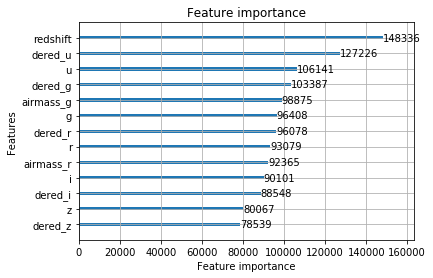

In [193]:
plot_importance(LGBM_model)

In [194]:
# 예측 평가
y_pred = LGBM_model.predict(X_Test)
y_pred

array([2., 2., 2., ..., 1., 0., 0.])

In [195]:
# evaluate predictions
mean_squared_error(y_test, y_pred)

0.07317533161501226

In [196]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}%".format(accuracy * 100.0))

Accuracy: 92.88992267555165%


In [199]:
#  Test set에 적용
result = LGBM_model.predict(Test_Data)
Submission_set['class'] = result
Submission_set.to_csv("submission3.csv", encoding='utf-8')

## Whole Data

In [202]:
LGBM_model1 = LGBMClassifier(max_depth = 27, learning_rate = 0.005, n_estimators = 30000,boosting_type='gbdt')
LGBM_model1.fit(X, Y, early_stopping_rounds = 5000, eval_metric ='logloss', eval_set =[(X_Test, y_test)])

[1]	valid_0's multi_logloss: 0.977614
Training until validation scores don't improve for 5000 rounds
[2]	valid_0's multi_logloss: 0.970777
[3]	valid_0's multi_logloss: 0.964035
[4]	valid_0's multi_logloss: 0.957381
[5]	valid_0's multi_logloss: 0.950811
[6]	valid_0's multi_logloss: 0.944318
[7]	valid_0's multi_logloss: 0.937901
[8]	valid_0's multi_logloss: 0.931578
[9]	valid_0's multi_logloss: 0.925332
[10]	valid_0's multi_logloss: 0.919175
[11]	valid_0's multi_logloss: 0.913087
[12]	valid_0's multi_logloss: 0.907064
[13]	valid_0's multi_logloss: 0.901117
[14]	valid_0's multi_logloss: 0.895255
[15]	valid_0's multi_logloss: 0.889421
[16]	valid_0's multi_logloss: 0.883683
[17]	valid_0's multi_logloss: 0.878011
[18]	valid_0's multi_logloss: 0.872397
[19]	valid_0's multi_logloss: 0.86685
[20]	valid_0's multi_logloss: 0.861376
[21]	valid_0's multi_logloss: 0.855967
[22]	valid_0's multi_logloss: 0.850593
[23]	valid_0's multi_logloss: 0.845293
[24]	valid_0's multi_logloss: 0.840057
[25]	valid_

[210]	valid_0's multi_logloss: 0.374668
[211]	valid_0's multi_logloss: 0.373571
[212]	valid_0's multi_logloss: 0.372483
[213]	valid_0's multi_logloss: 0.371405
[214]	valid_0's multi_logloss: 0.370328
[215]	valid_0's multi_logloss: 0.369264
[216]	valid_0's multi_logloss: 0.368203
[217]	valid_0's multi_logloss: 0.367158
[218]	valid_0's multi_logloss: 0.366117
[219]	valid_0's multi_logloss: 0.365083
[220]	valid_0's multi_logloss: 0.364057
[221]	valid_0's multi_logloss: 0.363038
[222]	valid_0's multi_logloss: 0.362018
[223]	valid_0's multi_logloss: 0.361016
[224]	valid_0's multi_logloss: 0.360022
[225]	valid_0's multi_logloss: 0.359029
[226]	valid_0's multi_logloss: 0.358048
[227]	valid_0's multi_logloss: 0.357075
[228]	valid_0's multi_logloss: 0.356099
[229]	valid_0's multi_logloss: 0.35514
[230]	valid_0's multi_logloss: 0.354185
[231]	valid_0's multi_logloss: 0.353238
[232]	valid_0's multi_logloss: 0.352296
[233]	valid_0's multi_logloss: 0.351361
[234]	valid_0's multi_logloss: 0.350436
[

[417]	valid_0's multi_logloss: 0.250091
[418]	valid_0's multi_logloss: 0.24979
[419]	valid_0's multi_logloss: 0.249481
[420]	valid_0's multi_logloss: 0.249171
[421]	valid_0's multi_logloss: 0.248873
[422]	valid_0's multi_logloss: 0.248582
[423]	valid_0's multi_logloss: 0.248284
[424]	valid_0's multi_logloss: 0.247994
[425]	valid_0's multi_logloss: 0.247701
[426]	valid_0's multi_logloss: 0.247406
[427]	valid_0's multi_logloss: 0.247122
[428]	valid_0's multi_logloss: 0.246839
[429]	valid_0's multi_logloss: 0.246559
[430]	valid_0's multi_logloss: 0.246276
[431]	valid_0's multi_logloss: 0.245999
[432]	valid_0's multi_logloss: 0.245716
[433]	valid_0's multi_logloss: 0.245436
[434]	valid_0's multi_logloss: 0.245162
[435]	valid_0's multi_logloss: 0.244883
[436]	valid_0's multi_logloss: 0.24461
[437]	valid_0's multi_logloss: 0.244343
[438]	valid_0's multi_logloss: 0.244065
[439]	valid_0's multi_logloss: 0.243803
[440]	valid_0's multi_logloss: 0.243534
[441]	valid_0's multi_logloss: 0.243271
[4

[627]	valid_0's multi_logloss: 0.211066
[628]	valid_0's multi_logloss: 0.210949
[629]	valid_0's multi_logloss: 0.21084
[630]	valid_0's multi_logloss: 0.210726
[631]	valid_0's multi_logloss: 0.21062
[632]	valid_0's multi_logloss: 0.210517
[633]	valid_0's multi_logloss: 0.210407
[634]	valid_0's multi_logloss: 0.210303
[635]	valid_0's multi_logloss: 0.2102
[636]	valid_0's multi_logloss: 0.210092
[637]	valid_0's multi_logloss: 0.209989
[638]	valid_0's multi_logloss: 0.209885
[639]	valid_0's multi_logloss: 0.209782
[640]	valid_0's multi_logloss: 0.209682
[641]	valid_0's multi_logloss: 0.209575
[642]	valid_0's multi_logloss: 0.209475
[643]	valid_0's multi_logloss: 0.209368
[644]	valid_0's multi_logloss: 0.209269
[645]	valid_0's multi_logloss: 0.209167
[646]	valid_0's multi_logloss: 0.209069
[647]	valid_0's multi_logloss: 0.208968
[648]	valid_0's multi_logloss: 0.208868
[649]	valid_0's multi_logloss: 0.208776
[650]	valid_0's multi_logloss: 0.208681
[651]	valid_0's multi_logloss: 0.208586
[652

[836]	valid_0's multi_logloss: 0.196151
[837]	valid_0's multi_logloss: 0.196108
[838]	valid_0's multi_logloss: 0.196065
[839]	valid_0's multi_logloss: 0.196024
[840]	valid_0's multi_logloss: 0.195976
[841]	valid_0's multi_logloss: 0.195934
[842]	valid_0's multi_logloss: 0.195882
[843]	valid_0's multi_logloss: 0.195835
[844]	valid_0's multi_logloss: 0.195793
[845]	valid_0's multi_logloss: 0.19575
[846]	valid_0's multi_logloss: 0.195703
[847]	valid_0's multi_logloss: 0.195662
[848]	valid_0's multi_logloss: 0.195618
[849]	valid_0's multi_logloss: 0.195578
[850]	valid_0's multi_logloss: 0.195527
[851]	valid_0's multi_logloss: 0.195486
[852]	valid_0's multi_logloss: 0.195445
[853]	valid_0's multi_logloss: 0.195409
[854]	valid_0's multi_logloss: 0.19537
[855]	valid_0's multi_logloss: 0.195327
[856]	valid_0's multi_logloss: 0.195289
[857]	valid_0's multi_logloss: 0.195247
[858]	valid_0's multi_logloss: 0.195202
[859]	valid_0's multi_logloss: 0.195155
[860]	valid_0's multi_logloss: 0.195106
[8

[1044]	valid_0's multi_logloss: 0.189109
[1045]	valid_0's multi_logloss: 0.189083
[1046]	valid_0's multi_logloss: 0.18905
[1047]	valid_0's multi_logloss: 0.189024
[1048]	valid_0's multi_logloss: 0.188996
[1049]	valid_0's multi_logloss: 0.188967
[1050]	valid_0's multi_logloss: 0.18894
[1051]	valid_0's multi_logloss: 0.188915
[1052]	valid_0's multi_logloss: 0.188885
[1053]	valid_0's multi_logloss: 0.188856
[1054]	valid_0's multi_logloss: 0.18883
[1055]	valid_0's multi_logloss: 0.188804
[1056]	valid_0's multi_logloss: 0.188777
[1057]	valid_0's multi_logloss: 0.188739
[1058]	valid_0's multi_logloss: 0.188711
[1059]	valid_0's multi_logloss: 0.188677
[1060]	valid_0's multi_logloss: 0.188651
[1061]	valid_0's multi_logloss: 0.188622
[1062]	valid_0's multi_logloss: 0.188598
[1063]	valid_0's multi_logloss: 0.188564
[1064]	valid_0's multi_logloss: 0.188539
[1065]	valid_0's multi_logloss: 0.188509
[1066]	valid_0's multi_logloss: 0.188484
[1067]	valid_0's multi_logloss: 0.18846
[1068]	valid_0's mul

[1249]	valid_0's multi_logloss: 0.184376
[1250]	valid_0's multi_logloss: 0.184352
[1251]	valid_0's multi_logloss: 0.184336
[1252]	valid_0's multi_logloss: 0.184316
[1253]	valid_0's multi_logloss: 0.184295
[1254]	valid_0's multi_logloss: 0.184276
[1255]	valid_0's multi_logloss: 0.184264
[1256]	valid_0's multi_logloss: 0.184243
[1257]	valid_0's multi_logloss: 0.184222
[1258]	valid_0's multi_logloss: 0.184207
[1259]	valid_0's multi_logloss: 0.184191
[1260]	valid_0's multi_logloss: 0.184179
[1261]	valid_0's multi_logloss: 0.184165
[1262]	valid_0's multi_logloss: 0.18415
[1263]	valid_0's multi_logloss: 0.184131
[1264]	valid_0's multi_logloss: 0.18411
[1265]	valid_0's multi_logloss: 0.184094
[1266]	valid_0's multi_logloss: 0.184073
[1267]	valid_0's multi_logloss: 0.184061
[1268]	valid_0's multi_logloss: 0.184038
[1269]	valid_0's multi_logloss: 0.184016
[1270]	valid_0's multi_logloss: 0.183991
[1271]	valid_0's multi_logloss: 0.183977
[1272]	valid_0's multi_logloss: 0.183966
[1273]	valid_0's m

[1451]	valid_0's multi_logloss: 0.181064
[1452]	valid_0's multi_logloss: 0.181049
[1453]	valid_0's multi_logloss: 0.181031
[1454]	valid_0's multi_logloss: 0.181018
[1455]	valid_0's multi_logloss: 0.181
[1456]	valid_0's multi_logloss: 0.180986
[1457]	valid_0's multi_logloss: 0.180975
[1458]	valid_0's multi_logloss: 0.180963
[1459]	valid_0's multi_logloss: 0.180947
[1460]	valid_0's multi_logloss: 0.180928
[1461]	valid_0's multi_logloss: 0.180908
[1462]	valid_0's multi_logloss: 0.180891
[1463]	valid_0's multi_logloss: 0.180879
[1464]	valid_0's multi_logloss: 0.180858
[1465]	valid_0's multi_logloss: 0.180848
[1466]	valid_0's multi_logloss: 0.180836
[1467]	valid_0's multi_logloss: 0.180822
[1468]	valid_0's multi_logloss: 0.180808
[1469]	valid_0's multi_logloss: 0.18079
[1470]	valid_0's multi_logloss: 0.180777
[1471]	valid_0's multi_logloss: 0.180758
[1472]	valid_0's multi_logloss: 0.180739
[1473]	valid_0's multi_logloss: 0.180719
[1474]	valid_0's multi_logloss: 0.180707
[1475]	valid_0's mul

[1654]	valid_0's multi_logloss: 0.178231
[1655]	valid_0's multi_logloss: 0.178223
[1656]	valid_0's multi_logloss: 0.17821
[1657]	valid_0's multi_logloss: 0.178201
[1658]	valid_0's multi_logloss: 0.178189
[1659]	valid_0's multi_logloss: 0.178178
[1660]	valid_0's multi_logloss: 0.178163
[1661]	valid_0's multi_logloss: 0.178152
[1662]	valid_0's multi_logloss: 0.178141
[1663]	valid_0's multi_logloss: 0.178126
[1664]	valid_0's multi_logloss: 0.178116
[1665]	valid_0's multi_logloss: 0.178105
[1666]	valid_0's multi_logloss: 0.17809
[1667]	valid_0's multi_logloss: 0.178082
[1668]	valid_0's multi_logloss: 0.178065
[1669]	valid_0's multi_logloss: 0.178051
[1670]	valid_0's multi_logloss: 0.178038
[1671]	valid_0's multi_logloss: 0.17803
[1672]	valid_0's multi_logloss: 0.178019
[1673]	valid_0's multi_logloss: 0.178001
[1674]	valid_0's multi_logloss: 0.177982
[1675]	valid_0's multi_logloss: 0.177959
[1676]	valid_0's multi_logloss: 0.17795
[1677]	valid_0's multi_logloss: 0.177938
[1678]	valid_0's mul

[1855]	valid_0's multi_logloss: 0.17579
[1856]	valid_0's multi_logloss: 0.175778
[1857]	valid_0's multi_logloss: 0.175765
[1858]	valid_0's multi_logloss: 0.175755
[1859]	valid_0's multi_logloss: 0.17574
[1860]	valid_0's multi_logloss: 0.175728
[1861]	valid_0's multi_logloss: 0.175715
[1862]	valid_0's multi_logloss: 0.175702
[1863]	valid_0's multi_logloss: 0.17569
[1864]	valid_0's multi_logloss: 0.175663
[1865]	valid_0's multi_logloss: 0.175647
[1866]	valid_0's multi_logloss: 0.175638
[1867]	valid_0's multi_logloss: 0.175629
[1868]	valid_0's multi_logloss: 0.175612
[1869]	valid_0's multi_logloss: 0.175601
[1870]	valid_0's multi_logloss: 0.175588
[1871]	valid_0's multi_logloss: 0.175567
[1872]	valid_0's multi_logloss: 0.175556
[1873]	valid_0's multi_logloss: 0.175546
[1874]	valid_0's multi_logloss: 0.175536
[1875]	valid_0's multi_logloss: 0.175524
[1876]	valid_0's multi_logloss: 0.175511
[1877]	valid_0's multi_logloss: 0.175502
[1878]	valid_0's multi_logloss: 0.175489
[1879]	valid_0's mu

[2055]	valid_0's multi_logloss: 0.173573
[2056]	valid_0's multi_logloss: 0.173564
[2057]	valid_0's multi_logloss: 0.173558
[2058]	valid_0's multi_logloss: 0.17355
[2059]	valid_0's multi_logloss: 0.173537
[2060]	valid_0's multi_logloss: 0.173526
[2061]	valid_0's multi_logloss: 0.173514
[2062]	valid_0's multi_logloss: 0.173501
[2063]	valid_0's multi_logloss: 0.173491
[2064]	valid_0's multi_logloss: 0.173482
[2065]	valid_0's multi_logloss: 0.173473
[2066]	valid_0's multi_logloss: 0.17346
[2067]	valid_0's multi_logloss: 0.17345
[2068]	valid_0's multi_logloss: 0.173437
[2069]	valid_0's multi_logloss: 0.173424
[2070]	valid_0's multi_logloss: 0.173411
[2071]	valid_0's multi_logloss: 0.173399
[2072]	valid_0's multi_logloss: 0.173385
[2073]	valid_0's multi_logloss: 0.173373
[2074]	valid_0's multi_logloss: 0.173364
[2075]	valid_0's multi_logloss: 0.173356
[2076]	valid_0's multi_logloss: 0.173342
[2077]	valid_0's multi_logloss: 0.173327
[2078]	valid_0's multi_logloss: 0.173316
[2079]	valid_0's mu

[2261]	valid_0's multi_logloss: 0.171092
[2262]	valid_0's multi_logloss: 0.171082
[2263]	valid_0's multi_logloss: 0.171072
[2264]	valid_0's multi_logloss: 0.171061
[2265]	valid_0's multi_logloss: 0.171048
[2266]	valid_0's multi_logloss: 0.171038
[2267]	valid_0's multi_logloss: 0.171031
[2268]	valid_0's multi_logloss: 0.171023
[2269]	valid_0's multi_logloss: 0.171011
[2270]	valid_0's multi_logloss: 0.171001
[2271]	valid_0's multi_logloss: 0.170994
[2272]	valid_0's multi_logloss: 0.170981
[2273]	valid_0's multi_logloss: 0.170963
[2274]	valid_0's multi_logloss: 0.170954
[2275]	valid_0's multi_logloss: 0.170943
[2276]	valid_0's multi_logloss: 0.170932
[2277]	valid_0's multi_logloss: 0.170922
[2278]	valid_0's multi_logloss: 0.170913
[2279]	valid_0's multi_logloss: 0.170902
[2280]	valid_0's multi_logloss: 0.170885
[2281]	valid_0's multi_logloss: 0.170873
[2282]	valid_0's multi_logloss: 0.170859
[2283]	valid_0's multi_logloss: 0.170851
[2284]	valid_0's multi_logloss: 0.170843
[2285]	valid_0's

[2462]	valid_0's multi_logloss: 0.169056
[2463]	valid_0's multi_logloss: 0.169052
[2464]	valid_0's multi_logloss: 0.169042
[2465]	valid_0's multi_logloss: 0.169033
[2466]	valid_0's multi_logloss: 0.169023
[2467]	valid_0's multi_logloss: 0.169013
[2468]	valid_0's multi_logloss: 0.169006
[2469]	valid_0's multi_logloss: 0.168999
[2470]	valid_0's multi_logloss: 0.168988
[2471]	valid_0's multi_logloss: 0.168978
[2472]	valid_0's multi_logloss: 0.16897
[2473]	valid_0's multi_logloss: 0.168961
[2474]	valid_0's multi_logloss: 0.16895
[2475]	valid_0's multi_logloss: 0.168942
[2476]	valid_0's multi_logloss: 0.168935
[2477]	valid_0's multi_logloss: 0.168921
[2478]	valid_0's multi_logloss: 0.168912
[2479]	valid_0's multi_logloss: 0.168901
[2480]	valid_0's multi_logloss: 0.168891
[2481]	valid_0's multi_logloss: 0.168877
[2482]	valid_0's multi_logloss: 0.168868
[2483]	valid_0's multi_logloss: 0.168861
[2484]	valid_0's multi_logloss: 0.168855
[2485]	valid_0's multi_logloss: 0.168848
[2486]	valid_0's m

[2663]	valid_0's multi_logloss: 0.167342
[2664]	valid_0's multi_logloss: 0.167333
[2665]	valid_0's multi_logloss: 0.167325
[2666]	valid_0's multi_logloss: 0.167315
[2667]	valid_0's multi_logloss: 0.167307
[2668]	valid_0's multi_logloss: 0.167297
[2669]	valid_0's multi_logloss: 0.167291
[2670]	valid_0's multi_logloss: 0.167286
[2671]	valid_0's multi_logloss: 0.167279
[2672]	valid_0's multi_logloss: 0.16727
[2673]	valid_0's multi_logloss: 0.167264
[2674]	valid_0's multi_logloss: 0.16726
[2675]	valid_0's multi_logloss: 0.16725
[2676]	valid_0's multi_logloss: 0.16724
[2677]	valid_0's multi_logloss: 0.167236
[2678]	valid_0's multi_logloss: 0.167229
[2679]	valid_0's multi_logloss: 0.167222
[2680]	valid_0's multi_logloss: 0.167213
[2681]	valid_0's multi_logloss: 0.167206
[2682]	valid_0's multi_logloss: 0.167204
[2683]	valid_0's multi_logloss: 0.167197
[2684]	valid_0's multi_logloss: 0.167186
[2685]	valid_0's multi_logloss: 0.167179
[2686]	valid_0's multi_logloss: 0.167168
[2687]	valid_0's mul

[2864]	valid_0's multi_logloss: 0.165883
[2865]	valid_0's multi_logloss: 0.165872
[2866]	valid_0's multi_logloss: 0.165862
[2867]	valid_0's multi_logloss: 0.165853
[2868]	valid_0's multi_logloss: 0.165843
[2869]	valid_0's multi_logloss: 0.165836
[2870]	valid_0's multi_logloss: 0.165831
[2871]	valid_0's multi_logloss: 0.165823
[2872]	valid_0's multi_logloss: 0.165815
[2873]	valid_0's multi_logloss: 0.165809
[2874]	valid_0's multi_logloss: 0.165802
[2875]	valid_0's multi_logloss: 0.165793
[2876]	valid_0's multi_logloss: 0.165785
[2877]	valid_0's multi_logloss: 0.165781
[2878]	valid_0's multi_logloss: 0.165777
[2879]	valid_0's multi_logloss: 0.16577
[2880]	valid_0's multi_logloss: 0.165763
[2881]	valid_0's multi_logloss: 0.165759
[2882]	valid_0's multi_logloss: 0.165752
[2883]	valid_0's multi_logloss: 0.165745
[2884]	valid_0's multi_logloss: 0.165736
[2885]	valid_0's multi_logloss: 0.165729
[2886]	valid_0's multi_logloss: 0.165718
[2887]	valid_0's multi_logloss: 0.16571
[2888]	valid_0's m

[3065]	valid_0's multi_logloss: 0.164403
[3066]	valid_0's multi_logloss: 0.164398
[3067]	valid_0's multi_logloss: 0.164393
[3068]	valid_0's multi_logloss: 0.164389
[3069]	valid_0's multi_logloss: 0.16438
[3070]	valid_0's multi_logloss: 0.164375
[3071]	valid_0's multi_logloss: 0.164365
[3072]	valid_0's multi_logloss: 0.164357
[3073]	valid_0's multi_logloss: 0.16435
[3074]	valid_0's multi_logloss: 0.164339
[3075]	valid_0's multi_logloss: 0.164333
[3076]	valid_0's multi_logloss: 0.164327
[3077]	valid_0's multi_logloss: 0.164316
[3078]	valid_0's multi_logloss: 0.164311
[3079]	valid_0's multi_logloss: 0.164302
[3080]	valid_0's multi_logloss: 0.16429
[3081]	valid_0's multi_logloss: 0.164283
[3082]	valid_0's multi_logloss: 0.164274
[3083]	valid_0's multi_logloss: 0.164267
[3084]	valid_0's multi_logloss: 0.16426
[3085]	valid_0's multi_logloss: 0.164253
[3086]	valid_0's multi_logloss: 0.164246
[3087]	valid_0's multi_logloss: 0.164239
[3088]	valid_0's multi_logloss: 0.164232
[3089]	valid_0's mul

[3268]	valid_0's multi_logloss: 0.162942
[3269]	valid_0's multi_logloss: 0.162935
[3270]	valid_0's multi_logloss: 0.162927
[3271]	valid_0's multi_logloss: 0.162921
[3272]	valid_0's multi_logloss: 0.162914
[3273]	valid_0's multi_logloss: 0.162906
[3274]	valid_0's multi_logloss: 0.162903
[3275]	valid_0's multi_logloss: 0.162896
[3276]	valid_0's multi_logloss: 0.16289
[3277]	valid_0's multi_logloss: 0.162885
[3278]	valid_0's multi_logloss: 0.162875
[3279]	valid_0's multi_logloss: 0.162872
[3280]	valid_0's multi_logloss: 0.162863
[3281]	valid_0's multi_logloss: 0.162853
[3282]	valid_0's multi_logloss: 0.162848
[3283]	valid_0's multi_logloss: 0.162842
[3284]	valid_0's multi_logloss: 0.162834
[3285]	valid_0's multi_logloss: 0.162828
[3286]	valid_0's multi_logloss: 0.162816
[3287]	valid_0's multi_logloss: 0.16281
[3288]	valid_0's multi_logloss: 0.162801
[3289]	valid_0's multi_logloss: 0.162793
[3290]	valid_0's multi_logloss: 0.162786
[3291]	valid_0's multi_logloss: 0.16278
[3292]	valid_0's mu

[3472]	valid_0's multi_logloss: 0.161605
[3473]	valid_0's multi_logloss: 0.161598
[3474]	valid_0's multi_logloss: 0.161596
[3475]	valid_0's multi_logloss: 0.161586
[3476]	valid_0's multi_logloss: 0.16158
[3477]	valid_0's multi_logloss: 0.161571
[3478]	valid_0's multi_logloss: 0.161565
[3479]	valid_0's multi_logloss: 0.16156
[3480]	valid_0's multi_logloss: 0.161554
[3481]	valid_0's multi_logloss: 0.161544
[3482]	valid_0's multi_logloss: 0.161539
[3483]	valid_0's multi_logloss: 0.161532
[3484]	valid_0's multi_logloss: 0.161528
[3485]	valid_0's multi_logloss: 0.161523
[3486]	valid_0's multi_logloss: 0.161514
[3487]	valid_0's multi_logloss: 0.161508
[3488]	valid_0's multi_logloss: 0.161504
[3489]	valid_0's multi_logloss: 0.161495
[3490]	valid_0's multi_logloss: 0.161488
[3491]	valid_0's multi_logloss: 0.16148
[3492]	valid_0's multi_logloss: 0.161475
[3493]	valid_0's multi_logloss: 0.161471
[3494]	valid_0's multi_logloss: 0.161466
[3495]	valid_0's multi_logloss: 0.16146
[3496]	valid_0's mul

[3676]	valid_0's multi_logloss: 0.160395
[3677]	valid_0's multi_logloss: 0.160391
[3678]	valid_0's multi_logloss: 0.160384
[3679]	valid_0's multi_logloss: 0.160378
[3680]	valid_0's multi_logloss: 0.160368
[3681]	valid_0's multi_logloss: 0.16036
[3682]	valid_0's multi_logloss: 0.160354
[3683]	valid_0's multi_logloss: 0.160347
[3684]	valid_0's multi_logloss: 0.160343
[3685]	valid_0's multi_logloss: 0.160339
[3686]	valid_0's multi_logloss: 0.160334
[3687]	valid_0's multi_logloss: 0.160326
[3688]	valid_0's multi_logloss: 0.160318
[3689]	valid_0's multi_logloss: 0.160314
[3690]	valid_0's multi_logloss: 0.16031
[3691]	valid_0's multi_logloss: 0.160306
[3692]	valid_0's multi_logloss: 0.160301
[3693]	valid_0's multi_logloss: 0.160298
[3694]	valid_0's multi_logloss: 0.160295
[3695]	valid_0's multi_logloss: 0.160292
[3696]	valid_0's multi_logloss: 0.160287
[3697]	valid_0's multi_logloss: 0.16028
[3698]	valid_0's multi_logloss: 0.160276
[3699]	valid_0's multi_logloss: 0.160271
[3700]	valid_0's mu

[3880]	valid_0's multi_logloss: 0.159215
[3881]	valid_0's multi_logloss: 0.159208
[3882]	valid_0's multi_logloss: 0.159202
[3883]	valid_0's multi_logloss: 0.159195
[3884]	valid_0's multi_logloss: 0.159191
[3885]	valid_0's multi_logloss: 0.159186
[3886]	valid_0's multi_logloss: 0.159181
[3887]	valid_0's multi_logloss: 0.159176
[3888]	valid_0's multi_logloss: 0.15917
[3889]	valid_0's multi_logloss: 0.159166
[3890]	valid_0's multi_logloss: 0.15916
[3891]	valid_0's multi_logloss: 0.159154
[3892]	valid_0's multi_logloss: 0.159151
[3893]	valid_0's multi_logloss: 0.159145
[3894]	valid_0's multi_logloss: 0.159143
[3895]	valid_0's multi_logloss: 0.159138
[3896]	valid_0's multi_logloss: 0.159134
[3897]	valid_0's multi_logloss: 0.159126
[3898]	valid_0's multi_logloss: 0.159122
[3899]	valid_0's multi_logloss: 0.159116
[3900]	valid_0's multi_logloss: 0.159108
[3901]	valid_0's multi_logloss: 0.159102
[3902]	valid_0's multi_logloss: 0.159096
[3903]	valid_0's multi_logloss: 0.159092
[3904]	valid_0's m

[4081]	valid_0's multi_logloss: 0.158081
[4082]	valid_0's multi_logloss: 0.158073
[4083]	valid_0's multi_logloss: 0.158068
[4084]	valid_0's multi_logloss: 0.158061
[4085]	valid_0's multi_logloss: 0.158054
[4086]	valid_0's multi_logloss: 0.15805
[4087]	valid_0's multi_logloss: 0.158043
[4088]	valid_0's multi_logloss: 0.158036
[4089]	valid_0's multi_logloss: 0.158033
[4090]	valid_0's multi_logloss: 0.158028
[4091]	valid_0's multi_logloss: 0.15802
[4092]	valid_0's multi_logloss: 0.158016
[4093]	valid_0's multi_logloss: 0.158011
[4094]	valid_0's multi_logloss: 0.158007
[4095]	valid_0's multi_logloss: 0.158001
[4096]	valid_0's multi_logloss: 0.157994
[4097]	valid_0's multi_logloss: 0.157988
[4098]	valid_0's multi_logloss: 0.157984
[4099]	valid_0's multi_logloss: 0.15798
[4100]	valid_0's multi_logloss: 0.157975
[4101]	valid_0's multi_logloss: 0.157968
[4102]	valid_0's multi_logloss: 0.157961
[4103]	valid_0's multi_logloss: 0.157954
[4104]	valid_0's multi_logloss: 0.157948
[4105]	valid_0's mu

[4285]	valid_0's multi_logloss: 0.156968
[4286]	valid_0's multi_logloss: 0.156962
[4287]	valid_0's multi_logloss: 0.156959
[4288]	valid_0's multi_logloss: 0.156955
[4289]	valid_0's multi_logloss: 0.156948
[4290]	valid_0's multi_logloss: 0.156942
[4291]	valid_0's multi_logloss: 0.156936
[4292]	valid_0's multi_logloss: 0.156931
[4293]	valid_0's multi_logloss: 0.156926
[4294]	valid_0's multi_logloss: 0.156921
[4295]	valid_0's multi_logloss: 0.156915
[4296]	valid_0's multi_logloss: 0.156912
[4297]	valid_0's multi_logloss: 0.156909
[4298]	valid_0's multi_logloss: 0.156903
[4299]	valid_0's multi_logloss: 0.156897
[4300]	valid_0's multi_logloss: 0.15689
[4301]	valid_0's multi_logloss: 0.156883
[4302]	valid_0's multi_logloss: 0.156876
[4303]	valid_0's multi_logloss: 0.156865
[4304]	valid_0's multi_logloss: 0.15686
[4305]	valid_0's multi_logloss: 0.156852
[4306]	valid_0's multi_logloss: 0.156845
[4307]	valid_0's multi_logloss: 0.15684
[4308]	valid_0's multi_logloss: 0.156834
[4309]	valid_0's mu

[4488]	valid_0's multi_logloss: 0.155834
[4489]	valid_0's multi_logloss: 0.155827
[4490]	valid_0's multi_logloss: 0.155823
[4491]	valid_0's multi_logloss: 0.155819
[4492]	valid_0's multi_logloss: 0.155813
[4493]	valid_0's multi_logloss: 0.155805
[4494]	valid_0's multi_logloss: 0.155802
[4495]	valid_0's multi_logloss: 0.155797
[4496]	valid_0's multi_logloss: 0.155791
[4497]	valid_0's multi_logloss: 0.155785
[4498]	valid_0's multi_logloss: 0.155778
[4499]	valid_0's multi_logloss: 0.155772
[4500]	valid_0's multi_logloss: 0.155767
[4501]	valid_0's multi_logloss: 0.155761
[4502]	valid_0's multi_logloss: 0.155755
[4503]	valid_0's multi_logloss: 0.155752
[4504]	valid_0's multi_logloss: 0.155746
[4505]	valid_0's multi_logloss: 0.155742
[4506]	valid_0's multi_logloss: 0.15574
[4507]	valid_0's multi_logloss: 0.155733
[4508]	valid_0's multi_logloss: 0.155726
[4509]	valid_0's multi_logloss: 0.15572
[4510]	valid_0's multi_logloss: 0.155718
[4511]	valid_0's multi_logloss: 0.155715
[4512]	valid_0's m

[4692]	valid_0's multi_logloss: 0.154757
[4693]	valid_0's multi_logloss: 0.154749
[4694]	valid_0's multi_logloss: 0.154746
[4695]	valid_0's multi_logloss: 0.154742
[4696]	valid_0's multi_logloss: 0.154738
[4697]	valid_0's multi_logloss: 0.154734
[4698]	valid_0's multi_logloss: 0.154727
[4699]	valid_0's multi_logloss: 0.15472
[4700]	valid_0's multi_logloss: 0.154714
[4701]	valid_0's multi_logloss: 0.154705
[4702]	valid_0's multi_logloss: 0.1547
[4703]	valid_0's multi_logloss: 0.154693
[4704]	valid_0's multi_logloss: 0.15469
[4705]	valid_0's multi_logloss: 0.154684
[4706]	valid_0's multi_logloss: 0.154677
[4707]	valid_0's multi_logloss: 0.15467
[4708]	valid_0's multi_logloss: 0.154663
[4709]	valid_0's multi_logloss: 0.154656
[4710]	valid_0's multi_logloss: 0.154651
[4711]	valid_0's multi_logloss: 0.154644
[4712]	valid_0's multi_logloss: 0.154641
[4713]	valid_0's multi_logloss: 0.154635
[4714]	valid_0's multi_logloss: 0.15463
[4715]	valid_0's multi_logloss: 0.154625
[4716]	valid_0's multi

[4896]	valid_0's multi_logloss: 0.153752
[4897]	valid_0's multi_logloss: 0.153747
[4898]	valid_0's multi_logloss: 0.153744
[4899]	valid_0's multi_logloss: 0.153737
[4900]	valid_0's multi_logloss: 0.153735
[4901]	valid_0's multi_logloss: 0.153728
[4902]	valid_0's multi_logloss: 0.153723
[4903]	valid_0's multi_logloss: 0.153716
[4904]	valid_0's multi_logloss: 0.153708
[4905]	valid_0's multi_logloss: 0.153706
[4906]	valid_0's multi_logloss: 0.153703
[4907]	valid_0's multi_logloss: 0.153698
[4908]	valid_0's multi_logloss: 0.153691
[4909]	valid_0's multi_logloss: 0.153688
[4910]	valid_0's multi_logloss: 0.153684
[4911]	valid_0's multi_logloss: 0.153679
[4912]	valid_0's multi_logloss: 0.153673
[4913]	valid_0's multi_logloss: 0.153671
[4914]	valid_0's multi_logloss: 0.153665
[4915]	valid_0's multi_logloss: 0.15366
[4916]	valid_0's multi_logloss: 0.153657
[4917]	valid_0's multi_logloss: 0.153654
[4918]	valid_0's multi_logloss: 0.153651
[4919]	valid_0's multi_logloss: 0.153647
[4920]	valid_0's 

[5101]	valid_0's multi_logloss: 0.152726
[5102]	valid_0's multi_logloss: 0.15272
[5103]	valid_0's multi_logloss: 0.152717
[5104]	valid_0's multi_logloss: 0.152712
[5105]	valid_0's multi_logloss: 0.152708
[5106]	valid_0's multi_logloss: 0.152701
[5107]	valid_0's multi_logloss: 0.152697
[5108]	valid_0's multi_logloss: 0.152693
[5109]	valid_0's multi_logloss: 0.152688
[5110]	valid_0's multi_logloss: 0.152681
[5111]	valid_0's multi_logloss: 0.152676
[5112]	valid_0's multi_logloss: 0.152673
[5113]	valid_0's multi_logloss: 0.152668
[5114]	valid_0's multi_logloss: 0.152663
[5115]	valid_0's multi_logloss: 0.152658
[5116]	valid_0's multi_logloss: 0.152654
[5117]	valid_0's multi_logloss: 0.152648
[5118]	valid_0's multi_logloss: 0.152642
[5119]	valid_0's multi_logloss: 0.152639
[5120]	valid_0's multi_logloss: 0.152633
[5121]	valid_0's multi_logloss: 0.15263
[5122]	valid_0's multi_logloss: 0.152626
[5123]	valid_0's multi_logloss: 0.152621
[5124]	valid_0's multi_logloss: 0.152615
[5125]	valid_0's m

[5304]	valid_0's multi_logloss: 0.151707
[5305]	valid_0's multi_logloss: 0.1517
[5306]	valid_0's multi_logloss: 0.151696
[5307]	valid_0's multi_logloss: 0.15169
[5308]	valid_0's multi_logloss: 0.151685
[5309]	valid_0's multi_logloss: 0.151682
[5310]	valid_0's multi_logloss: 0.151677
[5311]	valid_0's multi_logloss: 0.151674
[5312]	valid_0's multi_logloss: 0.151667
[5313]	valid_0's multi_logloss: 0.151662
[5314]	valid_0's multi_logloss: 0.151655
[5315]	valid_0's multi_logloss: 0.15165
[5316]	valid_0's multi_logloss: 0.151644
[5317]	valid_0's multi_logloss: 0.151639
[5318]	valid_0's multi_logloss: 0.151635
[5319]	valid_0's multi_logloss: 0.151629
[5320]	valid_0's multi_logloss: 0.151625
[5321]	valid_0's multi_logloss: 0.151621
[5322]	valid_0's multi_logloss: 0.151616
[5323]	valid_0's multi_logloss: 0.151611
[5324]	valid_0's multi_logloss: 0.151608
[5325]	valid_0's multi_logloss: 0.151602
[5326]	valid_0's multi_logloss: 0.151597
[5327]	valid_0's multi_logloss: 0.151592
[5328]	valid_0's mul

[5509]	valid_0's multi_logloss: 0.150739
[5510]	valid_0's multi_logloss: 0.150734
[5511]	valid_0's multi_logloss: 0.150729
[5512]	valid_0's multi_logloss: 0.150725
[5513]	valid_0's multi_logloss: 0.15072
[5514]	valid_0's multi_logloss: 0.150716
[5515]	valid_0's multi_logloss: 0.15071
[5516]	valid_0's multi_logloss: 0.150704
[5517]	valid_0's multi_logloss: 0.150699
[5518]	valid_0's multi_logloss: 0.150693
[5519]	valid_0's multi_logloss: 0.150688
[5520]	valid_0's multi_logloss: 0.150681
[5521]	valid_0's multi_logloss: 0.150675
[5522]	valid_0's multi_logloss: 0.15067
[5523]	valid_0's multi_logloss: 0.150664
[5524]	valid_0's multi_logloss: 0.150658
[5525]	valid_0's multi_logloss: 0.150654
[5526]	valid_0's multi_logloss: 0.150651
[5527]	valid_0's multi_logloss: 0.150645
[5528]	valid_0's multi_logloss: 0.15064
[5529]	valid_0's multi_logloss: 0.150636
[5530]	valid_0's multi_logloss: 0.150629
[5531]	valid_0's multi_logloss: 0.150623
[5532]	valid_0's multi_logloss: 0.150618
[5533]	valid_0's mul

[5712]	valid_0's multi_logloss: 0.149842
[5713]	valid_0's multi_logloss: 0.14984
[5714]	valid_0's multi_logloss: 0.149833
[5715]	valid_0's multi_logloss: 0.14983
[5716]	valid_0's multi_logloss: 0.149827
[5717]	valid_0's multi_logloss: 0.149823
[5718]	valid_0's multi_logloss: 0.149819
[5719]	valid_0's multi_logloss: 0.149815
[5720]	valid_0's multi_logloss: 0.149809
[5721]	valid_0's multi_logloss: 0.149804
[5722]	valid_0's multi_logloss: 0.149799
[5723]	valid_0's multi_logloss: 0.149794
[5724]	valid_0's multi_logloss: 0.149791
[5725]	valid_0's multi_logloss: 0.149789
[5726]	valid_0's multi_logloss: 0.149787
[5727]	valid_0's multi_logloss: 0.149785
[5728]	valid_0's multi_logloss: 0.149782
[5729]	valid_0's multi_logloss: 0.149778
[5730]	valid_0's multi_logloss: 0.149773
[5731]	valid_0's multi_logloss: 0.14977
[5732]	valid_0's multi_logloss: 0.149765
[5733]	valid_0's multi_logloss: 0.14976
[5734]	valid_0's multi_logloss: 0.149758
[5735]	valid_0's multi_logloss: 0.149755
[5736]	valid_0's mul

[5914]	valid_0's multi_logloss: 0.14901
[5915]	valid_0's multi_logloss: 0.149006
[5916]	valid_0's multi_logloss: 0.149001
[5917]	valid_0's multi_logloss: 0.148996
[5918]	valid_0's multi_logloss: 0.148993
[5919]	valid_0's multi_logloss: 0.148988
[5920]	valid_0's multi_logloss: 0.148985
[5921]	valid_0's multi_logloss: 0.148982
[5922]	valid_0's multi_logloss: 0.148976
[5923]	valid_0's multi_logloss: 0.148972
[5924]	valid_0's multi_logloss: 0.148968
[5925]	valid_0's multi_logloss: 0.148965
[5926]	valid_0's multi_logloss: 0.148962
[5927]	valid_0's multi_logloss: 0.14896
[5928]	valid_0's multi_logloss: 0.148957
[5929]	valid_0's multi_logloss: 0.148955
[5930]	valid_0's multi_logloss: 0.148949
[5931]	valid_0's multi_logloss: 0.148947
[5932]	valid_0's multi_logloss: 0.14894
[5933]	valid_0's multi_logloss: 0.148936
[5934]	valid_0's multi_logloss: 0.148932
[5935]	valid_0's multi_logloss: 0.148928
[5936]	valid_0's multi_logloss: 0.148924
[5937]	valid_0's multi_logloss: 0.14892
[5938]	valid_0's mul

[6117]	valid_0's multi_logloss: 0.148163
[6118]	valid_0's multi_logloss: 0.148157
[6119]	valid_0's multi_logloss: 0.148155
[6120]	valid_0's multi_logloss: 0.148152
[6121]	valid_0's multi_logloss: 0.148148
[6122]	valid_0's multi_logloss: 0.148145
[6123]	valid_0's multi_logloss: 0.148143
[6124]	valid_0's multi_logloss: 0.148138
[6125]	valid_0's multi_logloss: 0.148134
[6126]	valid_0's multi_logloss: 0.148129
[6127]	valid_0's multi_logloss: 0.148127
[6128]	valid_0's multi_logloss: 0.148124
[6129]	valid_0's multi_logloss: 0.148122
[6130]	valid_0's multi_logloss: 0.148117
[6131]	valid_0's multi_logloss: 0.148113
[6132]	valid_0's multi_logloss: 0.148106
[6133]	valid_0's multi_logloss: 0.148102
[6134]	valid_0's multi_logloss: 0.148097
[6135]	valid_0's multi_logloss: 0.148093
[6136]	valid_0's multi_logloss: 0.14809
[6137]	valid_0's multi_logloss: 0.148086
[6138]	valid_0's multi_logloss: 0.148083
[6139]	valid_0's multi_logloss: 0.148077
[6140]	valid_0's multi_logloss: 0.148071
[6141]	valid_0's 

[6318]	valid_0's multi_logloss: 0.14732
[6319]	valid_0's multi_logloss: 0.147317
[6320]	valid_0's multi_logloss: 0.147313
[6321]	valid_0's multi_logloss: 0.147307
[6322]	valid_0's multi_logloss: 0.147304
[6323]	valid_0's multi_logloss: 0.147301
[6324]	valid_0's multi_logloss: 0.147296
[6325]	valid_0's multi_logloss: 0.147293
[6326]	valid_0's multi_logloss: 0.147289
[6327]	valid_0's multi_logloss: 0.147286
[6328]	valid_0's multi_logloss: 0.147282
[6329]	valid_0's multi_logloss: 0.147278
[6330]	valid_0's multi_logloss: 0.147272
[6331]	valid_0's multi_logloss: 0.147268
[6332]	valid_0's multi_logloss: 0.147264
[6333]	valid_0's multi_logloss: 0.147259
[6334]	valid_0's multi_logloss: 0.147255
[6335]	valid_0's multi_logloss: 0.147252
[6336]	valid_0's multi_logloss: 0.14725
[6337]	valid_0's multi_logloss: 0.147246
[6338]	valid_0's multi_logloss: 0.147241
[6339]	valid_0's multi_logloss: 0.147237
[6340]	valid_0's multi_logloss: 0.147234
[6341]	valid_0's multi_logloss: 0.147232
[6342]	valid_0's m

[6523]	valid_0's multi_logloss: 0.146478
[6524]	valid_0's multi_logloss: 0.146471
[6525]	valid_0's multi_logloss: 0.146468
[6526]	valid_0's multi_logloss: 0.146464
[6527]	valid_0's multi_logloss: 0.146462
[6528]	valid_0's multi_logloss: 0.146459
[6529]	valid_0's multi_logloss: 0.146453
[6530]	valid_0's multi_logloss: 0.14645
[6531]	valid_0's multi_logloss: 0.146443
[6532]	valid_0's multi_logloss: 0.146439
[6533]	valid_0's multi_logloss: 0.146435
[6534]	valid_0's multi_logloss: 0.146432
[6535]	valid_0's multi_logloss: 0.14643
[6536]	valid_0's multi_logloss: 0.146425
[6537]	valid_0's multi_logloss: 0.14642
[6538]	valid_0's multi_logloss: 0.146418
[6539]	valid_0's multi_logloss: 0.146415
[6540]	valid_0's multi_logloss: 0.146412
[6541]	valid_0's multi_logloss: 0.146406
[6542]	valid_0's multi_logloss: 0.146402
[6543]	valid_0's multi_logloss: 0.1464
[6544]	valid_0's multi_logloss: 0.146396
[6545]	valid_0's multi_logloss: 0.146391
[6546]	valid_0's multi_logloss: 0.146385
[6547]	valid_0's mult

[6731]	valid_0's multi_logloss: 0.145659
[6732]	valid_0's multi_logloss: 0.145658
[6733]	valid_0's multi_logloss: 0.145653
[6734]	valid_0's multi_logloss: 0.145651
[6735]	valid_0's multi_logloss: 0.145649
[6736]	valid_0's multi_logloss: 0.145646
[6737]	valid_0's multi_logloss: 0.14564
[6738]	valid_0's multi_logloss: 0.145638
[6739]	valid_0's multi_logloss: 0.145636
[6740]	valid_0's multi_logloss: 0.145632
[6741]	valid_0's multi_logloss: 0.145627
[6742]	valid_0's multi_logloss: 0.145625
[6743]	valid_0's multi_logloss: 0.145623
[6744]	valid_0's multi_logloss: 0.145619
[6745]	valid_0's multi_logloss: 0.145616
[6746]	valid_0's multi_logloss: 0.145614
[6747]	valid_0's multi_logloss: 0.145609
[6748]	valid_0's multi_logloss: 0.145605
[6749]	valid_0's multi_logloss: 0.145602
[6750]	valid_0's multi_logloss: 0.145599
[6751]	valid_0's multi_logloss: 0.145596
[6752]	valid_0's multi_logloss: 0.145595
[6753]	valid_0's multi_logloss: 0.145592
[6754]	valid_0's multi_logloss: 0.145589
[6755]	valid_0's 

[6931]	valid_0's multi_logloss: 0.144929
[6932]	valid_0's multi_logloss: 0.144926
[6933]	valid_0's multi_logloss: 0.144922
[6934]	valid_0's multi_logloss: 0.144918
[6935]	valid_0's multi_logloss: 0.144916
[6936]	valid_0's multi_logloss: 0.144909
[6937]	valid_0's multi_logloss: 0.144906
[6938]	valid_0's multi_logloss: 0.144902
[6939]	valid_0's multi_logloss: 0.144898
[6940]	valid_0's multi_logloss: 0.144894
[6941]	valid_0's multi_logloss: 0.144891
[6942]	valid_0's multi_logloss: 0.144888
[6943]	valid_0's multi_logloss: 0.144883
[6944]	valid_0's multi_logloss: 0.144875
[6945]	valid_0's multi_logloss: 0.14487
[6946]	valid_0's multi_logloss: 0.144867
[6947]	valid_0's multi_logloss: 0.144863
[6948]	valid_0's multi_logloss: 0.144856
[6949]	valid_0's multi_logloss: 0.144853
[6950]	valid_0's multi_logloss: 0.14485
[6951]	valid_0's multi_logloss: 0.144848
[6952]	valid_0's multi_logloss: 0.144845
[6953]	valid_0's multi_logloss: 0.144843
[6954]	valid_0's multi_logloss: 0.14484
[6955]	valid_0's mu

[7136]	valid_0's multi_logloss: 0.144152
[7137]	valid_0's multi_logloss: 0.144148
[7138]	valid_0's multi_logloss: 0.144142
[7139]	valid_0's multi_logloss: 0.144139
[7140]	valid_0's multi_logloss: 0.144135
[7141]	valid_0's multi_logloss: 0.14413
[7142]	valid_0's multi_logloss: 0.144126
[7143]	valid_0's multi_logloss: 0.144123
[7144]	valid_0's multi_logloss: 0.144119
[7145]	valid_0's multi_logloss: 0.144115
[7146]	valid_0's multi_logloss: 0.144111
[7147]	valid_0's multi_logloss: 0.144108
[7148]	valid_0's multi_logloss: 0.144106
[7149]	valid_0's multi_logloss: 0.144103
[7150]	valid_0's multi_logloss: 0.1441
[7151]	valid_0's multi_logloss: 0.144098
[7152]	valid_0's multi_logloss: 0.144095
[7153]	valid_0's multi_logloss: 0.144091
[7154]	valid_0's multi_logloss: 0.144088
[7155]	valid_0's multi_logloss: 0.144084
[7156]	valid_0's multi_logloss: 0.14408
[7157]	valid_0's multi_logloss: 0.144077
[7158]	valid_0's multi_logloss: 0.144074
[7159]	valid_0's multi_logloss: 0.14407
[7160]	valid_0's mult

[7342]	valid_0's multi_logloss: 0.143337
[7343]	valid_0's multi_logloss: 0.143335
[7344]	valid_0's multi_logloss: 0.143331
[7345]	valid_0's multi_logloss: 0.143328
[7346]	valid_0's multi_logloss: 0.143325
[7347]	valid_0's multi_logloss: 0.143322
[7348]	valid_0's multi_logloss: 0.143319
[7349]	valid_0's multi_logloss: 0.143313
[7350]	valid_0's multi_logloss: 0.143308
[7351]	valid_0's multi_logloss: 0.143305
[7352]	valid_0's multi_logloss: 0.143301
[7353]	valid_0's multi_logloss: 0.143299
[7354]	valid_0's multi_logloss: 0.143292
[7355]	valid_0's multi_logloss: 0.14329
[7356]	valid_0's multi_logloss: 0.143288
[7357]	valid_0's multi_logloss: 0.143286
[7358]	valid_0's multi_logloss: 0.143281
[7359]	valid_0's multi_logloss: 0.143278
[7360]	valid_0's multi_logloss: 0.143273
[7361]	valid_0's multi_logloss: 0.14327
[7362]	valid_0's multi_logloss: 0.143268
[7363]	valid_0's multi_logloss: 0.143261
[7364]	valid_0's multi_logloss: 0.143255
[7365]	valid_0's multi_logloss: 0.143253
[7366]	valid_0's m

[7546]	valid_0's multi_logloss: 0.142544
[7547]	valid_0's multi_logloss: 0.14254
[7548]	valid_0's multi_logloss: 0.142536
[7549]	valid_0's multi_logloss: 0.142531
[7550]	valid_0's multi_logloss: 0.142526
[7551]	valid_0's multi_logloss: 0.142522
[7552]	valid_0's multi_logloss: 0.142517
[7553]	valid_0's multi_logloss: 0.142515
[7554]	valid_0's multi_logloss: 0.142509
[7555]	valid_0's multi_logloss: 0.142505
[7556]	valid_0's multi_logloss: 0.142501
[7557]	valid_0's multi_logloss: 0.142499
[7558]	valid_0's multi_logloss: 0.142493
[7559]	valid_0's multi_logloss: 0.142488
[7560]	valid_0's multi_logloss: 0.142486
[7561]	valid_0's multi_logloss: 0.142481
[7562]	valid_0's multi_logloss: 0.142478
[7563]	valid_0's multi_logloss: 0.142476
[7564]	valid_0's multi_logloss: 0.142473
[7565]	valid_0's multi_logloss: 0.142469
[7566]	valid_0's multi_logloss: 0.142464
[7567]	valid_0's multi_logloss: 0.14246
[7568]	valid_0's multi_logloss: 0.142455
[7569]	valid_0's multi_logloss: 0.142452
[7570]	valid_0's m

[7747]	valid_0's multi_logloss: 0.141809
[7748]	valid_0's multi_logloss: 0.141805
[7749]	valid_0's multi_logloss: 0.141803
[7750]	valid_0's multi_logloss: 0.141801
[7751]	valid_0's multi_logloss: 0.141796
[7752]	valid_0's multi_logloss: 0.141793
[7753]	valid_0's multi_logloss: 0.141789
[7754]	valid_0's multi_logloss: 0.141785
[7755]	valid_0's multi_logloss: 0.14178
[7756]	valid_0's multi_logloss: 0.141776
[7757]	valid_0's multi_logloss: 0.141772
[7758]	valid_0's multi_logloss: 0.14177
[7759]	valid_0's multi_logloss: 0.141764
[7760]	valid_0's multi_logloss: 0.141762
[7761]	valid_0's multi_logloss: 0.141759
[7762]	valid_0's multi_logloss: 0.141757
[7763]	valid_0's multi_logloss: 0.141752
[7764]	valid_0's multi_logloss: 0.141749
[7765]	valid_0's multi_logloss: 0.141746
[7766]	valid_0's multi_logloss: 0.141741
[7767]	valid_0's multi_logloss: 0.141735
[7768]	valid_0's multi_logloss: 0.141732
[7769]	valid_0's multi_logloss: 0.141729
[7770]	valid_0's multi_logloss: 0.141723
[7771]	valid_0's m

[7949]	valid_0's multi_logloss: 0.14109
[7950]	valid_0's multi_logloss: 0.141087
[7951]	valid_0's multi_logloss: 0.141083
[7952]	valid_0's multi_logloss: 0.141081
[7953]	valid_0's multi_logloss: 0.141077
[7954]	valid_0's multi_logloss: 0.141072
[7955]	valid_0's multi_logloss: 0.14107
[7956]	valid_0's multi_logloss: 0.141068
[7957]	valid_0's multi_logloss: 0.141064
[7958]	valid_0's multi_logloss: 0.141061
[7959]	valid_0's multi_logloss: 0.141058
[7960]	valid_0's multi_logloss: 0.141055
[7961]	valid_0's multi_logloss: 0.141047
[7962]	valid_0's multi_logloss: 0.141045
[7963]	valid_0's multi_logloss: 0.14104
[7964]	valid_0's multi_logloss: 0.141036
[7965]	valid_0's multi_logloss: 0.141033
[7966]	valid_0's multi_logloss: 0.141028
[7967]	valid_0's multi_logloss: 0.141027
[7968]	valid_0's multi_logloss: 0.141025
[7969]	valid_0's multi_logloss: 0.141023
[7970]	valid_0's multi_logloss: 0.141022
[7971]	valid_0's multi_logloss: 0.141018
[7972]	valid_0's multi_logloss: 0.141015
[7973]	valid_0's mu

[8150]	valid_0's multi_logloss: 0.140346
[8151]	valid_0's multi_logloss: 0.140344
[8152]	valid_0's multi_logloss: 0.140339
[8153]	valid_0's multi_logloss: 0.140334
[8154]	valid_0's multi_logloss: 0.14033
[8155]	valid_0's multi_logloss: 0.140326
[8156]	valid_0's multi_logloss: 0.14032
[8157]	valid_0's multi_logloss: 0.140316
[8158]	valid_0's multi_logloss: 0.140312
[8159]	valid_0's multi_logloss: 0.140309
[8160]	valid_0's multi_logloss: 0.140305
[8161]	valid_0's multi_logloss: 0.140301
[8162]	valid_0's multi_logloss: 0.140295
[8163]	valid_0's multi_logloss: 0.140292
[8164]	valid_0's multi_logloss: 0.140289
[8165]	valid_0's multi_logloss: 0.140284
[8166]	valid_0's multi_logloss: 0.140279
[8167]	valid_0's multi_logloss: 0.140274
[8168]	valid_0's multi_logloss: 0.140271
[8169]	valid_0's multi_logloss: 0.140267
[8170]	valid_0's multi_logloss: 0.140264
[8171]	valid_0's multi_logloss: 0.140262
[8172]	valid_0's multi_logloss: 0.140257
[8173]	valid_0's multi_logloss: 0.140253
[8174]	valid_0's m

[8355]	valid_0's multi_logloss: 0.139606
[8356]	valid_0's multi_logloss: 0.139603
[8357]	valid_0's multi_logloss: 0.139601
[8358]	valid_0's multi_logloss: 0.139597
[8359]	valid_0's multi_logloss: 0.139595
[8360]	valid_0's multi_logloss: 0.139591
[8361]	valid_0's multi_logloss: 0.139587
[8362]	valid_0's multi_logloss: 0.139584
[8363]	valid_0's multi_logloss: 0.13958
[8364]	valid_0's multi_logloss: 0.139577
[8365]	valid_0's multi_logloss: 0.139574
[8366]	valid_0's multi_logloss: 0.13957
[8367]	valid_0's multi_logloss: 0.139568
[8368]	valid_0's multi_logloss: 0.139564
[8369]	valid_0's multi_logloss: 0.139561
[8370]	valid_0's multi_logloss: 0.13956
[8371]	valid_0's multi_logloss: 0.139558
[8372]	valid_0's multi_logloss: 0.139553
[8373]	valid_0's multi_logloss: 0.139551
[8374]	valid_0's multi_logloss: 0.139548
[8375]	valid_0's multi_logloss: 0.139545
[8376]	valid_0's multi_logloss: 0.13954
[8377]	valid_0's multi_logloss: 0.139538
[8378]	valid_0's multi_logloss: 0.139534
[8379]	valid_0's mul

[8561]	valid_0's multi_logloss: 0.138933
[8562]	valid_0's multi_logloss: 0.13893
[8563]	valid_0's multi_logloss: 0.138925
[8564]	valid_0's multi_logloss: 0.138924
[8565]	valid_0's multi_logloss: 0.138922
[8566]	valid_0's multi_logloss: 0.138918
[8567]	valid_0's multi_logloss: 0.138916
[8568]	valid_0's multi_logloss: 0.138914
[8569]	valid_0's multi_logloss: 0.138912
[8570]	valid_0's multi_logloss: 0.138905
[8571]	valid_0's multi_logloss: 0.1389
[8572]	valid_0's multi_logloss: 0.138899
[8573]	valid_0's multi_logloss: 0.138896
[8574]	valid_0's multi_logloss: 0.138892
[8575]	valid_0's multi_logloss: 0.138889
[8576]	valid_0's multi_logloss: 0.138887
[8577]	valid_0's multi_logloss: 0.138884
[8578]	valid_0's multi_logloss: 0.138877
[8579]	valid_0's multi_logloss: 0.138873
[8580]	valid_0's multi_logloss: 0.138869
[8581]	valid_0's multi_logloss: 0.138864
[8582]	valid_0's multi_logloss: 0.138857
[8583]	valid_0's multi_logloss: 0.138853
[8584]	valid_0's multi_logloss: 0.13885
[8585]	valid_0's mul

[8763]	valid_0's multi_logloss: 0.138197
[8764]	valid_0's multi_logloss: 0.138195
[8765]	valid_0's multi_logloss: 0.13819
[8766]	valid_0's multi_logloss: 0.138185
[8767]	valid_0's multi_logloss: 0.138182
[8768]	valid_0's multi_logloss: 0.138181
[8769]	valid_0's multi_logloss: 0.138179
[8770]	valid_0's multi_logloss: 0.138174
[8771]	valid_0's multi_logloss: 0.138169
[8772]	valid_0's multi_logloss: 0.138166
[8773]	valid_0's multi_logloss: 0.138164
[8774]	valid_0's multi_logloss: 0.138161
[8775]	valid_0's multi_logloss: 0.138158
[8776]	valid_0's multi_logloss: 0.138153
[8777]	valid_0's multi_logloss: 0.138149
[8778]	valid_0's multi_logloss: 0.138145
[8779]	valid_0's multi_logloss: 0.138143
[8780]	valid_0's multi_logloss: 0.138138
[8781]	valid_0's multi_logloss: 0.138133
[8782]	valid_0's multi_logloss: 0.138129
[8783]	valid_0's multi_logloss: 0.138126
[8784]	valid_0's multi_logloss: 0.138121
[8785]	valid_0's multi_logloss: 0.138119
[8786]	valid_0's multi_logloss: 0.138115
[8787]	valid_0's 

[8963]	valid_0's multi_logloss: 0.137541
[8964]	valid_0's multi_logloss: 0.137537
[8965]	valid_0's multi_logloss: 0.137534
[8966]	valid_0's multi_logloss: 0.137531
[8967]	valid_0's multi_logloss: 0.137528
[8968]	valid_0's multi_logloss: 0.137525
[8969]	valid_0's multi_logloss: 0.137522
[8970]	valid_0's multi_logloss: 0.137516
[8971]	valid_0's multi_logloss: 0.137512
[8972]	valid_0's multi_logloss: 0.137509
[8973]	valid_0's multi_logloss: 0.137505
[8974]	valid_0's multi_logloss: 0.137502
[8975]	valid_0's multi_logloss: 0.137499
[8976]	valid_0's multi_logloss: 0.137496
[8977]	valid_0's multi_logloss: 0.137492
[8978]	valid_0's multi_logloss: 0.137488
[8979]	valid_0's multi_logloss: 0.137484
[8980]	valid_0's multi_logloss: 0.137481
[8981]	valid_0's multi_logloss: 0.137476
[8982]	valid_0's multi_logloss: 0.137472
[8983]	valid_0's multi_logloss: 0.13747
[8984]	valid_0's multi_logloss: 0.137466
[8985]	valid_0's multi_logloss: 0.137462
[8986]	valid_0's multi_logloss: 0.137459
[8987]	valid_0's 

[9165]	valid_0's multi_logloss: 0.136874
[9166]	valid_0's multi_logloss: 0.136872
[9167]	valid_0's multi_logloss: 0.136869
[9168]	valid_0's multi_logloss: 0.136868
[9169]	valid_0's multi_logloss: 0.136865
[9170]	valid_0's multi_logloss: 0.136862
[9171]	valid_0's multi_logloss: 0.13686
[9172]	valid_0's multi_logloss: 0.136858
[9173]	valid_0's multi_logloss: 0.136856
[9174]	valid_0's multi_logloss: 0.136854
[9175]	valid_0's multi_logloss: 0.136852
[9176]	valid_0's multi_logloss: 0.13685
[9177]	valid_0's multi_logloss: 0.136847
[9178]	valid_0's multi_logloss: 0.136844
[9179]	valid_0's multi_logloss: 0.136841
[9180]	valid_0's multi_logloss: 0.136839
[9181]	valid_0's multi_logloss: 0.136833
[9182]	valid_0's multi_logloss: 0.13683
[9183]	valid_0's multi_logloss: 0.136826
[9184]	valid_0's multi_logloss: 0.136823
[9185]	valid_0's multi_logloss: 0.136822
[9186]	valid_0's multi_logloss: 0.136817
[9187]	valid_0's multi_logloss: 0.136812
[9188]	valid_0's multi_logloss: 0.136811
[9189]	valid_0's mu

[9372]	valid_0's multi_logloss: 0.136225
[9373]	valid_0's multi_logloss: 0.136221
[9374]	valid_0's multi_logloss: 0.136219
[9375]	valid_0's multi_logloss: 0.136216
[9376]	valid_0's multi_logloss: 0.136213
[9377]	valid_0's multi_logloss: 0.13621
[9378]	valid_0's multi_logloss: 0.136204
[9379]	valid_0's multi_logloss: 0.136202
[9380]	valid_0's multi_logloss: 0.136198
[9381]	valid_0's multi_logloss: 0.136194
[9382]	valid_0's multi_logloss: 0.13619
[9383]	valid_0's multi_logloss: 0.136187
[9384]	valid_0's multi_logloss: 0.136185
[9385]	valid_0's multi_logloss: 0.136181
[9386]	valid_0's multi_logloss: 0.136178
[9387]	valid_0's multi_logloss: 0.136175
[9388]	valid_0's multi_logloss: 0.136171
[9389]	valid_0's multi_logloss: 0.136169
[9390]	valid_0's multi_logloss: 0.136166
[9391]	valid_0's multi_logloss: 0.136163
[9392]	valid_0's multi_logloss: 0.13616
[9393]	valid_0's multi_logloss: 0.136156
[9394]	valid_0's multi_logloss: 0.136154
[9395]	valid_0's multi_logloss: 0.13615
[9396]	valid_0's mul

[9576]	valid_0's multi_logloss: 0.135592
[9577]	valid_0's multi_logloss: 0.135589
[9578]	valid_0's multi_logloss: 0.135586
[9579]	valid_0's multi_logloss: 0.135583
[9580]	valid_0's multi_logloss: 0.135578
[9581]	valid_0's multi_logloss: 0.135574
[9582]	valid_0's multi_logloss: 0.135571
[9583]	valid_0's multi_logloss: 0.135567
[9584]	valid_0's multi_logloss: 0.135564
[9585]	valid_0's multi_logloss: 0.135559
[9586]	valid_0's multi_logloss: 0.135558
[9587]	valid_0's multi_logloss: 0.135554
[9588]	valid_0's multi_logloss: 0.135552
[9589]	valid_0's multi_logloss: 0.135548
[9590]	valid_0's multi_logloss: 0.135545
[9591]	valid_0's multi_logloss: 0.13554
[9592]	valid_0's multi_logloss: 0.135538
[9593]	valid_0's multi_logloss: 0.135535
[9594]	valid_0's multi_logloss: 0.135532
[9595]	valid_0's multi_logloss: 0.135529
[9596]	valid_0's multi_logloss: 0.135527
[9597]	valid_0's multi_logloss: 0.135525
[9598]	valid_0's multi_logloss: 0.135522
[9599]	valid_0's multi_logloss: 0.135518
[9600]	valid_0's 

[9778]	valid_0's multi_logloss: 0.134986
[9779]	valid_0's multi_logloss: 0.134984
[9780]	valid_0's multi_logloss: 0.134981
[9781]	valid_0's multi_logloss: 0.134979
[9782]	valid_0's multi_logloss: 0.134977
[9783]	valid_0's multi_logloss: 0.134974
[9784]	valid_0's multi_logloss: 0.134969
[9785]	valid_0's multi_logloss: 0.134966
[9786]	valid_0's multi_logloss: 0.134963
[9787]	valid_0's multi_logloss: 0.134962
[9788]	valid_0's multi_logloss: 0.134961
[9789]	valid_0's multi_logloss: 0.134957
[9790]	valid_0's multi_logloss: 0.134954
[9791]	valid_0's multi_logloss: 0.134951
[9792]	valid_0's multi_logloss: 0.134948
[9793]	valid_0's multi_logloss: 0.134945
[9794]	valid_0's multi_logloss: 0.134943
[9795]	valid_0's multi_logloss: 0.134938
[9796]	valid_0's multi_logloss: 0.134936
[9797]	valid_0's multi_logloss: 0.134933
[9798]	valid_0's multi_logloss: 0.134926
[9799]	valid_0's multi_logloss: 0.134924
[9800]	valid_0's multi_logloss: 0.134922
[9801]	valid_0's multi_logloss: 0.134919
[9802]	valid_0's

[9982]	valid_0's multi_logloss: 0.13435
[9983]	valid_0's multi_logloss: 0.134346
[9984]	valid_0's multi_logloss: 0.134342
[9985]	valid_0's multi_logloss: 0.134338
[9986]	valid_0's multi_logloss: 0.134333
[9987]	valid_0's multi_logloss: 0.134331
[9988]	valid_0's multi_logloss: 0.134328
[9989]	valid_0's multi_logloss: 0.134326
[9990]	valid_0's multi_logloss: 0.134322
[9991]	valid_0's multi_logloss: 0.134318
[9992]	valid_0's multi_logloss: 0.134317
[9993]	valid_0's multi_logloss: 0.134314
[9994]	valid_0's multi_logloss: 0.13431
[9995]	valid_0's multi_logloss: 0.134307
[9996]	valid_0's multi_logloss: 0.134303
[9997]	valid_0's multi_logloss: 0.134298
[9998]	valid_0's multi_logloss: 0.134295
[9999]	valid_0's multi_logloss: 0.134293
[10000]	valid_0's multi_logloss: 0.13429
[10001]	valid_0's multi_logloss: 0.134287
[10002]	valid_0's multi_logloss: 0.134284
[10003]	valid_0's multi_logloss: 0.134281
[10004]	valid_0's multi_logloss: 0.134276
[10005]	valid_0's multi_logloss: 0.134274
[10006]	valid

[10177]	valid_0's multi_logloss: 0.133765
[10178]	valid_0's multi_logloss: 0.133764
[10179]	valid_0's multi_logloss: 0.13376
[10180]	valid_0's multi_logloss: 0.133756
[10181]	valid_0's multi_logloss: 0.133753
[10182]	valid_0's multi_logloss: 0.13375
[10183]	valid_0's multi_logloss: 0.133747
[10184]	valid_0's multi_logloss: 0.133745
[10185]	valid_0's multi_logloss: 0.133742
[10186]	valid_0's multi_logloss: 0.133739
[10187]	valid_0's multi_logloss: 0.133736
[10188]	valid_0's multi_logloss: 0.133731
[10189]	valid_0's multi_logloss: 0.133729
[10190]	valid_0's multi_logloss: 0.133725
[10191]	valid_0's multi_logloss: 0.133721
[10192]	valid_0's multi_logloss: 0.133718
[10193]	valid_0's multi_logloss: 0.133716
[10194]	valid_0's multi_logloss: 0.133713
[10195]	valid_0's multi_logloss: 0.133709
[10196]	valid_0's multi_logloss: 0.133706
[10197]	valid_0's multi_logloss: 0.133703
[10198]	valid_0's multi_logloss: 0.133698
[10199]	valid_0's multi_logloss: 0.133697
[10200]	valid_0's multi_logloss: 0.1

[10373]	valid_0's multi_logloss: 0.133201
[10374]	valid_0's multi_logloss: 0.133198
[10375]	valid_0's multi_logloss: 0.133197
[10376]	valid_0's multi_logloss: 0.133193
[10377]	valid_0's multi_logloss: 0.133191
[10378]	valid_0's multi_logloss: 0.133187
[10379]	valid_0's multi_logloss: 0.133182
[10380]	valid_0's multi_logloss: 0.13318
[10381]	valid_0's multi_logloss: 0.133177
[10382]	valid_0's multi_logloss: 0.133175
[10383]	valid_0's multi_logloss: 0.133173
[10384]	valid_0's multi_logloss: 0.13317
[10385]	valid_0's multi_logloss: 0.133166
[10386]	valid_0's multi_logloss: 0.133163
[10387]	valid_0's multi_logloss: 0.133161
[10388]	valid_0's multi_logloss: 0.133156
[10389]	valid_0's multi_logloss: 0.133153
[10390]	valid_0's multi_logloss: 0.13315
[10391]	valid_0's multi_logloss: 0.133147
[10392]	valid_0's multi_logloss: 0.133144
[10393]	valid_0's multi_logloss: 0.133141
[10394]	valid_0's multi_logloss: 0.133137
[10395]	valid_0's multi_logloss: 0.133134
[10396]	valid_0's multi_logloss: 0.13

[10574]	valid_0's multi_logloss: 0.132598
[10575]	valid_0's multi_logloss: 0.132596
[10576]	valid_0's multi_logloss: 0.132593
[10577]	valid_0's multi_logloss: 0.13259
[10578]	valid_0's multi_logloss: 0.132587
[10579]	valid_0's multi_logloss: 0.132585
[10580]	valid_0's multi_logloss: 0.13258
[10581]	valid_0's multi_logloss: 0.132577
[10582]	valid_0's multi_logloss: 0.132574
[10583]	valid_0's multi_logloss: 0.132571
[10584]	valid_0's multi_logloss: 0.132569
[10585]	valid_0's multi_logloss: 0.132564
[10586]	valid_0's multi_logloss: 0.132561
[10587]	valid_0's multi_logloss: 0.132559
[10588]	valid_0's multi_logloss: 0.132557
[10589]	valid_0's multi_logloss: 0.132553
[10590]	valid_0's multi_logloss: 0.132548
[10591]	valid_0's multi_logloss: 0.132544
[10592]	valid_0's multi_logloss: 0.13254
[10593]	valid_0's multi_logloss: 0.132537
[10594]	valid_0's multi_logloss: 0.132535
[10595]	valid_0's multi_logloss: 0.132532
[10596]	valid_0's multi_logloss: 0.132528
[10597]	valid_0's multi_logloss: 0.13

[10775]	valid_0's multi_logloss: 0.132019
[10776]	valid_0's multi_logloss: 0.132017
[10777]	valid_0's multi_logloss: 0.132013
[10778]	valid_0's multi_logloss: 0.132011
[10779]	valid_0's multi_logloss: 0.132007
[10780]	valid_0's multi_logloss: 0.132003
[10781]	valid_0's multi_logloss: 0.132
[10782]	valid_0's multi_logloss: 0.131997
[10783]	valid_0's multi_logloss: 0.131995
[10784]	valid_0's multi_logloss: 0.131991
[10785]	valid_0's multi_logloss: 0.13199
[10786]	valid_0's multi_logloss: 0.131987
[10787]	valid_0's multi_logloss: 0.131984
[10788]	valid_0's multi_logloss: 0.13198
[10789]	valid_0's multi_logloss: 0.131975
[10790]	valid_0's multi_logloss: 0.131973
[10791]	valid_0's multi_logloss: 0.131971
[10792]	valid_0's multi_logloss: 0.131968
[10793]	valid_0's multi_logloss: 0.131966
[10794]	valid_0's multi_logloss: 0.131963
[10795]	valid_0's multi_logloss: 0.131959
[10796]	valid_0's multi_logloss: 0.131955
[10797]	valid_0's multi_logloss: 0.131953
[10798]	valid_0's multi_logloss: 0.1319

[10972]	valid_0's multi_logloss: 0.131462
[10973]	valid_0's multi_logloss: 0.131458
[10974]	valid_0's multi_logloss: 0.131453
[10975]	valid_0's multi_logloss: 0.131451
[10976]	valid_0's multi_logloss: 0.13145
[10977]	valid_0's multi_logloss: 0.131447
[10978]	valid_0's multi_logloss: 0.131441
[10979]	valid_0's multi_logloss: 0.131439
[10980]	valid_0's multi_logloss: 0.131436
[10981]	valid_0's multi_logloss: 0.131431
[10982]	valid_0's multi_logloss: 0.131428
[10983]	valid_0's multi_logloss: 0.131426
[10984]	valid_0's multi_logloss: 0.131424
[10985]	valid_0's multi_logloss: 0.131422
[10986]	valid_0's multi_logloss: 0.13142
[10987]	valid_0's multi_logloss: 0.131417
[10988]	valid_0's multi_logloss: 0.131414
[10989]	valid_0's multi_logloss: 0.131411
[10990]	valid_0's multi_logloss: 0.131408
[10991]	valid_0's multi_logloss: 0.131404
[10992]	valid_0's multi_logloss: 0.131401
[10993]	valid_0's multi_logloss: 0.131399
[10994]	valid_0's multi_logloss: 0.131395
[10995]	valid_0's multi_logloss: 0.1

[11169]	valid_0's multi_logloss: 0.130902
[11170]	valid_0's multi_logloss: 0.130899
[11171]	valid_0's multi_logloss: 0.130896
[11172]	valid_0's multi_logloss: 0.130894
[11173]	valid_0's multi_logloss: 0.130893
[11174]	valid_0's multi_logloss: 0.130891
[11175]	valid_0's multi_logloss: 0.13089
[11176]	valid_0's multi_logloss: 0.130886
[11177]	valid_0's multi_logloss: 0.130884
[11178]	valid_0's multi_logloss: 0.130882
[11179]	valid_0's multi_logloss: 0.130879
[11180]	valid_0's multi_logloss: 0.130876
[11181]	valid_0's multi_logloss: 0.130872
[11182]	valid_0's multi_logloss: 0.13087
[11183]	valid_0's multi_logloss: 0.130868
[11184]	valid_0's multi_logloss: 0.130865
[11185]	valid_0's multi_logloss: 0.13086
[11186]	valid_0's multi_logloss: 0.130859
[11187]	valid_0's multi_logloss: 0.130855
[11188]	valid_0's multi_logloss: 0.130853
[11189]	valid_0's multi_logloss: 0.13085
[11190]	valid_0's multi_logloss: 0.130846
[11191]	valid_0's multi_logloss: 0.130844
[11192]	valid_0's multi_logloss: 0.130

[11366]	valid_0's multi_logloss: 0.130326
[11367]	valid_0's multi_logloss: 0.130322
[11368]	valid_0's multi_logloss: 0.13032
[11369]	valid_0's multi_logloss: 0.130317
[11370]	valid_0's multi_logloss: 0.130315
[11371]	valid_0's multi_logloss: 0.130314
[11372]	valid_0's multi_logloss: 0.130311
[11373]	valid_0's multi_logloss: 0.130308
[11374]	valid_0's multi_logloss: 0.130305
[11375]	valid_0's multi_logloss: 0.130303
[11376]	valid_0's multi_logloss: 0.1303
[11377]	valid_0's multi_logloss: 0.130297
[11378]	valid_0's multi_logloss: 0.130294
[11379]	valid_0's multi_logloss: 0.13029
[11380]	valid_0's multi_logloss: 0.130287
[11381]	valid_0's multi_logloss: 0.130284
[11382]	valid_0's multi_logloss: 0.130281
[11383]	valid_0's multi_logloss: 0.130278
[11384]	valid_0's multi_logloss: 0.130275
[11385]	valid_0's multi_logloss: 0.130272
[11386]	valid_0's multi_logloss: 0.13027
[11387]	valid_0's multi_logloss: 0.130268
[11388]	valid_0's multi_logloss: 0.130265
[11389]	valid_0's multi_logloss: 0.1302

[11561]	valid_0's multi_logloss: 0.129762
[11562]	valid_0's multi_logloss: 0.129759
[11563]	valid_0's multi_logloss: 0.129758
[11564]	valid_0's multi_logloss: 0.129755
[11565]	valid_0's multi_logloss: 0.129753
[11566]	valid_0's multi_logloss: 0.129749
[11567]	valid_0's multi_logloss: 0.129746
[11568]	valid_0's multi_logloss: 0.129744
[11569]	valid_0's multi_logloss: 0.129742
[11570]	valid_0's multi_logloss: 0.129739
[11571]	valid_0's multi_logloss: 0.129737
[11572]	valid_0's multi_logloss: 0.129732
[11573]	valid_0's multi_logloss: 0.129729
[11574]	valid_0's multi_logloss: 0.129726
[11575]	valid_0's multi_logloss: 0.129722
[11576]	valid_0's multi_logloss: 0.129718
[11577]	valid_0's multi_logloss: 0.129714
[11578]	valid_0's multi_logloss: 0.129712
[11579]	valid_0's multi_logloss: 0.129709
[11580]	valid_0's multi_logloss: 0.129706
[11581]	valid_0's multi_logloss: 0.129703
[11582]	valid_0's multi_logloss: 0.129697
[11583]	valid_0's multi_logloss: 0.129695
[11584]	valid_0's multi_logloss: 0

[11757]	valid_0's multi_logloss: 0.129235
[11758]	valid_0's multi_logloss: 0.129232
[11759]	valid_0's multi_logloss: 0.129231
[11760]	valid_0's multi_logloss: 0.129228
[11761]	valid_0's multi_logloss: 0.129225
[11762]	valid_0's multi_logloss: 0.129221
[11763]	valid_0's multi_logloss: 0.12922
[11764]	valid_0's multi_logloss: 0.129217
[11765]	valid_0's multi_logloss: 0.129214
[11766]	valid_0's multi_logloss: 0.129212
[11767]	valid_0's multi_logloss: 0.129211
[11768]	valid_0's multi_logloss: 0.129208
[11769]	valid_0's multi_logloss: 0.129207
[11770]	valid_0's multi_logloss: 0.129204
[11771]	valid_0's multi_logloss: 0.129201
[11772]	valid_0's multi_logloss: 0.129199
[11773]	valid_0's multi_logloss: 0.129196
[11774]	valid_0's multi_logloss: 0.129194
[11775]	valid_0's multi_logloss: 0.129189
[11776]	valid_0's multi_logloss: 0.129186
[11777]	valid_0's multi_logloss: 0.129184
[11778]	valid_0's multi_logloss: 0.129179
[11779]	valid_0's multi_logloss: 0.129175
[11780]	valid_0's multi_logloss: 0.

[11954]	valid_0's multi_logloss: 0.128689
[11955]	valid_0's multi_logloss: 0.128684
[11956]	valid_0's multi_logloss: 0.128681
[11957]	valid_0's multi_logloss: 0.128679
[11958]	valid_0's multi_logloss: 0.128676
[11959]	valid_0's multi_logloss: 0.128672
[11960]	valid_0's multi_logloss: 0.128669
[11961]	valid_0's multi_logloss: 0.128666
[11962]	valid_0's multi_logloss: 0.128665
[11963]	valid_0's multi_logloss: 0.128661
[11964]	valid_0's multi_logloss: 0.128658
[11965]	valid_0's multi_logloss: 0.128655
[11966]	valid_0's multi_logloss: 0.12865
[11967]	valid_0's multi_logloss: 0.128647
[11968]	valid_0's multi_logloss: 0.128645
[11969]	valid_0's multi_logloss: 0.128643
[11970]	valid_0's multi_logloss: 0.128641
[11971]	valid_0's multi_logloss: 0.128638
[11972]	valid_0's multi_logloss: 0.128636
[11973]	valid_0's multi_logloss: 0.128633
[11974]	valid_0's multi_logloss: 0.128631
[11975]	valid_0's multi_logloss: 0.128628
[11976]	valid_0's multi_logloss: 0.128626
[11977]	valid_0's multi_logloss: 0.

[12152]	valid_0's multi_logloss: 0.128151
[12153]	valid_0's multi_logloss: 0.128147
[12154]	valid_0's multi_logloss: 0.128143
[12155]	valid_0's multi_logloss: 0.128142
[12156]	valid_0's multi_logloss: 0.128141
[12157]	valid_0's multi_logloss: 0.128139
[12158]	valid_0's multi_logloss: 0.128135
[12159]	valid_0's multi_logloss: 0.128133
[12160]	valid_0's multi_logloss: 0.128129
[12161]	valid_0's multi_logloss: 0.128126
[12162]	valid_0's multi_logloss: 0.128125
[12163]	valid_0's multi_logloss: 0.128121
[12164]	valid_0's multi_logloss: 0.128118
[12165]	valid_0's multi_logloss: 0.128116
[12166]	valid_0's multi_logloss: 0.128113
[12167]	valid_0's multi_logloss: 0.128111
[12168]	valid_0's multi_logloss: 0.12811
[12169]	valid_0's multi_logloss: 0.128107
[12170]	valid_0's multi_logloss: 0.128105
[12171]	valid_0's multi_logloss: 0.128103
[12172]	valid_0's multi_logloss: 0.1281
[12173]	valid_0's multi_logloss: 0.128098
[12174]	valid_0's multi_logloss: 0.128093
[12175]	valid_0's multi_logloss: 0.12

[12351]	valid_0's multi_logloss: 0.127639
[12352]	valid_0's multi_logloss: 0.127635
[12353]	valid_0's multi_logloss: 0.127632
[12354]	valid_0's multi_logloss: 0.127631
[12355]	valid_0's multi_logloss: 0.127628
[12356]	valid_0's multi_logloss: 0.127626
[12357]	valid_0's multi_logloss: 0.127624
[12358]	valid_0's multi_logloss: 0.12762
[12359]	valid_0's multi_logloss: 0.127617
[12360]	valid_0's multi_logloss: 0.127612
[12361]	valid_0's multi_logloss: 0.127608
[12362]	valid_0's multi_logloss: 0.127607
[12363]	valid_0's multi_logloss: 0.127604
[12364]	valid_0's multi_logloss: 0.127601
[12365]	valid_0's multi_logloss: 0.127597
[12366]	valid_0's multi_logloss: 0.127594
[12367]	valid_0's multi_logloss: 0.127591
[12368]	valid_0's multi_logloss: 0.127589
[12369]	valid_0's multi_logloss: 0.127586
[12370]	valid_0's multi_logloss: 0.127585
[12371]	valid_0's multi_logloss: 0.127581
[12372]	valid_0's multi_logloss: 0.127578
[12373]	valid_0's multi_logloss: 0.127576
[12374]	valid_0's multi_logloss: 0.

[12547]	valid_0's multi_logloss: 0.12714
[12548]	valid_0's multi_logloss: 0.127139
[12549]	valid_0's multi_logloss: 0.127136
[12550]	valid_0's multi_logloss: 0.127133
[12551]	valid_0's multi_logloss: 0.127132
[12552]	valid_0's multi_logloss: 0.127131
[12553]	valid_0's multi_logloss: 0.12713
[12554]	valid_0's multi_logloss: 0.127127
[12555]	valid_0's multi_logloss: 0.127125
[12556]	valid_0's multi_logloss: 0.127122
[12557]	valid_0's multi_logloss: 0.12712
[12558]	valid_0's multi_logloss: 0.127118
[12559]	valid_0's multi_logloss: 0.127116
[12560]	valid_0's multi_logloss: 0.127114
[12561]	valid_0's multi_logloss: 0.127112
[12562]	valid_0's multi_logloss: 0.12711
[12563]	valid_0's multi_logloss: 0.127108
[12564]	valid_0's multi_logloss: 0.127105
[12565]	valid_0's multi_logloss: 0.127104
[12566]	valid_0's multi_logloss: 0.127101
[12567]	valid_0's multi_logloss: 0.127096
[12568]	valid_0's multi_logloss: 0.127093
[12569]	valid_0's multi_logloss: 0.12709
[12570]	valid_0's multi_logloss: 0.1270

[12744]	valid_0's multi_logloss: 0.126644
[12745]	valid_0's multi_logloss: 0.126642
[12746]	valid_0's multi_logloss: 0.12664
[12747]	valid_0's multi_logloss: 0.126636
[12748]	valid_0's multi_logloss: 0.126634
[12749]	valid_0's multi_logloss: 0.126631
[12750]	valid_0's multi_logloss: 0.126628
[12751]	valid_0's multi_logloss: 0.126625
[12752]	valid_0's multi_logloss: 0.126622
[12753]	valid_0's multi_logloss: 0.126619
[12754]	valid_0's multi_logloss: 0.126617
[12755]	valid_0's multi_logloss: 0.126614
[12756]	valid_0's multi_logloss: 0.126613
[12757]	valid_0's multi_logloss: 0.12661
[12758]	valid_0's multi_logloss: 0.126606
[12759]	valid_0's multi_logloss: 0.126604
[12760]	valid_0's multi_logloss: 0.126602
[12761]	valid_0's multi_logloss: 0.1266
[12762]	valid_0's multi_logloss: 0.126597
[12763]	valid_0's multi_logloss: 0.126594
[12764]	valid_0's multi_logloss: 0.126591
[12765]	valid_0's multi_logloss: 0.126587
[12766]	valid_0's multi_logloss: 0.126584
[12767]	valid_0's multi_logloss: 0.126

[12944]	valid_0's multi_logloss: 0.126133
[12945]	valid_0's multi_logloss: 0.126132
[12946]	valid_0's multi_logloss: 0.126129
[12947]	valid_0's multi_logloss: 0.126127
[12948]	valid_0's multi_logloss: 0.126123
[12949]	valid_0's multi_logloss: 0.126121
[12950]	valid_0's multi_logloss: 0.126119
[12951]	valid_0's multi_logloss: 0.126117
[12952]	valid_0's multi_logloss: 0.126113
[12953]	valid_0's multi_logloss: 0.12611
[12954]	valid_0's multi_logloss: 0.126108
[12955]	valid_0's multi_logloss: 0.126105
[12956]	valid_0's multi_logloss: 0.126103
[12957]	valid_0's multi_logloss: 0.1261
[12958]	valid_0's multi_logloss: 0.126096
[12959]	valid_0's multi_logloss: 0.126094
[12960]	valid_0's multi_logloss: 0.12609
[12961]	valid_0's multi_logloss: 0.126088
[12962]	valid_0's multi_logloss: 0.126087
[12963]	valid_0's multi_logloss: 0.126086
[12964]	valid_0's multi_logloss: 0.126084
[12965]	valid_0's multi_logloss: 0.12608
[12966]	valid_0's multi_logloss: 0.126078
[12967]	valid_0's multi_logloss: 0.1260

[13145]	valid_0's multi_logloss: 0.125643
[13146]	valid_0's multi_logloss: 0.12564
[13147]	valid_0's multi_logloss: 0.125638
[13148]	valid_0's multi_logloss: 0.125635
[13149]	valid_0's multi_logloss: 0.12563
[13150]	valid_0's multi_logloss: 0.125627
[13151]	valid_0's multi_logloss: 0.125625
[13152]	valid_0's multi_logloss: 0.125622
[13153]	valid_0's multi_logloss: 0.125618
[13154]	valid_0's multi_logloss: 0.125615
[13155]	valid_0's multi_logloss: 0.125612
[13156]	valid_0's multi_logloss: 0.125609
[13157]	valid_0's multi_logloss: 0.125607
[13158]	valid_0's multi_logloss: 0.125606
[13159]	valid_0's multi_logloss: 0.125605
[13160]	valid_0's multi_logloss: 0.125602
[13161]	valid_0's multi_logloss: 0.125599
[13162]	valid_0's multi_logloss: 0.125596
[13163]	valid_0's multi_logloss: 0.125594
[13164]	valid_0's multi_logloss: 0.125592
[13165]	valid_0's multi_logloss: 0.125589
[13166]	valid_0's multi_logloss: 0.125587
[13167]	valid_0's multi_logloss: 0.125584
[13168]	valid_0's multi_logloss: 0.1

[13343]	valid_0's multi_logloss: 0.12515
[13344]	valid_0's multi_logloss: 0.125145
[13345]	valid_0's multi_logloss: 0.125141
[13346]	valid_0's multi_logloss: 0.125138
[13347]	valid_0's multi_logloss: 0.125135
[13348]	valid_0's multi_logloss: 0.125132
[13349]	valid_0's multi_logloss: 0.12513
[13350]	valid_0's multi_logloss: 0.125129
[13351]	valid_0's multi_logloss: 0.125127
[13352]	valid_0's multi_logloss: 0.125124
[13353]	valid_0's multi_logloss: 0.125123
[13354]	valid_0's multi_logloss: 0.125121
[13355]	valid_0's multi_logloss: 0.125118
[13356]	valid_0's multi_logloss: 0.125114
[13357]	valid_0's multi_logloss: 0.125113
[13358]	valid_0's multi_logloss: 0.125112
[13359]	valid_0's multi_logloss: 0.12511
[13360]	valid_0's multi_logloss: 0.125108
[13361]	valid_0's multi_logloss: 0.125106
[13362]	valid_0's multi_logloss: 0.125104
[13363]	valid_0's multi_logloss: 0.125102
[13364]	valid_0's multi_logloss: 0.1251
[13365]	valid_0's multi_logloss: 0.125096
[13366]	valid_0's multi_logloss: 0.1250

[13545]	valid_0's multi_logloss: 0.124655
[13546]	valid_0's multi_logloss: 0.124652
[13547]	valid_0's multi_logloss: 0.124649
[13548]	valid_0's multi_logloss: 0.124645
[13549]	valid_0's multi_logloss: 0.124642
[13550]	valid_0's multi_logloss: 0.124639
[13551]	valid_0's multi_logloss: 0.124637
[13552]	valid_0's multi_logloss: 0.124632
[13553]	valid_0's multi_logloss: 0.12463
[13554]	valid_0's multi_logloss: 0.124628
[13555]	valid_0's multi_logloss: 0.124626
[13556]	valid_0's multi_logloss: 0.124625
[13557]	valid_0's multi_logloss: 0.124624
[13558]	valid_0's multi_logloss: 0.124622
[13559]	valid_0's multi_logloss: 0.124621
[13560]	valid_0's multi_logloss: 0.124619
[13561]	valid_0's multi_logloss: 0.124614
[13562]	valid_0's multi_logloss: 0.124612
[13563]	valid_0's multi_logloss: 0.124611
[13564]	valid_0's multi_logloss: 0.124608
[13565]	valid_0's multi_logloss: 0.124606
[13566]	valid_0's multi_logloss: 0.124603
[13567]	valid_0's multi_logloss: 0.124602
[13568]	valid_0's multi_logloss: 0.

[13743]	valid_0's multi_logloss: 0.124154
[13744]	valid_0's multi_logloss: 0.124152
[13745]	valid_0's multi_logloss: 0.124151
[13746]	valid_0's multi_logloss: 0.124147
[13747]	valid_0's multi_logloss: 0.124145
[13748]	valid_0's multi_logloss: 0.124139
[13749]	valid_0's multi_logloss: 0.124137
[13750]	valid_0's multi_logloss: 0.124134
[13751]	valid_0's multi_logloss: 0.124132
[13752]	valid_0's multi_logloss: 0.124128
[13753]	valid_0's multi_logloss: 0.124126
[13754]	valid_0's multi_logloss: 0.124121
[13755]	valid_0's multi_logloss: 0.124118
[13756]	valid_0's multi_logloss: 0.124115
[13757]	valid_0's multi_logloss: 0.124112
[13758]	valid_0's multi_logloss: 0.12411
[13759]	valid_0's multi_logloss: 0.124108
[13760]	valid_0's multi_logloss: 0.124104
[13761]	valid_0's multi_logloss: 0.124101
[13762]	valid_0's multi_logloss: 0.124099
[13763]	valid_0's multi_logloss: 0.124096
[13764]	valid_0's multi_logloss: 0.124094
[13765]	valid_0's multi_logloss: 0.124091
[13766]	valid_0's multi_logloss: 0.

[13938]	valid_0's multi_logloss: 0.123685
[13939]	valid_0's multi_logloss: 0.123684
[13940]	valid_0's multi_logloss: 0.123681
[13941]	valid_0's multi_logloss: 0.123678
[13942]	valid_0's multi_logloss: 0.123677
[13943]	valid_0's multi_logloss: 0.123676
[13944]	valid_0's multi_logloss: 0.123672
[13945]	valid_0's multi_logloss: 0.123671
[13946]	valid_0's multi_logloss: 0.12367
[13947]	valid_0's multi_logloss: 0.123667
[13948]	valid_0's multi_logloss: 0.123663
[13949]	valid_0's multi_logloss: 0.123661
[13950]	valid_0's multi_logloss: 0.123659
[13951]	valid_0's multi_logloss: 0.123657
[13952]	valid_0's multi_logloss: 0.123654
[13953]	valid_0's multi_logloss: 0.123651
[13954]	valid_0's multi_logloss: 0.12365
[13955]	valid_0's multi_logloss: 0.123648
[13956]	valid_0's multi_logloss: 0.123645
[13957]	valid_0's multi_logloss: 0.123643
[13958]	valid_0's multi_logloss: 0.12364
[13959]	valid_0's multi_logloss: 0.123637
[13960]	valid_0's multi_logloss: 0.123634
[13961]	valid_0's multi_logloss: 0.12

[14138]	valid_0's multi_logloss: 0.123198
[14139]	valid_0's multi_logloss: 0.123195
[14140]	valid_0's multi_logloss: 0.12319
[14141]	valid_0's multi_logloss: 0.123188
[14142]	valid_0's multi_logloss: 0.123183
[14143]	valid_0's multi_logloss: 0.12318
[14144]	valid_0's multi_logloss: 0.123177
[14145]	valid_0's multi_logloss: 0.123175
[14146]	valid_0's multi_logloss: 0.123173
[14147]	valid_0's multi_logloss: 0.12317
[14148]	valid_0's multi_logloss: 0.123168
[14149]	valid_0's multi_logloss: 0.123168
[14150]	valid_0's multi_logloss: 0.123166
[14151]	valid_0's multi_logloss: 0.123163
[14152]	valid_0's multi_logloss: 0.12316
[14153]	valid_0's multi_logloss: 0.123157
[14154]	valid_0's multi_logloss: 0.123154
[14155]	valid_0's multi_logloss: 0.123152
[14156]	valid_0's multi_logloss: 0.123148
[14157]	valid_0's multi_logloss: 0.123145
[14158]	valid_0's multi_logloss: 0.123142
[14159]	valid_0's multi_logloss: 0.12314
[14160]	valid_0's multi_logloss: 0.123137
[14161]	valid_0's multi_logloss: 0.1231

[14337]	valid_0's multi_logloss: 0.122701
[14338]	valid_0's multi_logloss: 0.122697
[14339]	valid_0's multi_logloss: 0.122694
[14340]	valid_0's multi_logloss: 0.122692
[14341]	valid_0's multi_logloss: 0.12269
[14342]	valid_0's multi_logloss: 0.122689
[14343]	valid_0's multi_logloss: 0.122687
[14344]	valid_0's multi_logloss: 0.122681
[14345]	valid_0's multi_logloss: 0.122679
[14346]	valid_0's multi_logloss: 0.122676
[14347]	valid_0's multi_logloss: 0.122672
[14348]	valid_0's multi_logloss: 0.12267
[14349]	valid_0's multi_logloss: 0.122668
[14350]	valid_0's multi_logloss: 0.122666
[14351]	valid_0's multi_logloss: 0.122664
[14352]	valid_0's multi_logloss: 0.12266
[14353]	valid_0's multi_logloss: 0.122658
[14354]	valid_0's multi_logloss: 0.122657
[14355]	valid_0's multi_logloss: 0.122654
[14356]	valid_0's multi_logloss: 0.122652
[14357]	valid_0's multi_logloss: 0.12265
[14358]	valid_0's multi_logloss: 0.122647
[14359]	valid_0's multi_logloss: 0.122643
[14360]	valid_0's multi_logloss: 0.122

[14538]	valid_0's multi_logloss: 0.122228
[14539]	valid_0's multi_logloss: 0.122228
[14540]	valid_0's multi_logloss: 0.122225
[14541]	valid_0's multi_logloss: 0.122223
[14542]	valid_0's multi_logloss: 0.12222
[14543]	valid_0's multi_logloss: 0.122219
[14544]	valid_0's multi_logloss: 0.122216
[14545]	valid_0's multi_logloss: 0.122212
[14546]	valid_0's multi_logloss: 0.12221
[14547]	valid_0's multi_logloss: 0.122207
[14548]	valid_0's multi_logloss: 0.122206
[14549]	valid_0's multi_logloss: 0.122202
[14550]	valid_0's multi_logloss: 0.122199
[14551]	valid_0's multi_logloss: 0.122198
[14552]	valid_0's multi_logloss: 0.122195
[14553]	valid_0's multi_logloss: 0.122194
[14554]	valid_0's multi_logloss: 0.122192
[14555]	valid_0's multi_logloss: 0.122191
[14556]	valid_0's multi_logloss: 0.122187
[14557]	valid_0's multi_logloss: 0.122185
[14558]	valid_0's multi_logloss: 0.122182
[14559]	valid_0's multi_logloss: 0.122181
[14560]	valid_0's multi_logloss: 0.122178
[14561]	valid_0's multi_logloss: 0.1

[14735]	valid_0's multi_logloss: 0.121753
[14736]	valid_0's multi_logloss: 0.12175
[14737]	valid_0's multi_logloss: 0.121748
[14738]	valid_0's multi_logloss: 0.121744
[14739]	valid_0's multi_logloss: 0.121739
[14740]	valid_0's multi_logloss: 0.121735
[14741]	valid_0's multi_logloss: 0.121733
[14742]	valid_0's multi_logloss: 0.121731
[14743]	valid_0's multi_logloss: 0.121729
[14744]	valid_0's multi_logloss: 0.121726
[14745]	valid_0's multi_logloss: 0.121726
[14746]	valid_0's multi_logloss: 0.121723
[14747]	valid_0's multi_logloss: 0.121721
[14748]	valid_0's multi_logloss: 0.121719
[14749]	valid_0's multi_logloss: 0.121716
[14750]	valid_0's multi_logloss: 0.121714
[14751]	valid_0's multi_logloss: 0.121712
[14752]	valid_0's multi_logloss: 0.12171
[14753]	valid_0's multi_logloss: 0.121707
[14754]	valid_0's multi_logloss: 0.121706
[14755]	valid_0's multi_logloss: 0.121704
[14756]	valid_0's multi_logloss: 0.121702
[14757]	valid_0's multi_logloss: 0.1217
[14758]	valid_0's multi_logloss: 0.121

[14936]	valid_0's multi_logloss: 0.121257
[14937]	valid_0's multi_logloss: 0.121255
[14938]	valid_0's multi_logloss: 0.121253
[14939]	valid_0's multi_logloss: 0.121251
[14940]	valid_0's multi_logloss: 0.12125
[14941]	valid_0's multi_logloss: 0.121248
[14942]	valid_0's multi_logloss: 0.121247
[14943]	valid_0's multi_logloss: 0.121245
[14944]	valid_0's multi_logloss: 0.121242
[14945]	valid_0's multi_logloss: 0.121239
[14946]	valid_0's multi_logloss: 0.121238
[14947]	valid_0's multi_logloss: 0.121236
[14948]	valid_0's multi_logloss: 0.121234
[14949]	valid_0's multi_logloss: 0.121231
[14950]	valid_0's multi_logloss: 0.121229
[14951]	valid_0's multi_logloss: 0.121226
[14952]	valid_0's multi_logloss: 0.121223
[14953]	valid_0's multi_logloss: 0.121219
[14954]	valid_0's multi_logloss: 0.121218
[14955]	valid_0's multi_logloss: 0.121216
[14956]	valid_0's multi_logloss: 0.121212
[14957]	valid_0's multi_logloss: 0.121209
[14958]	valid_0's multi_logloss: 0.121207
[14959]	valid_0's multi_logloss: 0.

[15135]	valid_0's multi_logloss: 0.120791
[15136]	valid_0's multi_logloss: 0.120788
[15137]	valid_0's multi_logloss: 0.120787
[15138]	valid_0's multi_logloss: 0.120784
[15139]	valid_0's multi_logloss: 0.120783
[15140]	valid_0's multi_logloss: 0.120781
[15141]	valid_0's multi_logloss: 0.120779
[15142]	valid_0's multi_logloss: 0.120777
[15143]	valid_0's multi_logloss: 0.120775
[15144]	valid_0's multi_logloss: 0.120772
[15145]	valid_0's multi_logloss: 0.12077
[15146]	valid_0's multi_logloss: 0.120768
[15147]	valid_0's multi_logloss: 0.120766
[15148]	valid_0's multi_logloss: 0.120763
[15149]	valid_0's multi_logloss: 0.120762
[15150]	valid_0's multi_logloss: 0.12076
[15151]	valid_0's multi_logloss: 0.120757
[15152]	valid_0's multi_logloss: 0.120755
[15153]	valid_0's multi_logloss: 0.120753
[15154]	valid_0's multi_logloss: 0.120751
[15155]	valid_0's multi_logloss: 0.120749
[15156]	valid_0's multi_logloss: 0.120745
[15157]	valid_0's multi_logloss: 0.120742
[15158]	valid_0's multi_logloss: 0.1

[15330]	valid_0's multi_logloss: 0.120334
[15331]	valid_0's multi_logloss: 0.120332
[15332]	valid_0's multi_logloss: 0.120329
[15333]	valid_0's multi_logloss: 0.120325
[15334]	valid_0's multi_logloss: 0.120322
[15335]	valid_0's multi_logloss: 0.12032
[15336]	valid_0's multi_logloss: 0.120317
[15337]	valid_0's multi_logloss: 0.120314
[15338]	valid_0's multi_logloss: 0.120313
[15339]	valid_0's multi_logloss: 0.120308
[15340]	valid_0's multi_logloss: 0.120304
[15341]	valid_0's multi_logloss: 0.120301
[15342]	valid_0's multi_logloss: 0.1203
[15343]	valid_0's multi_logloss: 0.120296
[15344]	valid_0's multi_logloss: 0.120293
[15345]	valid_0's multi_logloss: 0.12029
[15346]	valid_0's multi_logloss: 0.120288
[15347]	valid_0's multi_logloss: 0.120287
[15348]	valid_0's multi_logloss: 0.120284
[15349]	valid_0's multi_logloss: 0.120281
[15350]	valid_0's multi_logloss: 0.120279
[15351]	valid_0's multi_logloss: 0.120277
[15352]	valid_0's multi_logloss: 0.120276
[15353]	valid_0's multi_logloss: 0.120

[15532]	valid_0's multi_logloss: 0.119883
[15533]	valid_0's multi_logloss: 0.119881
[15534]	valid_0's multi_logloss: 0.119879
[15535]	valid_0's multi_logloss: 0.119877
[15536]	valid_0's multi_logloss: 0.119875
[15537]	valid_0's multi_logloss: 0.119873
[15538]	valid_0's multi_logloss: 0.119871
[15539]	valid_0's multi_logloss: 0.11987
[15540]	valid_0's multi_logloss: 0.119869
[15541]	valid_0's multi_logloss: 0.119868
[15542]	valid_0's multi_logloss: 0.119865
[15543]	valid_0's multi_logloss: 0.119864
[15544]	valid_0's multi_logloss: 0.119861
[15545]	valid_0's multi_logloss: 0.119859
[15546]	valid_0's multi_logloss: 0.119856
[15547]	valid_0's multi_logloss: 0.119854
[15548]	valid_0's multi_logloss: 0.119852
[15549]	valid_0's multi_logloss: 0.119851
[15550]	valid_0's multi_logloss: 0.119849
[15551]	valid_0's multi_logloss: 0.119846
[15552]	valid_0's multi_logloss: 0.119843
[15553]	valid_0's multi_logloss: 0.11984
[15554]	valid_0's multi_logloss: 0.119839
[15555]	valid_0's multi_logloss: 0.1

[15727]	valid_0's multi_logloss: 0.119426
[15728]	valid_0's multi_logloss: 0.119425
[15729]	valid_0's multi_logloss: 0.119422
[15730]	valid_0's multi_logloss: 0.11942
[15731]	valid_0's multi_logloss: 0.119419
[15732]	valid_0's multi_logloss: 0.119417
[15733]	valid_0's multi_logloss: 0.119416
[15734]	valid_0's multi_logloss: 0.119412
[15735]	valid_0's multi_logloss: 0.11941
[15736]	valid_0's multi_logloss: 0.119408
[15737]	valid_0's multi_logloss: 0.119405
[15738]	valid_0's multi_logloss: 0.119402
[15739]	valid_0's multi_logloss: 0.1194
[15740]	valid_0's multi_logloss: 0.119397
[15741]	valid_0's multi_logloss: 0.119395
[15742]	valid_0's multi_logloss: 0.119392
[15743]	valid_0's multi_logloss: 0.119391
[15744]	valid_0's multi_logloss: 0.11939
[15745]	valid_0's multi_logloss: 0.119385
[15746]	valid_0's multi_logloss: 0.119384
[15747]	valid_0's multi_logloss: 0.11938
[15748]	valid_0's multi_logloss: 0.119377
[15749]	valid_0's multi_logloss: 0.119374
[15750]	valid_0's multi_logloss: 0.11937

[15923]	valid_0's multi_logloss: 0.119015
[15924]	valid_0's multi_logloss: 0.119012
[15925]	valid_0's multi_logloss: 0.11901
[15926]	valid_0's multi_logloss: 0.119008
[15927]	valid_0's multi_logloss: 0.119005
[15928]	valid_0's multi_logloss: 0.119003
[15929]	valid_0's multi_logloss: 0.118999
[15930]	valid_0's multi_logloss: 0.118996
[15931]	valid_0's multi_logloss: 0.118993
[15932]	valid_0's multi_logloss: 0.11899
[15933]	valid_0's multi_logloss: 0.118987
[15934]	valid_0's multi_logloss: 0.118983
[15935]	valid_0's multi_logloss: 0.118981
[15936]	valid_0's multi_logloss: 0.118979
[15937]	valid_0's multi_logloss: 0.118978
[15938]	valid_0's multi_logloss: 0.118976
[15939]	valid_0's multi_logloss: 0.118974
[15940]	valid_0's multi_logloss: 0.118972
[15941]	valid_0's multi_logloss: 0.118969
[15942]	valid_0's multi_logloss: 0.118967
[15943]	valid_0's multi_logloss: 0.118966
[15944]	valid_0's multi_logloss: 0.118963
[15945]	valid_0's multi_logloss: 0.118961
[15946]	valid_0's multi_logloss: 0.1

[16120]	valid_0's multi_logloss: 0.118555
[16121]	valid_0's multi_logloss: 0.118554
[16122]	valid_0's multi_logloss: 0.118553
[16123]	valid_0's multi_logloss: 0.118551
[16124]	valid_0's multi_logloss: 0.118549
[16125]	valid_0's multi_logloss: 0.118546
[16126]	valid_0's multi_logloss: 0.118544
[16127]	valid_0's multi_logloss: 0.118542
[16128]	valid_0's multi_logloss: 0.118538
[16129]	valid_0's multi_logloss: 0.118536
[16130]	valid_0's multi_logloss: 0.118533
[16131]	valid_0's multi_logloss: 0.118531
[16132]	valid_0's multi_logloss: 0.118529
[16133]	valid_0's multi_logloss: 0.118528
[16134]	valid_0's multi_logloss: 0.118524
[16135]	valid_0's multi_logloss: 0.118522
[16136]	valid_0's multi_logloss: 0.11852
[16137]	valid_0's multi_logloss: 0.118518
[16138]	valid_0's multi_logloss: 0.118515
[16139]	valid_0's multi_logloss: 0.118512
[16140]	valid_0's multi_logloss: 0.11851
[16141]	valid_0's multi_logloss: 0.118507
[16142]	valid_0's multi_logloss: 0.118505
[16143]	valid_0's multi_logloss: 0.1

[16318]	valid_0's multi_logloss: 0.118091
[16319]	valid_0's multi_logloss: 0.11809
[16320]	valid_0's multi_logloss: 0.118087
[16321]	valid_0's multi_logloss: 0.118084
[16322]	valid_0's multi_logloss: 0.118081
[16323]	valid_0's multi_logloss: 0.118077
[16324]	valid_0's multi_logloss: 0.118075
[16325]	valid_0's multi_logloss: 0.118072
[16326]	valid_0's multi_logloss: 0.11807
[16327]	valid_0's multi_logloss: 0.118068
[16328]	valid_0's multi_logloss: 0.118066
[16329]	valid_0's multi_logloss: 0.118064
[16330]	valid_0's multi_logloss: 0.118061
[16331]	valid_0's multi_logloss: 0.118058
[16332]	valid_0's multi_logloss: 0.118055
[16333]	valid_0's multi_logloss: 0.118054
[16334]	valid_0's multi_logloss: 0.118052
[16335]	valid_0's multi_logloss: 0.118049
[16336]	valid_0's multi_logloss: 0.118048
[16337]	valid_0's multi_logloss: 0.118046
[16338]	valid_0's multi_logloss: 0.118045
[16339]	valid_0's multi_logloss: 0.118043
[16340]	valid_0's multi_logloss: 0.118041
[16341]	valid_0's multi_logloss: 0.1

[16518]	valid_0's multi_logloss: 0.117636
[16519]	valid_0's multi_logloss: 0.117633
[16520]	valid_0's multi_logloss: 0.117632
[16521]	valid_0's multi_logloss: 0.117631
[16522]	valid_0's multi_logloss: 0.117629
[16523]	valid_0's multi_logloss: 0.117627
[16524]	valid_0's multi_logloss: 0.117625
[16525]	valid_0's multi_logloss: 0.117624
[16526]	valid_0's multi_logloss: 0.117622
[16527]	valid_0's multi_logloss: 0.11762
[16528]	valid_0's multi_logloss: 0.117616
[16529]	valid_0's multi_logloss: 0.117614
[16530]	valid_0's multi_logloss: 0.117611
[16531]	valid_0's multi_logloss: 0.117609
[16532]	valid_0's multi_logloss: 0.117606
[16533]	valid_0's multi_logloss: 0.117604
[16534]	valid_0's multi_logloss: 0.117601
[16535]	valid_0's multi_logloss: 0.117599
[16536]	valid_0's multi_logloss: 0.117595
[16537]	valid_0's multi_logloss: 0.117594
[16538]	valid_0's multi_logloss: 0.117592
[16539]	valid_0's multi_logloss: 0.117589
[16540]	valid_0's multi_logloss: 0.117587
[16541]	valid_0's multi_logloss: 0.

[16714]	valid_0's multi_logloss: 0.117193
[16715]	valid_0's multi_logloss: 0.117191
[16716]	valid_0's multi_logloss: 0.117188
[16717]	valid_0's multi_logloss: 0.117186
[16718]	valid_0's multi_logloss: 0.117184
[16719]	valid_0's multi_logloss: 0.117183
[16720]	valid_0's multi_logloss: 0.117181
[16721]	valid_0's multi_logloss: 0.11718
[16722]	valid_0's multi_logloss: 0.117179
[16723]	valid_0's multi_logloss: 0.117176
[16724]	valid_0's multi_logloss: 0.117174
[16725]	valid_0's multi_logloss: 0.117171
[16726]	valid_0's multi_logloss: 0.117167
[16727]	valid_0's multi_logloss: 0.117165
[16728]	valid_0's multi_logloss: 0.117162
[16729]	valid_0's multi_logloss: 0.11716
[16730]	valid_0's multi_logloss: 0.117159
[16731]	valid_0's multi_logloss: 0.117157
[16732]	valid_0's multi_logloss: 0.117155
[16733]	valid_0's multi_logloss: 0.117152
[16734]	valid_0's multi_logloss: 0.117151
[16735]	valid_0's multi_logloss: 0.117149
[16736]	valid_0's multi_logloss: 0.117148
[16737]	valid_0's multi_logloss: 0.1

[16912]	valid_0's multi_logloss: 0.116794
[16913]	valid_0's multi_logloss: 0.116793
[16914]	valid_0's multi_logloss: 0.116791
[16915]	valid_0's multi_logloss: 0.116789
[16916]	valid_0's multi_logloss: 0.116788
[16917]	valid_0's multi_logloss: 0.116785
[16918]	valid_0's multi_logloss: 0.116782
[16919]	valid_0's multi_logloss: 0.116777
[16920]	valid_0's multi_logloss: 0.116774
[16921]	valid_0's multi_logloss: 0.116772
[16922]	valid_0's multi_logloss: 0.116769
[16923]	valid_0's multi_logloss: 0.116766
[16924]	valid_0's multi_logloss: 0.116763
[16925]	valid_0's multi_logloss: 0.11676
[16926]	valid_0's multi_logloss: 0.116756
[16927]	valid_0's multi_logloss: 0.116755
[16928]	valid_0's multi_logloss: 0.116753
[16929]	valid_0's multi_logloss: 0.116751
[16930]	valid_0's multi_logloss: 0.116751
[16931]	valid_0's multi_logloss: 0.116748
[16932]	valid_0's multi_logloss: 0.116747
[16933]	valid_0's multi_logloss: 0.116744
[16934]	valid_0's multi_logloss: 0.116742
[16935]	valid_0's multi_logloss: 0.

[17109]	valid_0's multi_logloss: 0.116337
[17110]	valid_0's multi_logloss: 0.116334
[17111]	valid_0's multi_logloss: 0.116331
[17112]	valid_0's multi_logloss: 0.116327
[17113]	valid_0's multi_logloss: 0.116326
[17114]	valid_0's multi_logloss: 0.116324
[17115]	valid_0's multi_logloss: 0.11632
[17116]	valid_0's multi_logloss: 0.116319
[17117]	valid_0's multi_logloss: 0.116317
[17118]	valid_0's multi_logloss: 0.116314
[17119]	valid_0's multi_logloss: 0.116313
[17120]	valid_0's multi_logloss: 0.116311
[17121]	valid_0's multi_logloss: 0.11631
[17122]	valid_0's multi_logloss: 0.116308
[17123]	valid_0's multi_logloss: 0.116306
[17124]	valid_0's multi_logloss: 0.116304
[17125]	valid_0's multi_logloss: 0.116303
[17126]	valid_0's multi_logloss: 0.116301
[17127]	valid_0's multi_logloss: 0.116298
[17128]	valid_0's multi_logloss: 0.116298
[17129]	valid_0's multi_logloss: 0.116295
[17130]	valid_0's multi_logloss: 0.116295
[17131]	valid_0's multi_logloss: 0.116292
[17132]	valid_0's multi_logloss: 0.1

[17307]	valid_0's multi_logloss: 0.115899
[17308]	valid_0's multi_logloss: 0.115898
[17309]	valid_0's multi_logloss: 0.115897
[17310]	valid_0's multi_logloss: 0.115895
[17311]	valid_0's multi_logloss: 0.115893
[17312]	valid_0's multi_logloss: 0.11589
[17313]	valid_0's multi_logloss: 0.115888
[17314]	valid_0's multi_logloss: 0.115887
[17315]	valid_0's multi_logloss: 0.115885
[17316]	valid_0's multi_logloss: 0.115882
[17317]	valid_0's multi_logloss: 0.115881
[17318]	valid_0's multi_logloss: 0.115878
[17319]	valid_0's multi_logloss: 0.115876
[17320]	valid_0's multi_logloss: 0.115874
[17321]	valid_0's multi_logloss: 0.115871
[17322]	valid_0's multi_logloss: 0.115868
[17323]	valid_0's multi_logloss: 0.115865
[17324]	valid_0's multi_logloss: 0.115863
[17325]	valid_0's multi_logloss: 0.115861
[17326]	valid_0's multi_logloss: 0.115859
[17327]	valid_0's multi_logloss: 0.115857
[17328]	valid_0's multi_logloss: 0.115855
[17329]	valid_0's multi_logloss: 0.115853
[17330]	valid_0's multi_logloss: 0.

[17502]	valid_0's multi_logloss: 0.11548
[17503]	valid_0's multi_logloss: 0.115478
[17504]	valid_0's multi_logloss: 0.115475
[17505]	valid_0's multi_logloss: 0.115473
[17506]	valid_0's multi_logloss: 0.115471
[17507]	valid_0's multi_logloss: 0.11547
[17508]	valid_0's multi_logloss: 0.115468
[17509]	valid_0's multi_logloss: 0.115467
[17510]	valid_0's multi_logloss: 0.115465
[17511]	valid_0's multi_logloss: 0.115463
[17512]	valid_0's multi_logloss: 0.115461
[17513]	valid_0's multi_logloss: 0.115459
[17514]	valid_0's multi_logloss: 0.115458
[17515]	valid_0's multi_logloss: 0.115455
[17516]	valid_0's multi_logloss: 0.115453
[17517]	valid_0's multi_logloss: 0.115452
[17518]	valid_0's multi_logloss: 0.115449
[17519]	valid_0's multi_logloss: 0.115447
[17520]	valid_0's multi_logloss: 0.115445
[17521]	valid_0's multi_logloss: 0.115443
[17522]	valid_0's multi_logloss: 0.115441
[17523]	valid_0's multi_logloss: 0.11544
[17524]	valid_0's multi_logloss: 0.115439
[17525]	valid_0's multi_logloss: 0.11

[17703]	valid_0's multi_logloss: 0.115039
[17704]	valid_0's multi_logloss: 0.115035
[17705]	valid_0's multi_logloss: 0.115033
[17706]	valid_0's multi_logloss: 0.115029
[17707]	valid_0's multi_logloss: 0.115026
[17708]	valid_0's multi_logloss: 0.115023
[17709]	valid_0's multi_logloss: 0.115022
[17710]	valid_0's multi_logloss: 0.11502
[17711]	valid_0's multi_logloss: 0.115017
[17712]	valid_0's multi_logloss: 0.115015
[17713]	valid_0's multi_logloss: 0.115013
[17714]	valid_0's multi_logloss: 0.115011
[17715]	valid_0's multi_logloss: 0.115007
[17716]	valid_0's multi_logloss: 0.115006
[17717]	valid_0's multi_logloss: 0.115004
[17718]	valid_0's multi_logloss: 0.115002
[17719]	valid_0's multi_logloss: 0.115
[17720]	valid_0's multi_logloss: 0.114998
[17721]	valid_0's multi_logloss: 0.114996
[17722]	valid_0's multi_logloss: 0.114994
[17723]	valid_0's multi_logloss: 0.114991
[17724]	valid_0's multi_logloss: 0.114989
[17725]	valid_0's multi_logloss: 0.114988
[17726]	valid_0's multi_logloss: 0.114

[17902]	valid_0's multi_logloss: 0.114623
[17903]	valid_0's multi_logloss: 0.114622
[17904]	valid_0's multi_logloss: 0.11462
[17905]	valid_0's multi_logloss: 0.114616
[17906]	valid_0's multi_logloss: 0.114613
[17907]	valid_0's multi_logloss: 0.114612
[17908]	valid_0's multi_logloss: 0.114609
[17909]	valid_0's multi_logloss: 0.114608
[17910]	valid_0's multi_logloss: 0.114607
[17911]	valid_0's multi_logloss: 0.114604
[17912]	valid_0's multi_logloss: 0.114602
[17913]	valid_0's multi_logloss: 0.114599
[17914]	valid_0's multi_logloss: 0.114599
[17915]	valid_0's multi_logloss: 0.114597
[17916]	valid_0's multi_logloss: 0.114596
[17917]	valid_0's multi_logloss: 0.114594
[17918]	valid_0's multi_logloss: 0.114592
[17919]	valid_0's multi_logloss: 0.114591
[17920]	valid_0's multi_logloss: 0.114589
[17921]	valid_0's multi_logloss: 0.114585
[17922]	valid_0's multi_logloss: 0.114582
[17923]	valid_0's multi_logloss: 0.11458
[17924]	valid_0's multi_logloss: 0.114578
[17925]	valid_0's multi_logloss: 0.1

[18101]	valid_0's multi_logloss: 0.114224
[18102]	valid_0's multi_logloss: 0.114222
[18103]	valid_0's multi_logloss: 0.114221
[18104]	valid_0's multi_logloss: 0.114219
[18105]	valid_0's multi_logloss: 0.114217
[18106]	valid_0's multi_logloss: 0.114215
[18107]	valid_0's multi_logloss: 0.114213
[18108]	valid_0's multi_logloss: 0.114211
[18109]	valid_0's multi_logloss: 0.11421
[18110]	valid_0's multi_logloss: 0.114209
[18111]	valid_0's multi_logloss: 0.114208
[18112]	valid_0's multi_logloss: 0.114206
[18113]	valid_0's multi_logloss: 0.114204
[18114]	valid_0's multi_logloss: 0.114202
[18115]	valid_0's multi_logloss: 0.114201
[18116]	valid_0's multi_logloss: 0.114199
[18117]	valid_0's multi_logloss: 0.114197
[18118]	valid_0's multi_logloss: 0.114195
[18119]	valid_0's multi_logloss: 0.114194
[18120]	valid_0's multi_logloss: 0.114193
[18121]	valid_0's multi_logloss: 0.114191
[18122]	valid_0's multi_logloss: 0.11419
[18123]	valid_0's multi_logloss: 0.114187
[18124]	valid_0's multi_logloss: 0.1

[18298]	valid_0's multi_logloss: 0.113833
[18299]	valid_0's multi_logloss: 0.113831
[18300]	valid_0's multi_logloss: 0.11383
[18301]	valid_0's multi_logloss: 0.113828
[18302]	valid_0's multi_logloss: 0.113825
[18303]	valid_0's multi_logloss: 0.113824
[18304]	valid_0's multi_logloss: 0.113822
[18305]	valid_0's multi_logloss: 0.11382
[18306]	valid_0's multi_logloss: 0.113819
[18307]	valid_0's multi_logloss: 0.113817
[18308]	valid_0's multi_logloss: 0.113816
[18309]	valid_0's multi_logloss: 0.113815
[18310]	valid_0's multi_logloss: 0.113813
[18311]	valid_0's multi_logloss: 0.113811
[18312]	valid_0's multi_logloss: 0.11381
[18313]	valid_0's multi_logloss: 0.113808
[18314]	valid_0's multi_logloss: 0.113807
[18315]	valid_0's multi_logloss: 0.113804
[18316]	valid_0's multi_logloss: 0.1138
[18317]	valid_0's multi_logloss: 0.113798
[18318]	valid_0's multi_logloss: 0.113797
[18319]	valid_0's multi_logloss: 0.113795
[18320]	valid_0's multi_logloss: 0.113793
[18321]	valid_0's multi_logloss: 0.1137

[18494]	valid_0's multi_logloss: 0.113408
[18495]	valid_0's multi_logloss: 0.113405
[18496]	valid_0's multi_logloss: 0.113402
[18497]	valid_0's multi_logloss: 0.113401
[18498]	valid_0's multi_logloss: 0.113399
[18499]	valid_0's multi_logloss: 0.113396
[18500]	valid_0's multi_logloss: 0.113395
[18501]	valid_0's multi_logloss: 0.113394
[18502]	valid_0's multi_logloss: 0.113389
[18503]	valid_0's multi_logloss: 0.113388
[18504]	valid_0's multi_logloss: 0.113385
[18505]	valid_0's multi_logloss: 0.113383
[18506]	valid_0's multi_logloss: 0.113381
[18507]	valid_0's multi_logloss: 0.11338
[18508]	valid_0's multi_logloss: 0.113379
[18509]	valid_0's multi_logloss: 0.113376
[18510]	valid_0's multi_logloss: 0.113374
[18511]	valid_0's multi_logloss: 0.113372
[18512]	valid_0's multi_logloss: 0.113371
[18513]	valid_0's multi_logloss: 0.113368
[18514]	valid_0's multi_logloss: 0.113367
[18515]	valid_0's multi_logloss: 0.113366
[18516]	valid_0's multi_logloss: 0.113363
[18517]	valid_0's multi_logloss: 0.

[18690]	valid_0's multi_logloss: 0.113029
[18691]	valid_0's multi_logloss: 0.113027
[18692]	valid_0's multi_logloss: 0.113025
[18693]	valid_0's multi_logloss: 0.113024
[18694]	valid_0's multi_logloss: 0.113022
[18695]	valid_0's multi_logloss: 0.113019
[18696]	valid_0's multi_logloss: 0.113017
[18697]	valid_0's multi_logloss: 0.113015
[18698]	valid_0's multi_logloss: 0.113014
[18699]	valid_0's multi_logloss: 0.113012
[18700]	valid_0's multi_logloss: 0.113011
[18701]	valid_0's multi_logloss: 0.11301
[18702]	valid_0's multi_logloss: 0.113007
[18703]	valid_0's multi_logloss: 0.113006
[18704]	valid_0's multi_logloss: 0.113003
[18705]	valid_0's multi_logloss: 0.113001
[18706]	valid_0's multi_logloss: 0.113001
[18707]	valid_0's multi_logloss: 0.112998
[18708]	valid_0's multi_logloss: 0.112996
[18709]	valid_0's multi_logloss: 0.112995
[18710]	valid_0's multi_logloss: 0.112993
[18711]	valid_0's multi_logloss: 0.112992
[18712]	valid_0's multi_logloss: 0.11299
[18713]	valid_0's multi_logloss: 0.1

[18887]	valid_0's multi_logloss: 0.112656
[18888]	valid_0's multi_logloss: 0.112654
[18889]	valid_0's multi_logloss: 0.112653
[18890]	valid_0's multi_logloss: 0.112651
[18891]	valid_0's multi_logloss: 0.11265
[18892]	valid_0's multi_logloss: 0.112648
[18893]	valid_0's multi_logloss: 0.112645
[18894]	valid_0's multi_logloss: 0.112643
[18895]	valid_0's multi_logloss: 0.112642
[18896]	valid_0's multi_logloss: 0.112639
[18897]	valid_0's multi_logloss: 0.112638
[18898]	valid_0's multi_logloss: 0.112637
[18899]	valid_0's multi_logloss: 0.112634
[18900]	valid_0's multi_logloss: 0.112632
[18901]	valid_0's multi_logloss: 0.11263
[18902]	valid_0's multi_logloss: 0.112628
[18903]	valid_0's multi_logloss: 0.112627
[18904]	valid_0's multi_logloss: 0.112625
[18905]	valid_0's multi_logloss: 0.112623
[18906]	valid_0's multi_logloss: 0.112621
[18907]	valid_0's multi_logloss: 0.112619
[18908]	valid_0's multi_logloss: 0.112618
[18909]	valid_0's multi_logloss: 0.112617
[18910]	valid_0's multi_logloss: 0.1

[19085]	valid_0's multi_logloss: 0.112267
[19086]	valid_0's multi_logloss: 0.112265
[19087]	valid_0's multi_logloss: 0.112263
[19088]	valid_0's multi_logloss: 0.112261
[19089]	valid_0's multi_logloss: 0.112259
[19090]	valid_0's multi_logloss: 0.112257
[19091]	valid_0's multi_logloss: 0.112254
[19092]	valid_0's multi_logloss: 0.112253
[19093]	valid_0's multi_logloss: 0.112251
[19094]	valid_0's multi_logloss: 0.112249
[19095]	valid_0's multi_logloss: 0.112245
[19096]	valid_0's multi_logloss: 0.112244
[19097]	valid_0's multi_logloss: 0.112241
[19098]	valid_0's multi_logloss: 0.11224
[19099]	valid_0's multi_logloss: 0.112236
[19100]	valid_0's multi_logloss: 0.112235
[19101]	valid_0's multi_logloss: 0.112232
[19102]	valid_0's multi_logloss: 0.112228
[19103]	valid_0's multi_logloss: 0.112225
[19104]	valid_0's multi_logloss: 0.112223
[19105]	valid_0's multi_logloss: 0.112221
[19106]	valid_0's multi_logloss: 0.112218
[19107]	valid_0's multi_logloss: 0.112216
[19108]	valid_0's multi_logloss: 0.

[19285]	valid_0's multi_logloss: 0.111863
[19286]	valid_0's multi_logloss: 0.111862
[19287]	valid_0's multi_logloss: 0.11186
[19288]	valid_0's multi_logloss: 0.111859
[19289]	valid_0's multi_logloss: 0.111857
[19290]	valid_0's multi_logloss: 0.111855
[19291]	valid_0's multi_logloss: 0.111853
[19292]	valid_0's multi_logloss: 0.111852
[19293]	valid_0's multi_logloss: 0.111851
[19294]	valid_0's multi_logloss: 0.111849
[19295]	valid_0's multi_logloss: 0.111846
[19296]	valid_0's multi_logloss: 0.111844
[19297]	valid_0's multi_logloss: 0.111843
[19298]	valid_0's multi_logloss: 0.111841
[19299]	valid_0's multi_logloss: 0.111839
[19300]	valid_0's multi_logloss: 0.111836
[19301]	valid_0's multi_logloss: 0.111833
[19302]	valid_0's multi_logloss: 0.111831
[19303]	valid_0's multi_logloss: 0.111829
[19304]	valid_0's multi_logloss: 0.111828
[19305]	valid_0's multi_logloss: 0.111826
[19306]	valid_0's multi_logloss: 0.111823
[19307]	valid_0's multi_logloss: 0.111821
[19308]	valid_0's multi_logloss: 0.

[19483]	valid_0's multi_logloss: 0.111472
[19484]	valid_0's multi_logloss: 0.111471
[19485]	valid_0's multi_logloss: 0.11147
[19486]	valid_0's multi_logloss: 0.111468
[19487]	valid_0's multi_logloss: 0.111466
[19488]	valid_0's multi_logloss: 0.111465
[19489]	valid_0's multi_logloss: 0.111463
[19490]	valid_0's multi_logloss: 0.111462
[19491]	valid_0's multi_logloss: 0.111459
[19492]	valid_0's multi_logloss: 0.111457
[19493]	valid_0's multi_logloss: 0.111455
[19494]	valid_0's multi_logloss: 0.111454
[19495]	valid_0's multi_logloss: 0.111451
[19496]	valid_0's multi_logloss: 0.111449
[19497]	valid_0's multi_logloss: 0.111448
[19498]	valid_0's multi_logloss: 0.111447
[19499]	valid_0's multi_logloss: 0.111446
[19500]	valid_0's multi_logloss: 0.111445
[19501]	valid_0's multi_logloss: 0.111442
[19502]	valid_0's multi_logloss: 0.111442
[19503]	valid_0's multi_logloss: 0.11144
[19504]	valid_0's multi_logloss: 0.111437
[19505]	valid_0's multi_logloss: 0.111436
[19506]	valid_0's multi_logloss: 0.1

[19680]	valid_0's multi_logloss: 0.111088
[19681]	valid_0's multi_logloss: 0.111086
[19682]	valid_0's multi_logloss: 0.111085
[19683]	valid_0's multi_logloss: 0.111083
[19684]	valid_0's multi_logloss: 0.111082
[19685]	valid_0's multi_logloss: 0.11108
[19686]	valid_0's multi_logloss: 0.111078
[19687]	valid_0's multi_logloss: 0.111075
[19688]	valid_0's multi_logloss: 0.111072
[19689]	valid_0's multi_logloss: 0.11107
[19690]	valid_0's multi_logloss: 0.111069
[19691]	valid_0's multi_logloss: 0.111067
[19692]	valid_0's multi_logloss: 0.111065
[19693]	valid_0's multi_logloss: 0.111063
[19694]	valid_0's multi_logloss: 0.111061
[19695]	valid_0's multi_logloss: 0.111059
[19696]	valid_0's multi_logloss: 0.111058
[19697]	valid_0's multi_logloss: 0.111056
[19698]	valid_0's multi_logloss: 0.111053
[19699]	valid_0's multi_logloss: 0.111051
[19700]	valid_0's multi_logloss: 0.111048
[19701]	valid_0's multi_logloss: 0.111045
[19702]	valid_0's multi_logloss: 0.111043
[19703]	valid_0's multi_logloss: 0.1

[19880]	valid_0's multi_logloss: 0.110696
[19881]	valid_0's multi_logloss: 0.110694
[19882]	valid_0's multi_logloss: 0.110693
[19883]	valid_0's multi_logloss: 0.110691
[19884]	valid_0's multi_logloss: 0.11069
[19885]	valid_0's multi_logloss: 0.110689
[19886]	valid_0's multi_logloss: 0.110687
[19887]	valid_0's multi_logloss: 0.110686
[19888]	valid_0's multi_logloss: 0.110684
[19889]	valid_0's multi_logloss: 0.110683
[19890]	valid_0's multi_logloss: 0.110681
[19891]	valid_0's multi_logloss: 0.110679
[19892]	valid_0's multi_logloss: 0.110678
[19893]	valid_0's multi_logloss: 0.110675
[19894]	valid_0's multi_logloss: 0.110673
[19895]	valid_0's multi_logloss: 0.110671
[19896]	valid_0's multi_logloss: 0.110669
[19897]	valid_0's multi_logloss: 0.110668
[19898]	valid_0's multi_logloss: 0.110666
[19899]	valid_0's multi_logloss: 0.110664
[19900]	valid_0's multi_logloss: 0.110662
[19901]	valid_0's multi_logloss: 0.110659
[19902]	valid_0's multi_logloss: 0.110657
[19903]	valid_0's multi_logloss: 0.

[20078]	valid_0's multi_logloss: 0.11031
[20079]	valid_0's multi_logloss: 0.110309
[20080]	valid_0's multi_logloss: 0.110309
[20081]	valid_0's multi_logloss: 0.110305
[20082]	valid_0's multi_logloss: 0.110304
[20083]	valid_0's multi_logloss: 0.110302
[20084]	valid_0's multi_logloss: 0.110301
[20085]	valid_0's multi_logloss: 0.1103
[20086]	valid_0's multi_logloss: 0.110299
[20087]	valid_0's multi_logloss: 0.110298
[20088]	valid_0's multi_logloss: 0.110297
[20089]	valid_0's multi_logloss: 0.110295
[20090]	valid_0's multi_logloss: 0.110293
[20091]	valid_0's multi_logloss: 0.11029
[20092]	valid_0's multi_logloss: 0.110289
[20093]	valid_0's multi_logloss: 0.110286
[20094]	valid_0's multi_logloss: 0.110285
[20095]	valid_0's multi_logloss: 0.110283
[20096]	valid_0's multi_logloss: 0.110281
[20097]	valid_0's multi_logloss: 0.11028
[20098]	valid_0's multi_logloss: 0.11028
[20099]	valid_0's multi_logloss: 0.110279
[20100]	valid_0's multi_logloss: 0.110276
[20101]	valid_0's multi_logloss: 0.11027

[20277]	valid_0's multi_logloss: 0.109945
[20278]	valid_0's multi_logloss: 0.109943
[20279]	valid_0's multi_logloss: 0.109941
[20280]	valid_0's multi_logloss: 0.10994
[20281]	valid_0's multi_logloss: 0.109936
[20282]	valid_0's multi_logloss: 0.109935
[20283]	valid_0's multi_logloss: 0.109932
[20284]	valid_0's multi_logloss: 0.109931
[20285]	valid_0's multi_logloss: 0.109929
[20286]	valid_0's multi_logloss: 0.109928
[20287]	valid_0's multi_logloss: 0.109925
[20288]	valid_0's multi_logloss: 0.109925
[20289]	valid_0's multi_logloss: 0.109922
[20290]	valid_0's multi_logloss: 0.109922
[20291]	valid_0's multi_logloss: 0.10992
[20292]	valid_0's multi_logloss: 0.109918
[20293]	valid_0's multi_logloss: 0.109916
[20294]	valid_0's multi_logloss: 0.109915
[20295]	valid_0's multi_logloss: 0.109913
[20296]	valid_0's multi_logloss: 0.109911
[20297]	valid_0's multi_logloss: 0.10991
[20298]	valid_0's multi_logloss: 0.109908
[20299]	valid_0's multi_logloss: 0.109907
[20300]	valid_0's multi_logloss: 0.10

[20473]	valid_0's multi_logloss: 0.109593
[20474]	valid_0's multi_logloss: 0.109589
[20475]	valid_0's multi_logloss: 0.109587
[20476]	valid_0's multi_logloss: 0.109584
[20477]	valid_0's multi_logloss: 0.109581
[20478]	valid_0's multi_logloss: 0.109578
[20479]	valid_0's multi_logloss: 0.109577
[20480]	valid_0's multi_logloss: 0.109574
[20481]	valid_0's multi_logloss: 0.109573
[20482]	valid_0's multi_logloss: 0.10957
[20483]	valid_0's multi_logloss: 0.109568
[20484]	valid_0's multi_logloss: 0.109565
[20485]	valid_0's multi_logloss: 0.109564
[20486]	valid_0's multi_logloss: 0.109561
[20487]	valid_0's multi_logloss: 0.109559
[20488]	valid_0's multi_logloss: 0.109557
[20489]	valid_0's multi_logloss: 0.109555
[20490]	valid_0's multi_logloss: 0.109553
[20491]	valid_0's multi_logloss: 0.109552
[20492]	valid_0's multi_logloss: 0.10955
[20493]	valid_0's multi_logloss: 0.109548
[20494]	valid_0's multi_logloss: 0.109546
[20495]	valid_0's multi_logloss: 0.109545
[20496]	valid_0's multi_logloss: 0.1

[20674]	valid_0's multi_logloss: 0.109195
[20675]	valid_0's multi_logloss: 0.109193
[20676]	valid_0's multi_logloss: 0.109192
[20677]	valid_0's multi_logloss: 0.10919
[20678]	valid_0's multi_logloss: 0.109188
[20679]	valid_0's multi_logloss: 0.109187
[20680]	valid_0's multi_logloss: 0.109186
[20681]	valid_0's multi_logloss: 0.109184
[20682]	valid_0's multi_logloss: 0.109182
[20683]	valid_0's multi_logloss: 0.109179
[20684]	valid_0's multi_logloss: 0.109177
[20685]	valid_0's multi_logloss: 0.109175
[20686]	valid_0's multi_logloss: 0.109173
[20687]	valid_0's multi_logloss: 0.10917
[20688]	valid_0's multi_logloss: 0.109168
[20689]	valid_0's multi_logloss: 0.109166
[20690]	valid_0's multi_logloss: 0.109162
[20691]	valid_0's multi_logloss: 0.10916
[20692]	valid_0's multi_logloss: 0.109156
[20693]	valid_0's multi_logloss: 0.109155
[20694]	valid_0's multi_logloss: 0.109154
[20695]	valid_0's multi_logloss: 0.109151
[20696]	valid_0's multi_logloss: 0.10915
[20697]	valid_0's multi_logloss: 0.109

[20875]	valid_0's multi_logloss: 0.108809
[20876]	valid_0's multi_logloss: 0.108808
[20877]	valid_0's multi_logloss: 0.108808
[20878]	valid_0's multi_logloss: 0.108807
[20879]	valid_0's multi_logloss: 0.108806
[20880]	valid_0's multi_logloss: 0.108804
[20881]	valid_0's multi_logloss: 0.108802
[20882]	valid_0's multi_logloss: 0.1088
[20883]	valid_0's multi_logloss: 0.108797
[20884]	valid_0's multi_logloss: 0.108795
[20885]	valid_0's multi_logloss: 0.108794
[20886]	valid_0's multi_logloss: 0.108792
[20887]	valid_0's multi_logloss: 0.10879
[20888]	valid_0's multi_logloss: 0.108788
[20889]	valid_0's multi_logloss: 0.108787
[20890]	valid_0's multi_logloss: 0.108786
[20891]	valid_0's multi_logloss: 0.108784
[20892]	valid_0's multi_logloss: 0.108782
[20893]	valid_0's multi_logloss: 0.108781
[20894]	valid_0's multi_logloss: 0.10878
[20895]	valid_0's multi_logloss: 0.108777
[20896]	valid_0's multi_logloss: 0.108776
[20897]	valid_0's multi_logloss: 0.108774
[20898]	valid_0's multi_logloss: 0.108

[21073]	valid_0's multi_logloss: 0.108475
[21074]	valid_0's multi_logloss: 0.108474
[21075]	valid_0's multi_logloss: 0.10847
[21076]	valid_0's multi_logloss: 0.108468
[21077]	valid_0's multi_logloss: 0.108466
[21078]	valid_0's multi_logloss: 0.108465
[21079]	valid_0's multi_logloss: 0.108463
[21080]	valid_0's multi_logloss: 0.108461
[21081]	valid_0's multi_logloss: 0.108459
[21082]	valid_0's multi_logloss: 0.108458
[21083]	valid_0's multi_logloss: 0.108457
[21084]	valid_0's multi_logloss: 0.108455
[21085]	valid_0's multi_logloss: 0.108453
[21086]	valid_0's multi_logloss: 0.108451
[21087]	valid_0's multi_logloss: 0.108451
[21088]	valid_0's multi_logloss: 0.108448
[21089]	valid_0's multi_logloss: 0.108447
[21090]	valid_0's multi_logloss: 0.108446
[21091]	valid_0's multi_logloss: 0.108444
[21092]	valid_0's multi_logloss: 0.108442
[21093]	valid_0's multi_logloss: 0.10844
[21094]	valid_0's multi_logloss: 0.108438
[21095]	valid_0's multi_logloss: 0.108436
[21096]	valid_0's multi_logloss: 0.1

[21269]	valid_0's multi_logloss: 0.108099
[21270]	valid_0's multi_logloss: 0.108096
[21271]	valid_0's multi_logloss: 0.108094
[21272]	valid_0's multi_logloss: 0.10809
[21273]	valid_0's multi_logloss: 0.108088
[21274]	valid_0's multi_logloss: 0.108086
[21275]	valid_0's multi_logloss: 0.108084
[21276]	valid_0's multi_logloss: 0.108082
[21277]	valid_0's multi_logloss: 0.108079
[21278]	valid_0's multi_logloss: 0.108077
[21279]	valid_0's multi_logloss: 0.108074
[21280]	valid_0's multi_logloss: 0.108074
[21281]	valid_0's multi_logloss: 0.108072
[21282]	valid_0's multi_logloss: 0.10807
[21283]	valid_0's multi_logloss: 0.108069
[21284]	valid_0's multi_logloss: 0.108066
[21285]	valid_0's multi_logloss: 0.108064
[21286]	valid_0's multi_logloss: 0.108062
[21287]	valid_0's multi_logloss: 0.10806
[21288]	valid_0's multi_logloss: 0.108059
[21289]	valid_0's multi_logloss: 0.108058
[21290]	valid_0's multi_logloss: 0.108056
[21291]	valid_0's multi_logloss: 0.108054
[21292]	valid_0's multi_logloss: 0.10

[21469]	valid_0's multi_logloss: 0.107715
[21470]	valid_0's multi_logloss: 0.107714
[21471]	valid_0's multi_logloss: 0.107711
[21472]	valid_0's multi_logloss: 0.107708
[21473]	valid_0's multi_logloss: 0.107706
[21474]	valid_0's multi_logloss: 0.107704
[21475]	valid_0's multi_logloss: 0.107702
[21476]	valid_0's multi_logloss: 0.1077
[21477]	valid_0's multi_logloss: 0.107698
[21478]	valid_0's multi_logloss: 0.107695
[21479]	valid_0's multi_logloss: 0.107694
[21480]	valid_0's multi_logloss: 0.107691
[21481]	valid_0's multi_logloss: 0.10769
[21482]	valid_0's multi_logloss: 0.107689
[21483]	valid_0's multi_logloss: 0.107687
[21484]	valid_0's multi_logloss: 0.107685
[21485]	valid_0's multi_logloss: 0.107684
[21486]	valid_0's multi_logloss: 0.10768
[21487]	valid_0's multi_logloss: 0.107678
[21488]	valid_0's multi_logloss: 0.107675
[21489]	valid_0's multi_logloss: 0.107673
[21490]	valid_0's multi_logloss: 0.107671
[21491]	valid_0's multi_logloss: 0.10767
[21492]	valid_0's multi_logloss: 0.1076

[21666]	valid_0's multi_logloss: 0.107339
[21667]	valid_0's multi_logloss: 0.107338
[21668]	valid_0's multi_logloss: 0.107335
[21669]	valid_0's multi_logloss: 0.107334
[21670]	valid_0's multi_logloss: 0.107332
[21671]	valid_0's multi_logloss: 0.107331
[21672]	valid_0's multi_logloss: 0.107329
[21673]	valid_0's multi_logloss: 0.107327
[21674]	valid_0's multi_logloss: 0.107326
[21675]	valid_0's multi_logloss: 0.107324
[21676]	valid_0's multi_logloss: 0.107323
[21677]	valid_0's multi_logloss: 0.107321
[21678]	valid_0's multi_logloss: 0.107319
[21679]	valid_0's multi_logloss: 0.107317
[21680]	valid_0's multi_logloss: 0.107316
[21681]	valid_0's multi_logloss: 0.107314
[21682]	valid_0's multi_logloss: 0.107312
[21683]	valid_0's multi_logloss: 0.107309
[21684]	valid_0's multi_logloss: 0.107308
[21685]	valid_0's multi_logloss: 0.107306
[21686]	valid_0's multi_logloss: 0.107304
[21687]	valid_0's multi_logloss: 0.107302
[21688]	valid_0's multi_logloss: 0.107301
[21689]	valid_0's multi_logloss: 0

[21867]	valid_0's multi_logloss: 0.106976
[21868]	valid_0's multi_logloss: 0.106975
[21869]	valid_0's multi_logloss: 0.106973
[21870]	valid_0's multi_logloss: 0.106973
[21871]	valid_0's multi_logloss: 0.106971
[21872]	valid_0's multi_logloss: 0.106969
[21873]	valid_0's multi_logloss: 0.106965
[21874]	valid_0's multi_logloss: 0.106964
[21875]	valid_0's multi_logloss: 0.106962
[21876]	valid_0's multi_logloss: 0.106961
[21877]	valid_0's multi_logloss: 0.10696
[21878]	valid_0's multi_logloss: 0.10696
[21879]	valid_0's multi_logloss: 0.106958
[21880]	valid_0's multi_logloss: 0.106956
[21881]	valid_0's multi_logloss: 0.106953
[21882]	valid_0's multi_logloss: 0.106952
[21883]	valid_0's multi_logloss: 0.106949
[21884]	valid_0's multi_logloss: 0.106948
[21885]	valid_0's multi_logloss: 0.106945
[21886]	valid_0's multi_logloss: 0.106944
[21887]	valid_0's multi_logloss: 0.106942
[21888]	valid_0's multi_logloss: 0.10694
[21889]	valid_0's multi_logloss: 0.106939
[21890]	valid_0's multi_logloss: 0.10

[22066]	valid_0's multi_logloss: 0.106593
[22067]	valid_0's multi_logloss: 0.106592
[22068]	valid_0's multi_logloss: 0.10659
[22069]	valid_0's multi_logloss: 0.106588
[22070]	valid_0's multi_logloss: 0.106587
[22071]	valid_0's multi_logloss: 0.106586
[22072]	valid_0's multi_logloss: 0.106584
[22073]	valid_0's multi_logloss: 0.106582
[22074]	valid_0's multi_logloss: 0.106581
[22075]	valid_0's multi_logloss: 0.106579
[22076]	valid_0's multi_logloss: 0.106576
[22077]	valid_0's multi_logloss: 0.106574
[22078]	valid_0's multi_logloss: 0.106573
[22079]	valid_0's multi_logloss: 0.106571
[22080]	valid_0's multi_logloss: 0.10657
[22081]	valid_0's multi_logloss: 0.106569
[22082]	valid_0's multi_logloss: 0.106566
[22083]	valid_0's multi_logloss: 0.106564
[22084]	valid_0's multi_logloss: 0.106561
[22085]	valid_0's multi_logloss: 0.106558
[22086]	valid_0's multi_logloss: 0.106556
[22087]	valid_0's multi_logloss: 0.106554
[22088]	valid_0's multi_logloss: 0.106553
[22089]	valid_0's multi_logloss: 0.1

[22266]	valid_0's multi_logloss: 0.106221
[22267]	valid_0's multi_logloss: 0.10622
[22268]	valid_0's multi_logloss: 0.106218
[22269]	valid_0's multi_logloss: 0.106217
[22270]	valid_0's multi_logloss: 0.106215
[22271]	valid_0's multi_logloss: 0.106213
[22272]	valid_0's multi_logloss: 0.106212
[22273]	valid_0's multi_logloss: 0.106209
[22274]	valid_0's multi_logloss: 0.106207
[22275]	valid_0's multi_logloss: 0.106206
[22276]	valid_0's multi_logloss: 0.106204
[22277]	valid_0's multi_logloss: 0.106203
[22278]	valid_0's multi_logloss: 0.106201
[22279]	valid_0's multi_logloss: 0.106198
[22280]	valid_0's multi_logloss: 0.106196
[22281]	valid_0's multi_logloss: 0.106195
[22282]	valid_0's multi_logloss: 0.106193
[22283]	valid_0's multi_logloss: 0.106189
[22284]	valid_0's multi_logloss: 0.106187
[22285]	valid_0's multi_logloss: 0.106185
[22286]	valid_0's multi_logloss: 0.106183
[22287]	valid_0's multi_logloss: 0.10618
[22288]	valid_0's multi_logloss: 0.106179
[22289]	valid_0's multi_logloss: 0.1

[22468]	valid_0's multi_logloss: 0.105849
[22469]	valid_0's multi_logloss: 0.105847
[22470]	valid_0's multi_logloss: 0.105846
[22471]	valid_0's multi_logloss: 0.105845
[22472]	valid_0's multi_logloss: 0.105844
[22473]	valid_0's multi_logloss: 0.105842
[22474]	valid_0's multi_logloss: 0.105841
[22475]	valid_0's multi_logloss: 0.10584
[22476]	valid_0's multi_logloss: 0.105838
[22477]	valid_0's multi_logloss: 0.105837
[22478]	valid_0's multi_logloss: 0.105836
[22479]	valid_0's multi_logloss: 0.105833
[22480]	valid_0's multi_logloss: 0.105833
[22481]	valid_0's multi_logloss: 0.105831
[22482]	valid_0's multi_logloss: 0.105829
[22483]	valid_0's multi_logloss: 0.105828
[22484]	valid_0's multi_logloss: 0.105826
[22485]	valid_0's multi_logloss: 0.105825
[22486]	valid_0's multi_logloss: 0.105822
[22487]	valid_0's multi_logloss: 0.10582
[22488]	valid_0's multi_logloss: 0.105819
[22489]	valid_0's multi_logloss: 0.105817
[22490]	valid_0's multi_logloss: 0.105816
[22491]	valid_0's multi_logloss: 0.1

[22666]	valid_0's multi_logloss: 0.10549
[22667]	valid_0's multi_logloss: 0.105488
[22668]	valid_0's multi_logloss: 0.105486
[22669]	valid_0's multi_logloss: 0.105485
[22670]	valid_0's multi_logloss: 0.105483
[22671]	valid_0's multi_logloss: 0.105481
[22672]	valid_0's multi_logloss: 0.10548
[22673]	valid_0's multi_logloss: 0.105477
[22674]	valid_0's multi_logloss: 0.105474
[22675]	valid_0's multi_logloss: 0.105471
[22676]	valid_0's multi_logloss: 0.10547
[22677]	valid_0's multi_logloss: 0.105469
[22678]	valid_0's multi_logloss: 0.105467
[22679]	valid_0's multi_logloss: 0.105466
[22680]	valid_0's multi_logloss: 0.105465
[22681]	valid_0's multi_logloss: 0.105462
[22682]	valid_0's multi_logloss: 0.105459
[22683]	valid_0's multi_logloss: 0.105456
[22684]	valid_0's multi_logloss: 0.105455
[22685]	valid_0's multi_logloss: 0.105452
[22686]	valid_0's multi_logloss: 0.10545
[22687]	valid_0's multi_logloss: 0.105447
[22688]	valid_0's multi_logloss: 0.105445
[22689]	valid_0's multi_logloss: 0.105

[22870]	valid_0's multi_logloss: 0.105116
[22871]	valid_0's multi_logloss: 0.105115
[22872]	valid_0's multi_logloss: 0.105113
[22873]	valid_0's multi_logloss: 0.105111
[22874]	valid_0's multi_logloss: 0.105109
[22875]	valid_0's multi_logloss: 0.105108
[22876]	valid_0's multi_logloss: 0.105106
[22877]	valid_0's multi_logloss: 0.105104
[22878]	valid_0's multi_logloss: 0.105104
[22879]	valid_0's multi_logloss: 0.105102
[22880]	valid_0's multi_logloss: 0.1051
[22881]	valid_0's multi_logloss: 0.1051
[22882]	valid_0's multi_logloss: 0.105097
[22883]	valid_0's multi_logloss: 0.105094
[22884]	valid_0's multi_logloss: 0.105093
[22885]	valid_0's multi_logloss: 0.105092
[22886]	valid_0's multi_logloss: 0.10509
[22887]	valid_0's multi_logloss: 0.105086
[22888]	valid_0's multi_logloss: 0.105084
[22889]	valid_0's multi_logloss: 0.105082
[22890]	valid_0's multi_logloss: 0.105081
[22891]	valid_0's multi_logloss: 0.105078
[22892]	valid_0's multi_logloss: 0.105077
[22893]	valid_0's multi_logloss: 0.1050

[23069]	valid_0's multi_logloss: 0.10476
[23070]	valid_0's multi_logloss: 0.104758
[23071]	valid_0's multi_logloss: 0.104757
[23072]	valid_0's multi_logloss: 0.104756
[23073]	valid_0's multi_logloss: 0.104754
[23074]	valid_0's multi_logloss: 0.104753
[23075]	valid_0's multi_logloss: 0.104752
[23076]	valid_0's multi_logloss: 0.104751
[23077]	valid_0's multi_logloss: 0.104748
[23078]	valid_0's multi_logloss: 0.104747
[23079]	valid_0's multi_logloss: 0.104745
[23080]	valid_0's multi_logloss: 0.104743
[23081]	valid_0's multi_logloss: 0.104741
[23082]	valid_0's multi_logloss: 0.104739
[23083]	valid_0's multi_logloss: 0.104737
[23084]	valid_0's multi_logloss: 0.104735
[23085]	valid_0's multi_logloss: 0.104733
[23086]	valid_0's multi_logloss: 0.10473
[23087]	valid_0's multi_logloss: 0.104729
[23088]	valid_0's multi_logloss: 0.104728
[23089]	valid_0's multi_logloss: 0.104726
[23090]	valid_0's multi_logloss: 0.104724
[23091]	valid_0's multi_logloss: 0.104722
[23092]	valid_0's multi_logloss: 0.1

[23267]	valid_0's multi_logloss: 0.104408
[23268]	valid_0's multi_logloss: 0.104406
[23269]	valid_0's multi_logloss: 0.104404
[23270]	valid_0's multi_logloss: 0.104402
[23271]	valid_0's multi_logloss: 0.104399
[23272]	valid_0's multi_logloss: 0.104397
[23273]	valid_0's multi_logloss: 0.104395
[23274]	valid_0's multi_logloss: 0.104394
[23275]	valid_0's multi_logloss: 0.104392
[23276]	valid_0's multi_logloss: 0.10439
[23277]	valid_0's multi_logloss: 0.104388
[23278]	valid_0's multi_logloss: 0.104388
[23279]	valid_0's multi_logloss: 0.104386
[23280]	valid_0's multi_logloss: 0.104384
[23281]	valid_0's multi_logloss: 0.104382
[23282]	valid_0's multi_logloss: 0.104381
[23283]	valid_0's multi_logloss: 0.104379
[23284]	valid_0's multi_logloss: 0.104378
[23285]	valid_0's multi_logloss: 0.104376
[23286]	valid_0's multi_logloss: 0.104374
[23287]	valid_0's multi_logloss: 0.104373
[23288]	valid_0's multi_logloss: 0.104371
[23289]	valid_0's multi_logloss: 0.104369
[23290]	valid_0's multi_logloss: 0.

[23463]	valid_0's multi_logloss: 0.104057
[23464]	valid_0's multi_logloss: 0.104055
[23465]	valid_0's multi_logloss: 0.104053
[23466]	valid_0's multi_logloss: 0.104052
[23467]	valid_0's multi_logloss: 0.10405
[23468]	valid_0's multi_logloss: 0.104048
[23469]	valid_0's multi_logloss: 0.104045
[23470]	valid_0's multi_logloss: 0.104043
[23471]	valid_0's multi_logloss: 0.104043
[23472]	valid_0's multi_logloss: 0.10404
[23473]	valid_0's multi_logloss: 0.104039
[23474]	valid_0's multi_logloss: 0.104038
[23475]	valid_0's multi_logloss: 0.104036
[23476]	valid_0's multi_logloss: 0.104033
[23477]	valid_0's multi_logloss: 0.104031
[23478]	valid_0's multi_logloss: 0.10403
[23479]	valid_0's multi_logloss: 0.104029
[23480]	valid_0's multi_logloss: 0.104028
[23481]	valid_0's multi_logloss: 0.104027
[23482]	valid_0's multi_logloss: 0.104025
[23483]	valid_0's multi_logloss: 0.104024
[23484]	valid_0's multi_logloss: 0.104023
[23485]	valid_0's multi_logloss: 0.104022
[23486]	valid_0's multi_logloss: 0.10

[23659]	valid_0's multi_logloss: 0.103716
[23660]	valid_0's multi_logloss: 0.103715
[23661]	valid_0's multi_logloss: 0.103714
[23662]	valid_0's multi_logloss: 0.103713
[23663]	valid_0's multi_logloss: 0.103712
[23664]	valid_0's multi_logloss: 0.103711
[23665]	valid_0's multi_logloss: 0.103709
[23666]	valid_0's multi_logloss: 0.103709
[23667]	valid_0's multi_logloss: 0.103707
[23668]	valid_0's multi_logloss: 0.103705
[23669]	valid_0's multi_logloss: 0.103703
[23670]	valid_0's multi_logloss: 0.103701
[23671]	valid_0's multi_logloss: 0.1037
[23672]	valid_0's multi_logloss: 0.103697
[23673]	valid_0's multi_logloss: 0.103693
[23674]	valid_0's multi_logloss: 0.103692
[23675]	valid_0's multi_logloss: 0.103689
[23676]	valid_0's multi_logloss: 0.103688
[23677]	valid_0's multi_logloss: 0.103687
[23678]	valid_0's multi_logloss: 0.103685
[23679]	valid_0's multi_logloss: 0.103682
[23680]	valid_0's multi_logloss: 0.103679
[23681]	valid_0's multi_logloss: 0.103677
[23682]	valid_0's multi_logloss: 0.1

[23857]	valid_0's multi_logloss: 0.103347
[23858]	valid_0's multi_logloss: 0.103346
[23859]	valid_0's multi_logloss: 0.103344
[23860]	valid_0's multi_logloss: 0.103343
[23861]	valid_0's multi_logloss: 0.10334
[23862]	valid_0's multi_logloss: 0.103338
[23863]	valid_0's multi_logloss: 0.103336
[23864]	valid_0's multi_logloss: 0.103334
[23865]	valid_0's multi_logloss: 0.103332
[23866]	valid_0's multi_logloss: 0.10333
[23867]	valid_0's multi_logloss: 0.103327
[23868]	valid_0's multi_logloss: 0.103325
[23869]	valid_0's multi_logloss: 0.103324
[23870]	valid_0's multi_logloss: 0.103321
[23871]	valid_0's multi_logloss: 0.10332
[23872]	valid_0's multi_logloss: 0.103318
[23873]	valid_0's multi_logloss: 0.103317
[23874]	valid_0's multi_logloss: 0.103315
[23875]	valid_0's multi_logloss: 0.103314
[23876]	valid_0's multi_logloss: 0.103312
[23877]	valid_0's multi_logloss: 0.10331
[23878]	valid_0's multi_logloss: 0.103308
[23879]	valid_0's multi_logloss: 0.103306
[23880]	valid_0's multi_logloss: 0.103

[24058]	valid_0's multi_logloss: 0.102992
[24059]	valid_0's multi_logloss: 0.10299
[24060]	valid_0's multi_logloss: 0.102988
[24061]	valid_0's multi_logloss: 0.102987
[24062]	valid_0's multi_logloss: 0.102986
[24063]	valid_0's multi_logloss: 0.102984
[24064]	valid_0's multi_logloss: 0.102983
[24065]	valid_0's multi_logloss: 0.102981
[24066]	valid_0's multi_logloss: 0.102979
[24067]	valid_0's multi_logloss: 0.102979
[24068]	valid_0's multi_logloss: 0.102977
[24069]	valid_0's multi_logloss: 0.102975
[24070]	valid_0's multi_logloss: 0.102973
[24071]	valid_0's multi_logloss: 0.102972
[24072]	valid_0's multi_logloss: 0.10297
[24073]	valid_0's multi_logloss: 0.102968
[24074]	valid_0's multi_logloss: 0.102967
[24075]	valid_0's multi_logloss: 0.102966
[24076]	valid_0's multi_logloss: 0.102965
[24077]	valid_0's multi_logloss: 0.102964
[24078]	valid_0's multi_logloss: 0.102964
[24079]	valid_0's multi_logloss: 0.102963
[24080]	valid_0's multi_logloss: 0.102962
[24081]	valid_0's multi_logloss: 0.1

[24259]	valid_0's multi_logloss: 0.102666
[24260]	valid_0's multi_logloss: 0.102665
[24261]	valid_0's multi_logloss: 0.102663
[24262]	valid_0's multi_logloss: 0.102663
[24263]	valid_0's multi_logloss: 0.102661
[24264]	valid_0's multi_logloss: 0.102659
[24265]	valid_0's multi_logloss: 0.102657
[24266]	valid_0's multi_logloss: 0.102654
[24267]	valid_0's multi_logloss: 0.102653
[24268]	valid_0's multi_logloss: 0.102651
[24269]	valid_0's multi_logloss: 0.10265
[24270]	valid_0's multi_logloss: 0.102649
[24271]	valid_0's multi_logloss: 0.102648
[24272]	valid_0's multi_logloss: 0.102647
[24273]	valid_0's multi_logloss: 0.102645
[24274]	valid_0's multi_logloss: 0.102644
[24275]	valid_0's multi_logloss: 0.102643
[24276]	valid_0's multi_logloss: 0.102641
[24277]	valid_0's multi_logloss: 0.102638
[24278]	valid_0's multi_logloss: 0.102637
[24279]	valid_0's multi_logloss: 0.102635
[24280]	valid_0's multi_logloss: 0.102632
[24281]	valid_0's multi_logloss: 0.10263
[24282]	valid_0's multi_logloss: 0.1

[24456]	valid_0's multi_logloss: 0.102335
[24457]	valid_0's multi_logloss: 0.102333
[24458]	valid_0's multi_logloss: 0.102331
[24459]	valid_0's multi_logloss: 0.102328
[24460]	valid_0's multi_logloss: 0.102327
[24461]	valid_0's multi_logloss: 0.102326
[24462]	valid_0's multi_logloss: 0.102323
[24463]	valid_0's multi_logloss: 0.102322
[24464]	valid_0's multi_logloss: 0.102321
[24465]	valid_0's multi_logloss: 0.102319
[24466]	valid_0's multi_logloss: 0.102316
[24467]	valid_0's multi_logloss: 0.102314
[24468]	valid_0's multi_logloss: 0.102313
[24469]	valid_0's multi_logloss: 0.102311
[24470]	valid_0's multi_logloss: 0.10231
[24471]	valid_0's multi_logloss: 0.102309
[24472]	valid_0's multi_logloss: 0.102307
[24473]	valid_0's multi_logloss: 0.102307
[24474]	valid_0's multi_logloss: 0.102305
[24475]	valid_0's multi_logloss: 0.102304
[24476]	valid_0's multi_logloss: 0.102303
[24477]	valid_0's multi_logloss: 0.102302
[24478]	valid_0's multi_logloss: 0.102301
[24479]	valid_0's multi_logloss: 0.

[24652]	valid_0's multi_logloss: 0.102017
[24653]	valid_0's multi_logloss: 0.102017
[24654]	valid_0's multi_logloss: 0.102016
[24655]	valid_0's multi_logloss: 0.102014
[24656]	valid_0's multi_logloss: 0.102013
[24657]	valid_0's multi_logloss: 0.10201
[24658]	valid_0's multi_logloss: 0.102009
[24659]	valid_0's multi_logloss: 0.102007
[24660]	valid_0's multi_logloss: 0.102005
[24661]	valid_0's multi_logloss: 0.102004
[24662]	valid_0's multi_logloss: 0.102001
[24663]	valid_0's multi_logloss: 0.101999
[24664]	valid_0's multi_logloss: 0.101997
[24665]	valid_0's multi_logloss: 0.101995
[24666]	valid_0's multi_logloss: 0.101992
[24667]	valid_0's multi_logloss: 0.101991
[24668]	valid_0's multi_logloss: 0.101986
[24669]	valid_0's multi_logloss: 0.101984
[24670]	valid_0's multi_logloss: 0.101982
[24671]	valid_0's multi_logloss: 0.10198
[24672]	valid_0's multi_logloss: 0.101979
[24673]	valid_0's multi_logloss: 0.101977
[24674]	valid_0's multi_logloss: 0.101975
[24675]	valid_0's multi_logloss: 0.1

[24848]	valid_0's multi_logloss: 0.101655
[24849]	valid_0's multi_logloss: 0.101653
[24850]	valid_0's multi_logloss: 0.101651
[24851]	valid_0's multi_logloss: 0.101648
[24852]	valid_0's multi_logloss: 0.101647
[24853]	valid_0's multi_logloss: 0.101646
[24854]	valid_0's multi_logloss: 0.101644
[24855]	valid_0's multi_logloss: 0.101642
[24856]	valid_0's multi_logloss: 0.101639
[24857]	valid_0's multi_logloss: 0.101637
[24858]	valid_0's multi_logloss: 0.101636
[24859]	valid_0's multi_logloss: 0.101634
[24860]	valid_0's multi_logloss: 0.101632
[24861]	valid_0's multi_logloss: 0.101631
[24862]	valid_0's multi_logloss: 0.10163
[24863]	valid_0's multi_logloss: 0.101628
[24864]	valid_0's multi_logloss: 0.101626
[24865]	valid_0's multi_logloss: 0.101624
[24866]	valid_0's multi_logloss: 0.101623
[24867]	valid_0's multi_logloss: 0.101621
[24868]	valid_0's multi_logloss: 0.10162
[24869]	valid_0's multi_logloss: 0.101619
[24870]	valid_0's multi_logloss: 0.101617
[24871]	valid_0's multi_logloss: 0.1

[25044]	valid_0's multi_logloss: 0.101311
[25045]	valid_0's multi_logloss: 0.101309
[25046]	valid_0's multi_logloss: 0.101308
[25047]	valid_0's multi_logloss: 0.101306
[25048]	valid_0's multi_logloss: 0.101303
[25049]	valid_0's multi_logloss: 0.101302
[25050]	valid_0's multi_logloss: 0.1013
[25051]	valid_0's multi_logloss: 0.101298
[25052]	valid_0's multi_logloss: 0.101297
[25053]	valid_0's multi_logloss: 0.101295
[25054]	valid_0's multi_logloss: 0.101293
[25055]	valid_0's multi_logloss: 0.101291
[25056]	valid_0's multi_logloss: 0.10129
[25057]	valid_0's multi_logloss: 0.101288
[25058]	valid_0's multi_logloss: 0.101287
[25059]	valid_0's multi_logloss: 0.101285
[25060]	valid_0's multi_logloss: 0.101284
[25061]	valid_0's multi_logloss: 0.101282
[25062]	valid_0's multi_logloss: 0.10128
[25063]	valid_0's multi_logloss: 0.101277
[25064]	valid_0's multi_logloss: 0.101275
[25065]	valid_0's multi_logloss: 0.101273
[25066]	valid_0's multi_logloss: 0.101271
[25067]	valid_0's multi_logloss: 0.101

[25245]	valid_0's multi_logloss: 0.100977
[25246]	valid_0's multi_logloss: 0.100975
[25247]	valid_0's multi_logloss: 0.100975
[25248]	valid_0's multi_logloss: 0.100973
[25249]	valid_0's multi_logloss: 0.10097
[25250]	valid_0's multi_logloss: 0.100969
[25251]	valid_0's multi_logloss: 0.100965
[25252]	valid_0's multi_logloss: 0.100963
[25253]	valid_0's multi_logloss: 0.100961
[25254]	valid_0's multi_logloss: 0.10096
[25255]	valid_0's multi_logloss: 0.100957
[25256]	valid_0's multi_logloss: 0.100956
[25257]	valid_0's multi_logloss: 0.100954
[25258]	valid_0's multi_logloss: 0.100953
[25259]	valid_0's multi_logloss: 0.100951
[25260]	valid_0's multi_logloss: 0.10095
[25261]	valid_0's multi_logloss: 0.100947
[25262]	valid_0's multi_logloss: 0.100946
[25263]	valid_0's multi_logloss: 0.100945
[25264]	valid_0's multi_logloss: 0.100944
[25265]	valid_0's multi_logloss: 0.100942
[25266]	valid_0's multi_logloss: 0.100941
[25267]	valid_0's multi_logloss: 0.100939
[25268]	valid_0's multi_logloss: 0.10

[25444]	valid_0's multi_logloss: 0.100618
[25445]	valid_0's multi_logloss: 0.100616
[25446]	valid_0's multi_logloss: 0.100614
[25447]	valid_0's multi_logloss: 0.100612
[25448]	valid_0's multi_logloss: 0.10061
[25449]	valid_0's multi_logloss: 0.100609
[25450]	valid_0's multi_logloss: 0.100608
[25451]	valid_0's multi_logloss: 0.100607
[25452]	valid_0's multi_logloss: 0.100605
[25453]	valid_0's multi_logloss: 0.100604
[25454]	valid_0's multi_logloss: 0.100601
[25455]	valid_0's multi_logloss: 0.1006
[25456]	valid_0's multi_logloss: 0.100598
[25457]	valid_0's multi_logloss: 0.100596
[25458]	valid_0's multi_logloss: 0.100595
[25459]	valid_0's multi_logloss: 0.100593
[25460]	valid_0's multi_logloss: 0.100592
[25461]	valid_0's multi_logloss: 0.100591
[25462]	valid_0's multi_logloss: 0.10059
[25463]	valid_0's multi_logloss: 0.100588
[25464]	valid_0's multi_logloss: 0.100586
[25465]	valid_0's multi_logloss: 0.100584
[25466]	valid_0's multi_logloss: 0.100582
[25467]	valid_0's multi_logloss: 0.100

[25640]	valid_0's multi_logloss: 0.100302
[25641]	valid_0's multi_logloss: 0.1003
[25642]	valid_0's multi_logloss: 0.100298
[25643]	valid_0's multi_logloss: 0.100297
[25644]	valid_0's multi_logloss: 0.100296
[25645]	valid_0's multi_logloss: 0.100295
[25646]	valid_0's multi_logloss: 0.100294
[25647]	valid_0's multi_logloss: 0.100292
[25648]	valid_0's multi_logloss: 0.10029
[25649]	valid_0's multi_logloss: 0.100288
[25650]	valid_0's multi_logloss: 0.100287
[25651]	valid_0's multi_logloss: 0.100285
[25652]	valid_0's multi_logloss: 0.100285
[25653]	valid_0's multi_logloss: 0.100283
[25654]	valid_0's multi_logloss: 0.100282
[25655]	valid_0's multi_logloss: 0.100279
[25656]	valid_0's multi_logloss: 0.100277
[25657]	valid_0's multi_logloss: 0.100273
[25658]	valid_0's multi_logloss: 0.10027
[25659]	valid_0's multi_logloss: 0.100269
[25660]	valid_0's multi_logloss: 0.100268
[25661]	valid_0's multi_logloss: 0.100267
[25662]	valid_0's multi_logloss: 0.100264
[25663]	valid_0's multi_logloss: 0.100

[25842]	valid_0's multi_logloss: 0.099968
[25843]	valid_0's multi_logloss: 0.0999652
[25844]	valid_0's multi_logloss: 0.0999628
[25845]	valid_0's multi_logloss: 0.099961
[25846]	valid_0's multi_logloss: 0.0999593
[25847]	valid_0's multi_logloss: 0.0999583
[25848]	valid_0's multi_logloss: 0.0999564
[25849]	valid_0's multi_logloss: 0.099955
[25850]	valid_0's multi_logloss: 0.0999541
[25851]	valid_0's multi_logloss: 0.0999533
[25852]	valid_0's multi_logloss: 0.0999502
[25853]	valid_0's multi_logloss: 0.0999494
[25854]	valid_0's multi_logloss: 0.0999474
[25855]	valid_0's multi_logloss: 0.0999465
[25856]	valid_0's multi_logloss: 0.099946
[25857]	valid_0's multi_logloss: 0.0999443
[25858]	valid_0's multi_logloss: 0.0999423
[25859]	valid_0's multi_logloss: 0.0999403
[25860]	valid_0's multi_logloss: 0.0999397
[25861]	valid_0's multi_logloss: 0.0999376
[25862]	valid_0's multi_logloss: 0.0999345
[25863]	valid_0's multi_logloss: 0.099933
[25864]	valid_0's multi_logloss: 0.0999311
[25865]	valid_0'

[26033]	valid_0's multi_logloss: 0.0996529
[26034]	valid_0's multi_logloss: 0.0996515
[26035]	valid_0's multi_logloss: 0.0996507
[26036]	valid_0's multi_logloss: 0.09965
[26037]	valid_0's multi_logloss: 0.099649
[26038]	valid_0's multi_logloss: 0.0996478
[26039]	valid_0's multi_logloss: 0.0996441
[26040]	valid_0's multi_logloss: 0.0996421
[26041]	valid_0's multi_logloss: 0.099641
[26042]	valid_0's multi_logloss: 0.0996372
[26043]	valid_0's multi_logloss: 0.0996367
[26044]	valid_0's multi_logloss: 0.0996353
[26045]	valid_0's multi_logloss: 0.0996333
[26046]	valid_0's multi_logloss: 0.099632
[26047]	valid_0's multi_logloss: 0.0996307
[26048]	valid_0's multi_logloss: 0.0996304
[26049]	valid_0's multi_logloss: 0.0996291
[26050]	valid_0's multi_logloss: 0.0996267
[26051]	valid_0's multi_logloss: 0.0996253
[26052]	valid_0's multi_logloss: 0.0996226
[26053]	valid_0's multi_logloss: 0.0996207
[26054]	valid_0's multi_logloss: 0.0996179
[26055]	valid_0's multi_logloss: 0.099617
[26056]	valid_0's

[26227]	valid_0's multi_logloss: 0.0993261
[26228]	valid_0's multi_logloss: 0.099325
[26229]	valid_0's multi_logloss: 0.0993222
[26230]	valid_0's multi_logloss: 0.0993212
[26231]	valid_0's multi_logloss: 0.09932
[26232]	valid_0's multi_logloss: 0.0993186
[26233]	valid_0's multi_logloss: 0.099318
[26234]	valid_0's multi_logloss: 0.0993166
[26235]	valid_0's multi_logloss: 0.0993154
[26236]	valid_0's multi_logloss: 0.0993139
[26237]	valid_0's multi_logloss: 0.0993129
[26238]	valid_0's multi_logloss: 0.0993116
[26239]	valid_0's multi_logloss: 0.0993105
[26240]	valid_0's multi_logloss: 0.099309
[26241]	valid_0's multi_logloss: 0.0993079
[26242]	valid_0's multi_logloss: 0.0993066
[26243]	valid_0's multi_logloss: 0.0993049
[26244]	valid_0's multi_logloss: 0.0993035
[26245]	valid_0's multi_logloss: 0.0993011
[26246]	valid_0's multi_logloss: 0.0992996
[26247]	valid_0's multi_logloss: 0.0992987
[26248]	valid_0's multi_logloss: 0.0992977
[26249]	valid_0's multi_logloss: 0.0992967
[26250]	valid_0'

[26424]	valid_0's multi_logloss: 0.0990141
[26425]	valid_0's multi_logloss: 0.099013
[26426]	valid_0's multi_logloss: 0.099011
[26427]	valid_0's multi_logloss: 0.0990092
[26428]	valid_0's multi_logloss: 0.0990081
[26429]	valid_0's multi_logloss: 0.0990058
[26430]	valid_0's multi_logloss: 0.0990043
[26431]	valid_0's multi_logloss: 0.0990032
[26432]	valid_0's multi_logloss: 0.0990009
[26433]	valid_0's multi_logloss: 0.0989991
[26434]	valid_0's multi_logloss: 0.0989973
[26435]	valid_0's multi_logloss: 0.0989941
[26436]	valid_0's multi_logloss: 0.0989927
[26437]	valid_0's multi_logloss: 0.0989902
[26438]	valid_0's multi_logloss: 0.0989886
[26439]	valid_0's multi_logloss: 0.0989866
[26440]	valid_0's multi_logloss: 0.0989845
[26441]	valid_0's multi_logloss: 0.0989832
[26442]	valid_0's multi_logloss: 0.0989821
[26443]	valid_0's multi_logloss: 0.0989799
[26444]	valid_0's multi_logloss: 0.098978
[26445]	valid_0's multi_logloss: 0.0989774
[26446]	valid_0's multi_logloss: 0.0989762
[26447]	valid_

[26617]	valid_0's multi_logloss: 0.0986768
[26618]	valid_0's multi_logloss: 0.0986747
[26619]	valid_0's multi_logloss: 0.0986734
[26620]	valid_0's multi_logloss: 0.0986714
[26621]	valid_0's multi_logloss: 0.0986701
[26622]	valid_0's multi_logloss: 0.0986684
[26623]	valid_0's multi_logloss: 0.0986679
[26624]	valid_0's multi_logloss: 0.0986672
[26625]	valid_0's multi_logloss: 0.0986663
[26626]	valid_0's multi_logloss: 0.0986647
[26627]	valid_0's multi_logloss: 0.0986622
[26628]	valid_0's multi_logloss: 0.0986609
[26629]	valid_0's multi_logloss: 0.0986595
[26630]	valid_0's multi_logloss: 0.0986573
[26631]	valid_0's multi_logloss: 0.0986548
[26632]	valid_0's multi_logloss: 0.0986536
[26633]	valid_0's multi_logloss: 0.0986526
[26634]	valid_0's multi_logloss: 0.0986517
[26635]	valid_0's multi_logloss: 0.0986505
[26636]	valid_0's multi_logloss: 0.0986495
[26637]	valid_0's multi_logloss: 0.0986474
[26638]	valid_0's multi_logloss: 0.0986448
[26639]	valid_0's multi_logloss: 0.098643
[26640]	vali

[26807]	valid_0's multi_logloss: 0.0983734
[26808]	valid_0's multi_logloss: 0.0983706
[26809]	valid_0's multi_logloss: 0.0983694
[26810]	valid_0's multi_logloss: 0.0983681
[26811]	valid_0's multi_logloss: 0.0983668
[26812]	valid_0's multi_logloss: 0.0983654
[26813]	valid_0's multi_logloss: 0.0983635
[26814]	valid_0's multi_logloss: 0.098362
[26815]	valid_0's multi_logloss: 0.0983603
[26816]	valid_0's multi_logloss: 0.0983582
[26817]	valid_0's multi_logloss: 0.0983561
[26818]	valid_0's multi_logloss: 0.098354
[26819]	valid_0's multi_logloss: 0.0983518
[26820]	valid_0's multi_logloss: 0.09835
[26821]	valid_0's multi_logloss: 0.098348
[26822]	valid_0's multi_logloss: 0.0983465
[26823]	valid_0's multi_logloss: 0.0983454
[26824]	valid_0's multi_logloss: 0.0983435
[26825]	valid_0's multi_logloss: 0.0983411
[26826]	valid_0's multi_logloss: 0.0983402
[26827]	valid_0's multi_logloss: 0.0983388
[26828]	valid_0's multi_logloss: 0.0983356
[26829]	valid_0's multi_logloss: 0.0983338
[26830]	valid_0'

[27005]	valid_0's multi_logloss: 0.0980324
[27006]	valid_0's multi_logloss: 0.0980311
[27007]	valid_0's multi_logloss: 0.0980294
[27008]	valid_0's multi_logloss: 0.0980272
[27009]	valid_0's multi_logloss: 0.098025
[27010]	valid_0's multi_logloss: 0.0980232
[27011]	valid_0's multi_logloss: 0.0980213
[27012]	valid_0's multi_logloss: 0.0980198
[27013]	valid_0's multi_logloss: 0.0980173
[27014]	valid_0's multi_logloss: 0.0980159
[27015]	valid_0's multi_logloss: 0.0980143
[27016]	valid_0's multi_logloss: 0.0980131
[27017]	valid_0's multi_logloss: 0.0980119
[27018]	valid_0's multi_logloss: 0.0980112
[27019]	valid_0's multi_logloss: 0.0980096
[27020]	valid_0's multi_logloss: 0.0980071
[27021]	valid_0's multi_logloss: 0.0980058
[27022]	valid_0's multi_logloss: 0.0980036
[27023]	valid_0's multi_logloss: 0.0980019
[27024]	valid_0's multi_logloss: 0.0979993
[27025]	valid_0's multi_logloss: 0.0979984
[27026]	valid_0's multi_logloss: 0.0979964
[27027]	valid_0's multi_logloss: 0.0979949
[27028]	vali

[27200]	valid_0's multi_logloss: 0.0977436
[27201]	valid_0's multi_logloss: 0.0977426
[27202]	valid_0's multi_logloss: 0.0977406
[27203]	valid_0's multi_logloss: 0.0977369
[27204]	valid_0's multi_logloss: 0.097735
[27205]	valid_0's multi_logloss: 0.097733
[27206]	valid_0's multi_logloss: 0.097732
[27207]	valid_0's multi_logloss: 0.0977302
[27208]	valid_0's multi_logloss: 0.0977273
[27209]	valid_0's multi_logloss: 0.0977252
[27210]	valid_0's multi_logloss: 0.0977231
[27211]	valid_0's multi_logloss: 0.0977214
[27212]	valid_0's multi_logloss: 0.0977198
[27213]	valid_0's multi_logloss: 0.097718
[27214]	valid_0's multi_logloss: 0.0977162
[27215]	valid_0's multi_logloss: 0.0977131
[27216]	valid_0's multi_logloss: 0.0977124
[27217]	valid_0's multi_logloss: 0.0977117
[27218]	valid_0's multi_logloss: 0.0977104
[27219]	valid_0's multi_logloss: 0.0977085
[27220]	valid_0's multi_logloss: 0.0977068
[27221]	valid_0's multi_logloss: 0.0977039
[27222]	valid_0's multi_logloss: 0.097702
[27223]	valid_0'

[27398]	valid_0's multi_logloss: 0.0974078
[27399]	valid_0's multi_logloss: 0.0974058
[27400]	valid_0's multi_logloss: 0.0974038
[27401]	valid_0's multi_logloss: 0.0974022
[27402]	valid_0's multi_logloss: 0.0974007
[27403]	valid_0's multi_logloss: 0.0973992
[27404]	valid_0's multi_logloss: 0.0973986
[27405]	valid_0's multi_logloss: 0.097398
[27406]	valid_0's multi_logloss: 0.0973965
[27407]	valid_0's multi_logloss: 0.0973947
[27408]	valid_0's multi_logloss: 0.0973938
[27409]	valid_0's multi_logloss: 0.0973913
[27410]	valid_0's multi_logloss: 0.0973902
[27411]	valid_0's multi_logloss: 0.0973884
[27412]	valid_0's multi_logloss: 0.0973869
[27413]	valid_0's multi_logloss: 0.097386
[27414]	valid_0's multi_logloss: 0.0973846
[27415]	valid_0's multi_logloss: 0.097383
[27416]	valid_0's multi_logloss: 0.0973798
[27417]	valid_0's multi_logloss: 0.0973781
[27418]	valid_0's multi_logloss: 0.0973761
[27419]	valid_0's multi_logloss: 0.0973742
[27420]	valid_0's multi_logloss: 0.0973717
[27421]	valid_

[27593]	valid_0's multi_logloss: 0.0970952
[27594]	valid_0's multi_logloss: 0.0970924
[27595]	valid_0's multi_logloss: 0.0970908
[27596]	valid_0's multi_logloss: 0.0970894
[27597]	valid_0's multi_logloss: 0.0970868
[27598]	valid_0's multi_logloss: 0.0970857
[27599]	valid_0's multi_logloss: 0.0970845
[27600]	valid_0's multi_logloss: 0.0970832
[27601]	valid_0's multi_logloss: 0.0970814
[27602]	valid_0's multi_logloss: 0.0970803
[27603]	valid_0's multi_logloss: 0.0970786
[27604]	valid_0's multi_logloss: 0.097077
[27605]	valid_0's multi_logloss: 0.097076
[27606]	valid_0's multi_logloss: 0.097075
[27607]	valid_0's multi_logloss: 0.0970722
[27608]	valid_0's multi_logloss: 0.0970711
[27609]	valid_0's multi_logloss: 0.09707
[27610]	valid_0's multi_logloss: 0.0970679
[27611]	valid_0's multi_logloss: 0.097066
[27612]	valid_0's multi_logloss: 0.0970644
[27613]	valid_0's multi_logloss: 0.0970637
[27614]	valid_0's multi_logloss: 0.0970627
[27615]	valid_0's multi_logloss: 0.0970618
[27616]	valid_0's

[27786]	valid_0's multi_logloss: 0.0967931
[27787]	valid_0's multi_logloss: 0.0967918
[27788]	valid_0's multi_logloss: 0.0967916
[27789]	valid_0's multi_logloss: 0.0967881
[27790]	valid_0's multi_logloss: 0.0967866
[27791]	valid_0's multi_logloss: 0.0967845
[27792]	valid_0's multi_logloss: 0.0967826
[27793]	valid_0's multi_logloss: 0.0967818
[27794]	valid_0's multi_logloss: 0.0967805
[27795]	valid_0's multi_logloss: 0.0967784
[27796]	valid_0's multi_logloss: 0.0967766
[27797]	valid_0's multi_logloss: 0.0967746
[27798]	valid_0's multi_logloss: 0.0967727
[27799]	valid_0's multi_logloss: 0.0967707
[27800]	valid_0's multi_logloss: 0.0967687
[27801]	valid_0's multi_logloss: 0.0967673
[27802]	valid_0's multi_logloss: 0.0967651
[27803]	valid_0's multi_logloss: 0.0967622
[27804]	valid_0's multi_logloss: 0.0967599
[27805]	valid_0's multi_logloss: 0.0967579
[27806]	valid_0's multi_logloss: 0.0967559
[27807]	valid_0's multi_logloss: 0.0967536
[27808]	valid_0's multi_logloss: 0.0967518
[27809]	val

[27983]	valid_0's multi_logloss: 0.0964781
[27984]	valid_0's multi_logloss: 0.0964771
[27985]	valid_0's multi_logloss: 0.0964754
[27986]	valid_0's multi_logloss: 0.0964736
[27987]	valid_0's multi_logloss: 0.0964707
[27988]	valid_0's multi_logloss: 0.09647
[27989]	valid_0's multi_logloss: 0.0964694
[27990]	valid_0's multi_logloss: 0.096468
[27991]	valid_0's multi_logloss: 0.0964673
[27992]	valid_0's multi_logloss: 0.096465
[27993]	valid_0's multi_logloss: 0.096463
[27994]	valid_0's multi_logloss: 0.0964612
[27995]	valid_0's multi_logloss: 0.09646
[27996]	valid_0's multi_logloss: 0.0964576
[27997]	valid_0's multi_logloss: 0.0964569
[27998]	valid_0's multi_logloss: 0.0964563
[27999]	valid_0's multi_logloss: 0.0964535
[28000]	valid_0's multi_logloss: 0.096452
[28001]	valid_0's multi_logloss: 0.0964498
[28002]	valid_0's multi_logloss: 0.0964491
[28003]	valid_0's multi_logloss: 0.0964473
[28004]	valid_0's multi_logloss: 0.096444
[28005]	valid_0's multi_logloss: 0.096441
[28006]	valid_0's mul

[28175]	valid_0's multi_logloss: 0.0961604
[28176]	valid_0's multi_logloss: 0.0961588
[28177]	valid_0's multi_logloss: 0.0961575
[28178]	valid_0's multi_logloss: 0.0961555
[28179]	valid_0's multi_logloss: 0.0961528
[28180]	valid_0's multi_logloss: 0.0961516
[28181]	valid_0's multi_logloss: 0.0961502
[28182]	valid_0's multi_logloss: 0.0961472
[28183]	valid_0's multi_logloss: 0.0961457
[28184]	valid_0's multi_logloss: 0.0961446
[28185]	valid_0's multi_logloss: 0.0961436
[28186]	valid_0's multi_logloss: 0.0961414
[28187]	valid_0's multi_logloss: 0.0961387
[28188]	valid_0's multi_logloss: 0.0961371
[28189]	valid_0's multi_logloss: 0.0961366
[28190]	valid_0's multi_logloss: 0.0961359
[28191]	valid_0's multi_logloss: 0.0961352
[28192]	valid_0's multi_logloss: 0.0961339
[28193]	valid_0's multi_logloss: 0.0961329
[28194]	valid_0's multi_logloss: 0.0961319
[28195]	valid_0's multi_logloss: 0.0961303
[28196]	valid_0's multi_logloss: 0.0961287
[28197]	valid_0's multi_logloss: 0.0961281
[28198]	val

[28368]	valid_0's multi_logloss: 0.0958826
[28369]	valid_0's multi_logloss: 0.0958814
[28370]	valid_0's multi_logloss: 0.0958798
[28371]	valid_0's multi_logloss: 0.0958788
[28372]	valid_0's multi_logloss: 0.0958773
[28373]	valid_0's multi_logloss: 0.0958761
[28374]	valid_0's multi_logloss: 0.0958751
[28375]	valid_0's multi_logloss: 0.0958744
[28376]	valid_0's multi_logloss: 0.095873
[28377]	valid_0's multi_logloss: 0.0958717
[28378]	valid_0's multi_logloss: 0.09587
[28379]	valid_0's multi_logloss: 0.095869
[28380]	valid_0's multi_logloss: 0.0958674
[28381]	valid_0's multi_logloss: 0.0958665
[28382]	valid_0's multi_logloss: 0.0958647
[28383]	valid_0's multi_logloss: 0.0958638
[28384]	valid_0's multi_logloss: 0.0958629
[28385]	valid_0's multi_logloss: 0.0958611
[28386]	valid_0's multi_logloss: 0.0958596
[28387]	valid_0's multi_logloss: 0.0958592
[28388]	valid_0's multi_logloss: 0.0958568
[28389]	valid_0's multi_logloss: 0.0958562
[28390]	valid_0's multi_logloss: 0.0958548
[28391]	valid_0

[28561]	valid_0's multi_logloss: 0.0956076
[28562]	valid_0's multi_logloss: 0.0956062
[28563]	valid_0's multi_logloss: 0.095605
[28564]	valid_0's multi_logloss: 0.0956037
[28565]	valid_0's multi_logloss: 0.0956025
[28566]	valid_0's multi_logloss: 0.0956009
[28567]	valid_0's multi_logloss: 0.0955988
[28568]	valid_0's multi_logloss: 0.0955985
[28569]	valid_0's multi_logloss: 0.0955952
[28570]	valid_0's multi_logloss: 0.0955946
[28571]	valid_0's multi_logloss: 0.095592
[28572]	valid_0's multi_logloss: 0.0955906
[28573]	valid_0's multi_logloss: 0.0955891
[28574]	valid_0's multi_logloss: 0.0955874
[28575]	valid_0's multi_logloss: 0.0955864
[28576]	valid_0's multi_logloss: 0.0955826
[28577]	valid_0's multi_logloss: 0.0955816
[28578]	valid_0's multi_logloss: 0.0955803
[28579]	valid_0's multi_logloss: 0.0955797
[28580]	valid_0's multi_logloss: 0.0955785
[28581]	valid_0's multi_logloss: 0.0955771
[28582]	valid_0's multi_logloss: 0.0955755
[28583]	valid_0's multi_logloss: 0.0955738
[28584]	valid

[28756]	valid_0's multi_logloss: 0.0953263
[28757]	valid_0's multi_logloss: 0.0953249
[28758]	valid_0's multi_logloss: 0.0953235
[28759]	valid_0's multi_logloss: 0.0953205
[28760]	valid_0's multi_logloss: 0.0953186
[28761]	valid_0's multi_logloss: 0.0953175
[28762]	valid_0's multi_logloss: 0.0953148
[28763]	valid_0's multi_logloss: 0.0953146
[28764]	valid_0's multi_logloss: 0.0953138
[28765]	valid_0's multi_logloss: 0.0953122
[28766]	valid_0's multi_logloss: 0.0953107
[28767]	valid_0's multi_logloss: 0.0953088
[28768]	valid_0's multi_logloss: 0.0953074
[28769]	valid_0's multi_logloss: 0.0953063
[28770]	valid_0's multi_logloss: 0.0953052
[28771]	valid_0's multi_logloss: 0.0953029
[28772]	valid_0's multi_logloss: 0.0953019
[28773]	valid_0's multi_logloss: 0.0953006
[28774]	valid_0's multi_logloss: 0.0952969
[28775]	valid_0's multi_logloss: 0.0952958
[28776]	valid_0's multi_logloss: 0.0952948
[28777]	valid_0's multi_logloss: 0.0952941
[28778]	valid_0's multi_logloss: 0.0952931
[28779]	val

[28948]	valid_0's multi_logloss: 0.0950278
[28949]	valid_0's multi_logloss: 0.0950261
[28950]	valid_0's multi_logloss: 0.0950248
[28951]	valid_0's multi_logloss: 0.0950227
[28952]	valid_0's multi_logloss: 0.0950209
[28953]	valid_0's multi_logloss: 0.0950197
[28954]	valid_0's multi_logloss: 0.0950171
[28955]	valid_0's multi_logloss: 0.095015
[28956]	valid_0's multi_logloss: 0.0950132
[28957]	valid_0's multi_logloss: 0.0950114
[28958]	valid_0's multi_logloss: 0.0950101
[28959]	valid_0's multi_logloss: 0.0950092
[28960]	valid_0's multi_logloss: 0.0950068
[28961]	valid_0's multi_logloss: 0.0950059
[28962]	valid_0's multi_logloss: 0.0950045
[28963]	valid_0's multi_logloss: 0.0950025
[28964]	valid_0's multi_logloss: 0.0950008
[28965]	valid_0's multi_logloss: 0.0949992
[28966]	valid_0's multi_logloss: 0.0949972
[28967]	valid_0's multi_logloss: 0.0949945
[28968]	valid_0's multi_logloss: 0.0949935
[28969]	valid_0's multi_logloss: 0.0949911
[28970]	valid_0's multi_logloss: 0.0949902
[28971]	vali

[29138]	valid_0's multi_logloss: 0.0947351
[29139]	valid_0's multi_logloss: 0.0947338
[29140]	valid_0's multi_logloss: 0.0947327
[29141]	valid_0's multi_logloss: 0.0947314
[29142]	valid_0's multi_logloss: 0.0947304
[29143]	valid_0's multi_logloss: 0.094726
[29144]	valid_0's multi_logloss: 0.0947243
[29145]	valid_0's multi_logloss: 0.0947238
[29146]	valid_0's multi_logloss: 0.0947231
[29147]	valid_0's multi_logloss: 0.0947221
[29148]	valid_0's multi_logloss: 0.0947211
[29149]	valid_0's multi_logloss: 0.0947206
[29150]	valid_0's multi_logloss: 0.0947191
[29151]	valid_0's multi_logloss: 0.0947173
[29152]	valid_0's multi_logloss: 0.0947146
[29153]	valid_0's multi_logloss: 0.0947142
[29154]	valid_0's multi_logloss: 0.0947129
[29155]	valid_0's multi_logloss: 0.094711
[29156]	valid_0's multi_logloss: 0.0947095
[29157]	valid_0's multi_logloss: 0.0947077
[29158]	valid_0's multi_logloss: 0.0947056
[29159]	valid_0's multi_logloss: 0.0947038
[29160]	valid_0's multi_logloss: 0.0947018
[29161]	valid

[29336]	valid_0's multi_logloss: 0.0944382
[29337]	valid_0's multi_logloss: 0.0944365
[29338]	valid_0's multi_logloss: 0.0944356
[29339]	valid_0's multi_logloss: 0.094435
[29340]	valid_0's multi_logloss: 0.0944327
[29341]	valid_0's multi_logloss: 0.0944323
[29342]	valid_0's multi_logloss: 0.0944305
[29343]	valid_0's multi_logloss: 0.0944292
[29344]	valid_0's multi_logloss: 0.0944283
[29345]	valid_0's multi_logloss: 0.0944279
[29346]	valid_0's multi_logloss: 0.0944253
[29347]	valid_0's multi_logloss: 0.0944244
[29348]	valid_0's multi_logloss: 0.0944229
[29349]	valid_0's multi_logloss: 0.0944207
[29350]	valid_0's multi_logloss: 0.0944192
[29351]	valid_0's multi_logloss: 0.0944177
[29352]	valid_0's multi_logloss: 0.0944168
[29353]	valid_0's multi_logloss: 0.0944149
[29354]	valid_0's multi_logloss: 0.0944138
[29355]	valid_0's multi_logloss: 0.094412
[29356]	valid_0's multi_logloss: 0.0944106
[29357]	valid_0's multi_logloss: 0.0944093
[29358]	valid_0's multi_logloss: 0.0944076
[29359]	valid

[29530]	valid_0's multi_logloss: 0.0941542
[29531]	valid_0's multi_logloss: 0.0941529
[29532]	valid_0's multi_logloss: 0.0941524
[29533]	valid_0's multi_logloss: 0.0941514
[29534]	valid_0's multi_logloss: 0.0941499
[29535]	valid_0's multi_logloss: 0.0941493
[29536]	valid_0's multi_logloss: 0.0941475
[29537]	valid_0's multi_logloss: 0.0941466
[29538]	valid_0's multi_logloss: 0.0941445
[29539]	valid_0's multi_logloss: 0.0941435
[29540]	valid_0's multi_logloss: 0.0941423
[29541]	valid_0's multi_logloss: 0.0941414
[29542]	valid_0's multi_logloss: 0.09414
[29543]	valid_0's multi_logloss: 0.0941392
[29544]	valid_0's multi_logloss: 0.0941376
[29545]	valid_0's multi_logloss: 0.0941353
[29546]	valid_0's multi_logloss: 0.0941342
[29547]	valid_0's multi_logloss: 0.0941318
[29548]	valid_0's multi_logloss: 0.0941309
[29549]	valid_0's multi_logloss: 0.0941303
[29550]	valid_0's multi_logloss: 0.094129
[29551]	valid_0's multi_logloss: 0.094127
[29552]	valid_0's multi_logloss: 0.0941259
[29553]	valid_0

[29722]	valid_0's multi_logloss: 0.0938745
[29723]	valid_0's multi_logloss: 0.0938735
[29724]	valid_0's multi_logloss: 0.0938727
[29725]	valid_0's multi_logloss: 0.0938723
[29726]	valid_0's multi_logloss: 0.0938702
[29727]	valid_0's multi_logloss: 0.093869
[29728]	valid_0's multi_logloss: 0.0938669
[29729]	valid_0's multi_logloss: 0.0938654
[29730]	valid_0's multi_logloss: 0.0938633
[29731]	valid_0's multi_logloss: 0.0938615
[29732]	valid_0's multi_logloss: 0.0938599
[29733]	valid_0's multi_logloss: 0.0938578
[29734]	valid_0's multi_logloss: 0.0938564
[29735]	valid_0's multi_logloss: 0.0938542
[29736]	valid_0's multi_logloss: 0.0938534
[29737]	valid_0's multi_logloss: 0.0938518
[29738]	valid_0's multi_logloss: 0.0938499
[29739]	valid_0's multi_logloss: 0.0938486
[29740]	valid_0's multi_logloss: 0.0938468
[29741]	valid_0's multi_logloss: 0.0938457
[29742]	valid_0's multi_logloss: 0.0938435
[29743]	valid_0's multi_logloss: 0.0938414
[29744]	valid_0's multi_logloss: 0.0938401
[29745]	vali

[29919]	valid_0's multi_logloss: 0.0935564
[29920]	valid_0's multi_logloss: 0.0935545
[29921]	valid_0's multi_logloss: 0.0935534
[29922]	valid_0's multi_logloss: 0.0935509
[29923]	valid_0's multi_logloss: 0.0935502
[29924]	valid_0's multi_logloss: 0.0935486
[29925]	valid_0's multi_logloss: 0.0935477
[29926]	valid_0's multi_logloss: 0.0935459
[29927]	valid_0's multi_logloss: 0.0935447
[29928]	valid_0's multi_logloss: 0.0935433
[29929]	valid_0's multi_logloss: 0.0935402
[29930]	valid_0's multi_logloss: 0.0935372
[29931]	valid_0's multi_logloss: 0.0935363
[29932]	valid_0's multi_logloss: 0.0935351
[29933]	valid_0's multi_logloss: 0.0935328
[29934]	valid_0's multi_logloss: 0.0935326
[29935]	valid_0's multi_logloss: 0.0935318
[29936]	valid_0's multi_logloss: 0.0935304
[29937]	valid_0's multi_logloss: 0.093529
[29938]	valid_0's multi_logloss: 0.093528
[29939]	valid_0's multi_logloss: 0.093526
[29940]	valid_0's multi_logloss: 0.0935243
[29941]	valid_0's multi_logloss: 0.0935232
[29942]	valid_

LGBMClassifier(learning_rate=0.005, max_depth=27, n_estimators=30000)

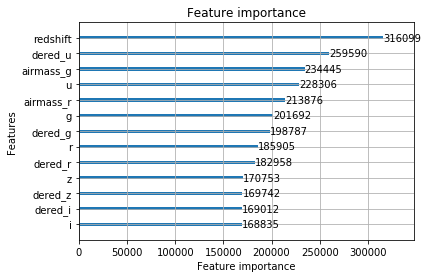

In [203]:
plot_importance(LGBM_model1)

In [204]:
#  Test set에 적용
result1 = LGBM_model1.predict(Test_Data)
Submission_set['class'] = result1
Submission_set.to_csv("submission4.csv", encoding='utf-8')

==============================================================================================

# 파라미터 튜닝

In [13]:
for i in range(1, 30):
    print(i, "번째 학습")
    model = xgb.XGBClassifier(max_depth = i, learning_rate = 0.1)
    model.fit(X_Train, y_train)
    
    # 예측 평가
    y_pred = model.predict(X_Test)
    
    # evaluate predictions
    MSE = mean_squared_error(y_test, y_pred)
    print('MSE : %.2f'%MSE)
    # confusion matrix
    CM = confusion_matrix(y_pred, y_test)
    print(CM)
    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: {}%".format(accuracy * 100.0))

1 번째 학습
MSE : 0.13
[[11986    15    20]
 [   19   420    83]
 [   35  3853 15569]]
Accuracy: 87.421875%
2 번째 학습
MSE : 0.10
[[11991     7     8]
 [   22  1729   487]
 [   27  2552 15177]]
Accuracy: 90.303125%
3 번째 학습
MSE : 0.09
[[12000     6     5]
 [   19  2025   546]
 [   21  2257 15121]]
Accuracy: 91.08125%
4 번째 학습
MSE : 0.09
[[12001     6     4]
 [   17  2222   626]
 [   22  2060 15042]]
Accuracy: 91.453125%
5 번째 학습
MSE : 0.08
[[12005     6     2]
 [   16  2295   613]
 [   19  1987 15057]]
Accuracy: 91.740625%
6 번째 학습
MSE : 0.08
[[12006     7     1]
 [   15  2434   648]
 [   19  1847 15023]]
Accuracy: 92.071875%
7 번째 학습
MSE : 0.08
[[12010     6     3]
 [   14  2489   663]
 [   16  1793 15006]]
Accuracy: 92.203125%
8 번째 학습
MSE : 0.08
[[12005     6     4]
 [   18  2564   686]
 [   17  1718 14982]]
Accuracy: 92.346875%
9 번째 학습
MSE : 0.08
[[12008     6     3]
 [   15  2616   691]
 [   17  1666 14978]]
Accuracy: 92.50625%
10 번째 학습
MSE : 0.07
[[12004     6     2]
 [   17  2665   664]
 [  

In [19]:
for i in range(100, 2000, 50):
    print(i, "번째 학습")
    model = xgb.XGBClassifier(max_depth = 14, n_estimators= i, learning_rate = 0.01)
    model.fit(X_Train, y_train)
    
    # 예측 평가
    y_pred = model.predict(X_Test)
    
    # evaluate predictions
    MSE = mean_squared_error(y_test, y_pred)
    print('MSE : %.2f'%MSE)
    # confusion matrix
    CM = confusion_matrix(y_pred, y_test)
    print(CM)
    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: {}%".format(accuracy * 100.0))

100 번째 학습
MSE : 0.08
[[12006     5     7]
 [   16  2672   714]
 [   18  1611 14951]]
Accuracy: 92.590625%
150 번째 학습
MSE : 0.08
[[12007     5     8]
 [   16  2692   707]
 [   17  1591 14957]]
Accuracy: 92.675%
200 번째 학습
MSE : 0.07
[[12008     5     7]
 [   16  2720   703]
 [   16  1563 14962]]
Accuracy: 92.78125%
250 번째 학습
MSE : 0.07
[[12009     5     5]
 [   16  2730   713]
 [   15  1553 14954]]
Accuracy: 92.790625%
300 번째 학습
MSE : 0.07
[[12008     5     5]
 [   17  2751   715]
 [   15  1532 14952]]
Accuracy: 92.846875%
350 번째 학습
MSE : 0.07
[[12008     5     4]
 [   17  2771   708]
 [   15  1512 14960]]
Accuracy: 92.934375%
400 번째 학습
MSE : 0.07
[[12008     5     4]
 [   16  2772   711]
 [   16  1511 14957]]
Accuracy: 92.928125%
450 번째 학습
MSE : 0.07
[[12010     5     3]
 [   15  2785   716]
 [   15  1498 14953]]
Accuracy: 92.9625%
500 번째 학습
MSE : 0.07
[[12009     5     3]
 [   15  2790   714]
 [   16  1493 14955]]
Accuracy: 92.98125%
550 번째 학습
MSE : 0.07
[[12009     6     3]
 [   15  27

KeyboardInterrupt: 

# 아웃라이어 제거한 모델 학습

In [88]:
# 모델 평가를 위한 훈련데이터 Split
seed = 0
size = 0.1 # Testing size
X1 = Train_copy1.drop(['class'], axis = 1)
Y1 = Train_copy1['class']
X_Train1, X_Test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size = size, random_state = seed)  

print(X_Train1.shape)

model1 = xgb.XGBClassifier(max_depth = 27, n_estimators= 1050, learning_rate = 0.01)
model1.fit(X_Train1, y_train1)
    
    # 예측 평가
y_pred1 = model1.predict(X_Test1)
    
    # evaluate predictions
MSE = mean_squared_error(y_test1, y_pred1)
print('MSE : %.2f'%MSE)
    # confusion matrix
CM = confusion_matrix(y_pred1, y_test1)
print(CM)
    # accuracy
accuracy = accuracy_score(y_test1, y_pred1)
print("Accuracy: {}%".format(accuracy * 100.0))

result1 = model1.predict(Test_set)
Submission_set['class'] = result1
Submission_set.to_csv("submission1.csv", encoding='utf-8')

(286633, 18)
MSE : 0.07
[[12057    10     6]
 [   16  2757   715]
 [   10  1395 14883]]
Accuracy: 93.24311595340514%


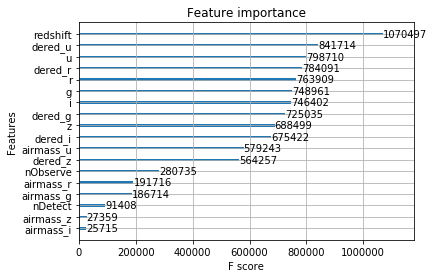

In [89]:
# plot importance(model)
plot_importance(model1)

In [90]:
# 모델 평가를 위한 훈련데이터 Split

model3 = xgb.XGBClassifier(max_depth = 27, n_estimators= 1050, learning_rate = 0.01)
model3.fit(X1, Y1)
    
result3 = model3.predict(Test_set)
Submission_set['class'] = result3
Submission_set.to_csv("submission3.csv", encoding='utf-8')

# whole Data

In [39]:
model2 = xgb.XGBClassifier(max_depth = 27, learning_rate = 0.01, n_estimators = 1050)
model2.fit(X, Y)

result2 = model2.predict(Test_set)
Submission_set['class'] = result2
Submission_set.to_csv("submission1.csv", encoding='utf-8')

NameError: name 'result1' is not defined

In [708]:
a = pd.DataFrame(columns = ['asdf'])
a

,asdf


In [709]:
a =  pd.read_csv('./data/train.csv', header = 0, index_col =0)
a

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.263956,20.336773,19.009500,17.672439,16.939607,-0.000081,23.12426,20.25779,18.95512,17.63211,16.90894,18,18,1.189764,1.190681,1.188979,1.189355,1.190206,0
1,15.052147,14.061969,13.452418,13.268450,13.168941,0.004506,14.96642,14.00452,13.41139,13.23625,13.13468,1,1,1.253254,1.257836,1.248762,1.250997,1.255533,1
2,16.786385,15.825426,15.536318,15.393535,15.350032,0.000472,16.60765,15.68659,15.44004,15.32173,15.29608,2,2,1.022499,1.024105,1.020983,1.021730,1.023291,0
3,25.660638,21.188727,20.221158,19.894949,19.634649,0.000006,25.35365,20.99465,20.08727,19.79465,19.55518,4,3,1.205399,1.206058,1.204874,1.205120,1.205712,0
4,24.453429,20.699170,19.042368,18.324152,17.982649,-0.000033,23.77140,20.43384,18.86299,18.19028,17.87592,13,12,1.193946,1.194285,1.193738,1.193826,1.194099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,18.365648,17.240883,16.773898,16.484970,16.340403,0.051988,18.13280,17.04065,16.63744,16.38606,16.28741,2,2,1.093010,1.088828,1.097310,1.095145,1.090905,2
319996,18.685639,17.665802,17.190434,16.816858,16.636688,0.087261,18.52074,17.51310,17.08711,16.74363,16.60173,2,2,1.051689,1.050838,1.052640,1.052152,1.051252,1
319997,21.188972,18.423357,17.295610,16.901072,16.684127,-0.000010,20.98896,18.30760,17.21518,16.84030,16.63555,31,30,1.193259,1.194140,1.192509,1.192868,1.193683,0


In [710]:
a.to_csv('dku.csv', encoding = 'utf-8')